In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
os.chdir("Data Prepared for Modelling/Smote Data")

In [4]:
import pandas as pd
df = pd.read_csv("df_train_imputed_median_smote.csv")
df_test = pd.read_csv('df_test_imputed_median_smote.csv')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

In [7]:
X = df.drop(['Top-up Month'],axis=1)
y = df['Top-up Month']

In [22]:
df['Top-up Month'].head()

0    0
1    6
2    1
3    0
4    5
Name: Top-up Month, dtype: int64

In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Random Forest

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, rf_model.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, rf_model.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_model.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )
    
fpr, tpr, thresholds = roc_curve(y_test,rf_model.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,rf_model)

MemoryError: Unable to allocate 4.56 MiB for an array with shape (597391,) and data type float64

In [23]:
import pickle
pickle.dump(rf_model, open("model_rf_loan_default_featengg_smote_data.pkl", 'wb'))

### With scaled data

RF train roc-auc: 1.0
RF test roc-auc: 0.8740194729204345
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11187
           1       1.00      1.00      1.00     11341

    accuracy                           1.00     22528
   macro avg       1.00      1.00      1.00     22528
weighted avg       1.00      1.00      1.00     22528

              precision    recall  f1-score   support

           0       0.71      0.91      0.80      2893
           1       0.87      0.60      0.71      2739

    accuracy                           0.76      5632
   macro avg       0.79      0.76      0.76      5632
weighted avg       0.79      0.76      0.76      5632



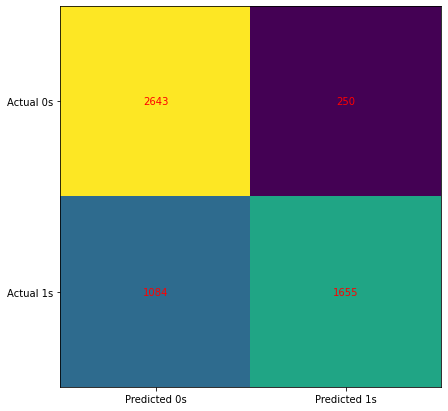

AUC: 0.8740194729204345


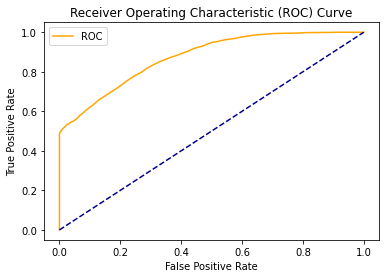

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

# Feature Scaling #no need feature scaling for DT as they ar not based on euclidean dist and also will be easy to interpret
from sklearn.preprocessing import StandardScaler #but to visalize with high reolution(0.01),feature scaling helps to execute lot faster
sc = StandardScaler()                       #so we are keeping the feature scaling, but we can also remove feature scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, rf_model.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, rf_model.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_model.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )
    
fpr, tpr, thresholds = roc_curve(y_test,rf_model.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,rf_model)

In [25]:
import pickle
pickle.dump(rf_model, open("model_rf_loan_default_featengg_scaled_smote_data.pkl", 'wb'))

### Decision Tree

Decision Tree train roc-auc: 1.0
RF test roc-auc: 0.7322494263261133
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11187
           1       1.00      1.00      1.00     11341

    accuracy                           1.00     22528
   macro avg       1.00      1.00      1.00     22528
weighted avg       1.00      1.00      1.00     22528

              precision    recall  f1-score   support

           0       0.73      0.76      0.74      2893
           1       0.73      0.71      0.72      2739

    accuracy                           0.73      5632
   macro avg       0.73      0.73      0.73      5632
weighted avg       0.73      0.73      0.73      5632



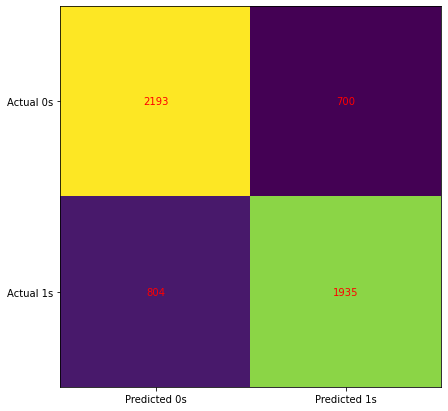

AUC: 0.7322494263261133


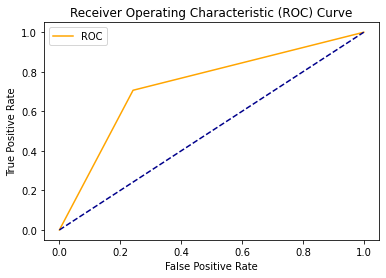

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

# Feature Scaling #no need feature scaling for DT as they ar not based on euclidean dist and also will be easy to interpret
from sklearn.preprocessing import StandardScaler #but to visalize with high reolution(0.01),feature scaling helps to execute lot faster
sc = StandardScaler()                       #so we are keeping the feature scaling, but we can also remove feature scaling
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Fitting Decision Tree to the Training set
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = dt_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

dt_classifier.fit(X_train, y_train)
ytrain_pred = dt_classifier.predict_proba(X_train)
print('Decision Tree train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = dt_classifier.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, dt_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, dt_classifier.predict(X_test)))

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test,dt_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,dt_classifier)

In [27]:
import pickle
pickle.dump(dt_classifier, open("model_dt_loan_default_featengg_smote_data.pkl", 'wb'))

### For scaled Data

Decision Tree train roc-auc: 1.0
RF test roc-auc: 0.7320765953548034
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11187
           1       1.00      1.00      1.00     11341

    accuracy                           1.00     22528
   macro avg       1.00      1.00      1.00     22528
weighted avg       1.00      1.00      1.00     22528

              precision    recall  f1-score   support

           0       0.73      0.76      0.74      2893
           1       0.73      0.71      0.72      2739

    accuracy                           0.73      5632
   macro avg       0.73      0.73      0.73      5632
weighted avg       0.73      0.73      0.73      5632



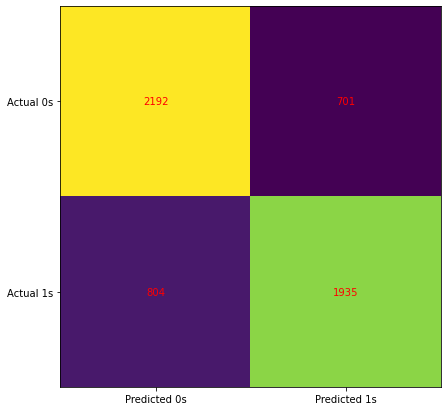

AUC: 0.7320765953548034


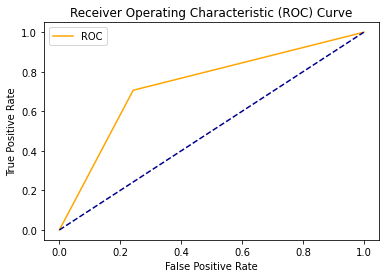

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)


# Feature Scaling #no need feature scaling for DT as they ar not based on euclidean dist and also will be easy to interpret
from sklearn.preprocessing import StandardScaler #but to visalize with high reolution(0.01),feature scaling helps to execute lot faster
sc = StandardScaler()                       #so we are keeping the feature scaling, but we can also remove feature scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Decision Tree to the Training set
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = dt_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

dt_classifier.fit(X_train, y_train)
ytrain_pred = dt_classifier.predict_proba(X_train)
print('Decision Tree train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = dt_classifier.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, dt_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, dt_classifier.predict(X_test)))

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()



fpr, tpr, thresholds = roc_curve(y_test,dt_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,dt_classifier)

### SVC

SVC train roc-auc: 0.6522754506918785
SVC test roc-auc: 0.6480055911671069
              precision    recall  f1-score   support

           0       0.53      0.88      0.66     11187
           1       0.67      0.24      0.36     11341

    accuracy                           0.56     22528
   macro avg       0.60      0.56      0.51     22528
weighted avg       0.60      0.56      0.51     22528

              precision    recall  f1-score   support

           0       0.55      0.90      0.69      2893
           1       0.69      0.23      0.35      2739

    accuracy                           0.58      5632
   macro avg       0.62      0.57      0.52      5632
weighted avg       0.62      0.58      0.52      5632



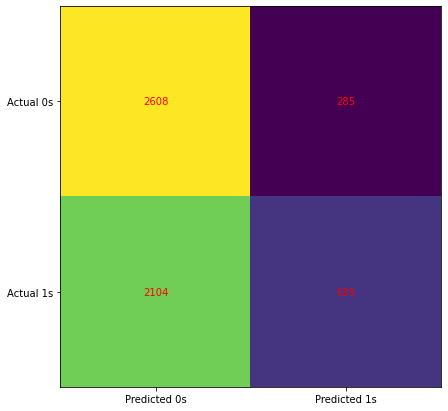

AUC: 0.6480055911671069


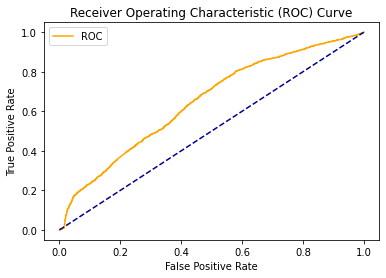

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Fitting Kernel SVM classifier to the Training set
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0, probability=True) #rbf is gaussian kernel
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
svc_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svc_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#svc_classifier.fit(X_train, y_train)
ytrain_pred = svc_classifier.predict_proba(X_train)
print('SVC train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = svc_classifier.predict_proba(X_test)
print('SVC test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, svc_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, svc_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test,svc_classifier.predict_proba(X_test)[:,1] )
auc = metrics.roc_auc_score(y_test, svc_classifier.predict_proba(X_test)[:,1])
plot_roc_curve(fpr,tpr,svc_classifier)

In [31]:
import pickle
pickle.dump(svc_classifier, open("model_dt_loan_default_featengg_smote_data.pkl", 'wb'))

## with scaled data

SVC train roc-auc: 0.8677452171057096
SVC test roc-auc: 0.8008246416202471
              precision    recall  f1-score   support

           0       0.69      0.94      0.80     11187
           1       0.91      0.59      0.71     11341

    accuracy                           0.76     22528
   macro avg       0.80      0.76      0.75     22528
weighted avg       0.80      0.76      0.75     22528

              precision    recall  f1-score   support

           0       0.68      0.91      0.78      2893
           1       0.86      0.54      0.67      2739

    accuracy                           0.73      5632
   macro avg       0.77      0.73      0.72      5632
weighted avg       0.76      0.73      0.72      5632



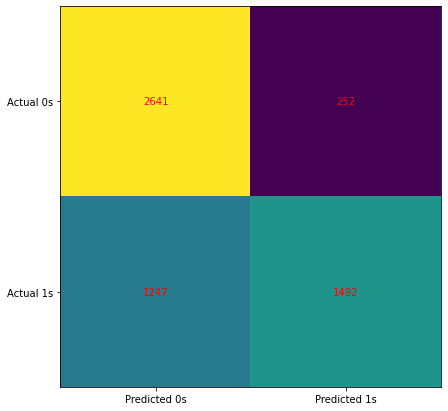

AUC: 0.8008246416202471


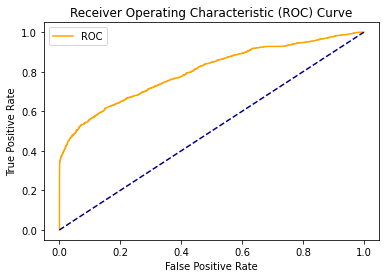

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Kernel SVM classifier to the Training set
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0, probability=True) #rbf is gaussian kernel
svc_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svc_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#svc_classifier.fit(X_train, y_train)
ytrain_pred = svc_classifier.predict_proba(X_train)
print('SVC train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = svc_classifier.predict_proba(X_test)
print('SVC test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, svc_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, svc_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test,svc_classifier.predict_proba(X_test)[:,1] )
auc = metrics.roc_auc_score(y_test, svc_classifier.predict_proba(X_test)[:,1])
plot_roc_curve(fpr,tpr,svc_classifier)

## Logistic Regression

### Without scaling

Logistic train roc-auc: 0.5737644688120407
Logistic test roc-auc: 0.5681278992095712
              precision    recall  f1-score   support

           0       0.59      0.48      0.53     11187
           1       0.57      0.67      0.61     11341

    accuracy                           0.57     22528
   macro avg       0.58      0.57      0.57     22528
weighted avg       0.58      0.57      0.57     22528

              precision    recall  f1-score   support

           0       0.60      0.48      0.54      2893
           1       0.55      0.66      0.60      2739

    accuracy                           0.57      5632
   macro avg       0.58      0.57      0.57      5632
weighted avg       0.58      0.57      0.57      5632



D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


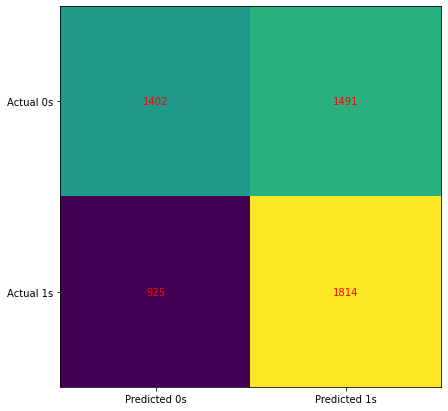

AUC: 0.5681278992095712


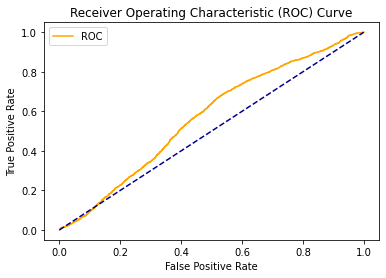

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
X_train_scaled = X_train
X_test_scaled = X_test
log_classifier.fit(X_train_scaled, y_train)
ytrain_pred = log_classifier.predict_proba(X_train_scaled)

# Predicting the Test set results
y_pred = log_classifier.predict(X_test_scaled)

print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test_scaled)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, log_classifier.predict(X_train)))

# Train Prediction classification report
print(classification_report(y_test, log_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,log_classifier.predict_proba(X_test_scaled)[:,1] )
plot_roc_curve(fpr,tpr,log_classifier)

### With scaled data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)
from sklearn.preprocessing import StandardScaler #but to visalize with high reolution(0.01),feature scaling helps to execute lot faster
sc = StandardScaler()   
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
log_classifier.fit(X_train_scaled, y_train)
ytrain_pred = log_classifier.predict_proba(X_train_scaled)

# Predicting the Test set results
y_pred = log_classifier.predict(X_test_scaled)

#print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test_scaled)
#print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, log_classifier.predict(X_train)))

# Train Prediction classification report
print(classification_report(y_test, log_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

#fpr, tpr, thresholds = roc_curve(y_test,log_classifier.predict_proba(X_test_scaled)[:,1] )


D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.27      0.61      0.37     85311
           1       0.13      0.62      0.22     85402
           2       0.00      0.00      0.00     85175
           3       0.00      0.00      0.00     85180
           4       0.00      0.00      0.00     85301
           5       1.00      0.00      0.00     85361
           6       0.78      0.00      0.00     85661

    accuracy                           0.17    597391
   macro avg       0.31      0.17      0.08    597391
weighted avg       0.31      0.17      0.08    597391



D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.27      0.60      0.37     21366
           1       0.13      0.62      0.22     21275
           2       0.00      0.00      0.00     21502
           3       0.00      0.00      0.00     21497
           4       0.00      0.00      0.00     21376
           5       0.00      0.00      0.00     21316
           6       0.75      0.00      0.00     21016

    accuracy                           0.17    149348
   macro avg       0.16      0.17      0.08    149348
weighted avg       0.16      0.17      0.08    149348

[[19526   491    34    14     3     0  1298]
 [ 1562 17052  2187   337     2     0   135]
 [   72  2140 15764  3000   202     0   324]
 [   67   130  2419 15479  2831    61   510]
 [   80    46    91  1529 17038  2190   402]
 [  174    19    10    19   691 19888   515]
 [  881   446    50    29     5     1 19604]]


In [35]:
import pickle
pickle.dump(log_classifier, open("model_logreg_loan_default_featengg_CorrRemoved_scaled_data.pkl", 'wb'))

In [21]:
y.head()

0    0
1    6
2    1
3    0
4    5
Name: Top-up Month, dtype: int64

In [23]:
dictionary = {6 :'No Top-up Service', 0:'> 48 Months',5 :'36-48 Months', 3:'24-30 Months',
              4 :'30-36 Months', 2 :'18-24 Months', 1:'12-18 Months'}
df_submission = pd.read_csv('submission 1.csv')
pred = log_classifier.predict(df_test)

df_submission = pd.concat((df_submission['ID'],pd.DataFrame(pred)), axis=1)
df_submission = df_submission.rename(columns={0: 'Top-up Month'})
df_submission['Top-up Month'] = df_submission['Top-up Month'].map(dictionary)
df_submission.to_csv('submission_logreg2.csv', index =False)
df_submission.head()

,ID,Top-up Month
0,4,> 48 Months
1,5,> 48 Months
2,6,> 48 Months
3,25,12-18 Months
4,119,12-18 Months


In [29]:
dictionary = {6 :'No Top-up Service', 0:'> 48 Months',5 :'36-48 Months', 3:'24-30 Months',
              4 :'30-36 Months', 2 :'18-24 Months', 1:'12-18 Months'}
df_submission = pd.read_csv('submission 1.csv')
pred = log_classifier.predict(sc.transform(df_test))

df_submission = pd.concat((df_submission['ID'],pd.DataFrame(pred)), axis=1)
df_submission = df_submission.rename(columns={0: 'Top-up Month'})
df_submission['Top-up Month'] = df_submission['Top-up Month'].map(dictionary)
df_submission.to_csv('submission_logreg3.csv', index =False)
df_submission['Top-up Month'].value_counts()

No Top-up Service    14591
> 48 Months            104
12-18 Months            42
24-30 Months             7
18-24 Months             1
Name: Top-up Month, dtype: int64

### Including Iteration

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression(solver='lbfgs',max_iter=10000)
sc = StandardScaler()   
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
log_classifier.fit(X_train_scaled, y_train)
ytrain_pred = log_classifier.predict_proba(X_train_scaled)

# Predicting the Test set results
y_pred = log_classifier.predict(X_test_scaled)

print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test_scaled)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, log_classifier.predict(X_train)))

# Train Prediction classification report
print(classification_report(y_test, log_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


MemoryError: Unable to allocate 506. MiB for an array with shape (597391, 111) and data type float64

In [38]:
pickle.dump(log_classifier, open("model_logreg_hyp_tuned_loan_default_featengg_scaled_data.pkl", 'wb'))

## Adaboost Classifier

Adaboost train roc-auc: 0.8059287256557245
Adaboost test roc-auc: 0.8053803372999271
              precision    recall  f1-score   support

           0       0.69      0.85      0.76     11187
           1       0.80      0.62      0.70     11341

    accuracy                           0.73     22528
   macro avg       0.75      0.73      0.73     22528
weighted avg       0.75      0.73      0.73     22528

              precision    recall  f1-score   support

           0       0.70      0.84      0.77      2893
           1       0.79      0.62      0.70      2739

    accuracy                           0.74      5632
   macro avg       0.75      0.73      0.73      5632
weighted avg       0.75      0.74      0.73      5632



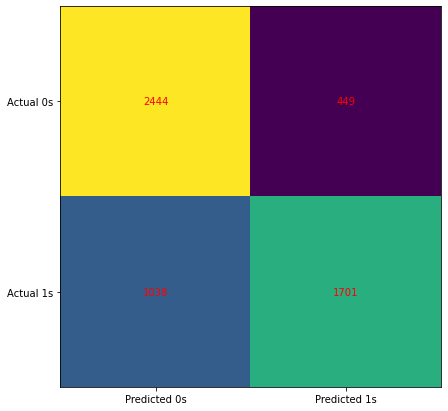

AUC: 0.8053803372999271


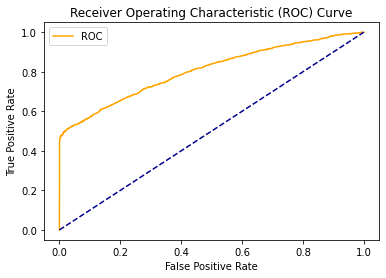

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, ada_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, ada_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ada_classifier.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,ada_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,ada_classifier)


In [40]:
pickle.dump(ada_classifier, open("model_adaboost_loan_default_featengg_smote_data.pkl", 'wb'))

## With scaled data

Adaboost train roc-auc: 0.8059287256557245
Adaboost test roc-auc: 0.8053803372999271
              precision    recall  f1-score   support

           0       0.69      0.85      0.76     11187
           1       0.80      0.62      0.70     11341

    accuracy                           0.73     22528
   macro avg       0.75      0.73      0.73     22528
weighted avg       0.75      0.73      0.73     22528

              precision    recall  f1-score   support

           0       0.70      0.84      0.77      2893
           1       0.79      0.62      0.70      2739

    accuracy                           0.74      5632
   macro avg       0.75      0.73      0.73      5632
weighted avg       0.75      0.74      0.73      5632



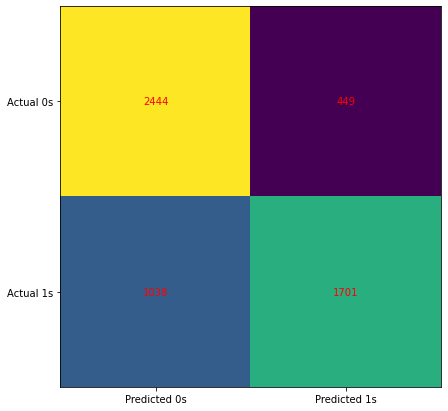

AUC: 0.8053803372999271


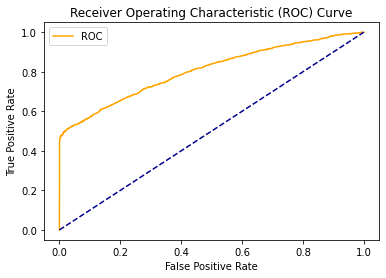

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, ada_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, ada_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ada_classifier.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,ada_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,ada_classifier)


In [42]:
pickle.dump(ada_classifier, open("model_adaboost_loan_default_featengg_smote_scaled_data.pkl", 'wb'))

## KNN Classsifier

KNN train roc-auc: 0.8562016599012134
KNN test roc-auc: 0.7067284314961508
              precision    recall  f1-score   support

           0       0.75      0.80      0.77     11187
           1       0.79      0.74      0.76     11341

    accuracy                           0.77     22528
   macro avg       0.77      0.77      0.77     22528
weighted avg       0.77      0.77      0.77     22528

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      2893
           1       0.65      0.62      0.64      2739

    accuracy                           0.65      5632
   macro avg       0.65      0.65      0.65      5632
weighted avg       0.65      0.65      0.65      5632



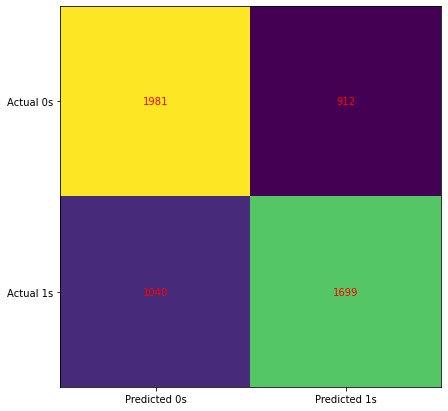

AUC: 0.7067284314961508


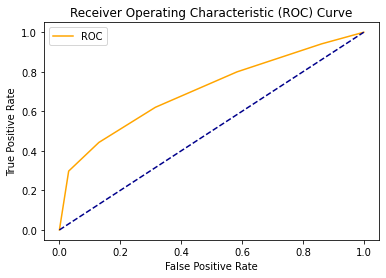

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, knn_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, knn_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_classifier.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,knn_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,knn_classifier)

In [44]:
pickle.dump(knn_classifier, open("model_KNN_loan_default_featengg_smote_data.pkl", 'wb'))

## With scaled data

KNN train roc-auc: 0.888185757671366
KNN test roc-auc: 0.7640421220437796
              precision    recall  f1-score   support

           0       0.79      0.82      0.80     11187
           1       0.81      0.78      0.80     11341

    accuracy                           0.80     22528
   macro avg       0.80      0.80      0.80     22528
weighted avg       0.80      0.80      0.80     22528

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      2893
           1       0.69      0.67      0.68      2739

    accuracy                           0.69      5632
   macro avg       0.69      0.69      0.69      5632
weighted avg       0.69      0.69      0.69      5632



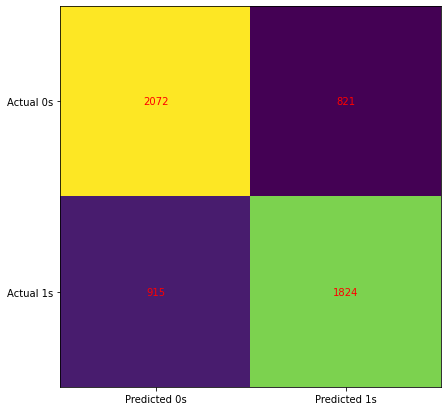

AUC: 0.7640421220437796


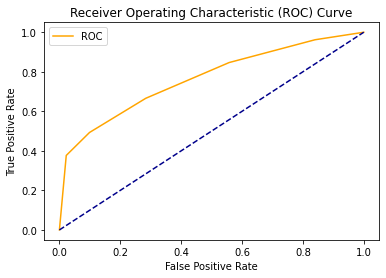

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, knn_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, knn_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_classifier.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,knn_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,knn_classifier)

In [46]:
pickle.dump(knn_classifier, open("model_KNN_loan_default_featengg_scaled_data.pkl", 'wb'))

### Hyperparameter for finding optimal k

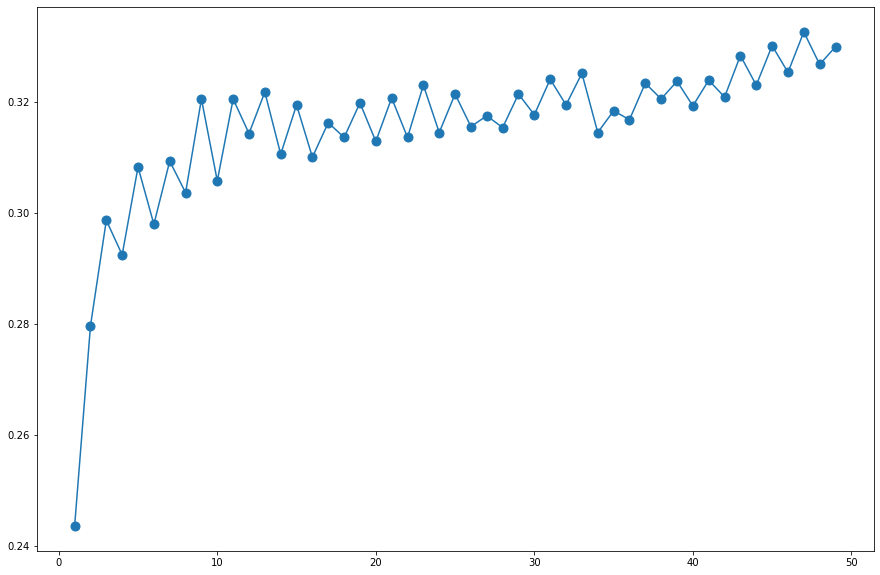

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,50):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train, y_train)
    pred = knn_classifier.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

KNN train roc-auc: 0.7813076056550863
KNN test roc-auc: 0.7509154236277038
              precision    recall  f1-score   support

           0       0.69      0.73      0.71     11187
           1       0.72      0.67      0.69     11341

    accuracy                           0.70     22528
   macro avg       0.70      0.70      0.70     22528
weighted avg       0.70      0.70      0.70     22528

              precision    recall  f1-score   support

           0       0.68      0.69      0.68      2893
           1       0.66      0.65      0.66      2739

    accuracy                           0.67      5632
   macro avg       0.67      0.67      0.67      5632
weighted avg       0.67      0.67      0.67      5632



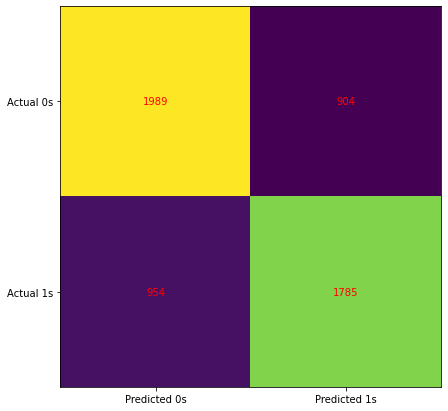

AUC: 0.7509154236277038


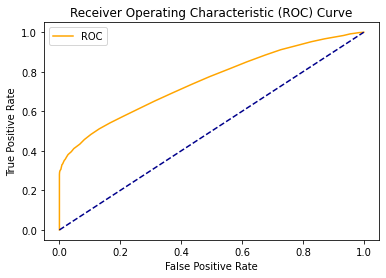

In [75]:
#knn_classifier=KNeighborsClassifier()
#knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, knn_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, knn_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_classifier.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,knn_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,knn_classifier)

## Naive bayes

Naive Bayes train roc-auc: 0.6747124519831114
Naive Bayes test roc-auc: 0.6640432830842586
              precision    recall  f1-score   support

           0       0.50      1.00      0.66     11187
           1       0.00      0.00      0.00     11341

    accuracy                           0.50     22528
   macro avg       0.25      0.50      0.33     22528
weighted avg       0.25      0.50      0.33     22528

              precision    recall  f1-score   support

           0       0.51      1.00      0.68      2893
           1       0.00      0.00      0.00      2739

    accuracy                           0.51      5632
   macro avg       0.26      0.50      0.34      5632
weighted avg       0.26      0.51      0.35      5632



D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


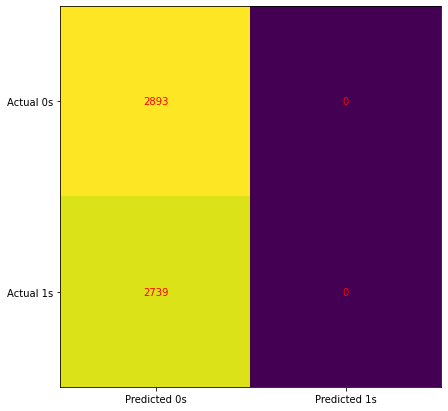

AUC: 0.5


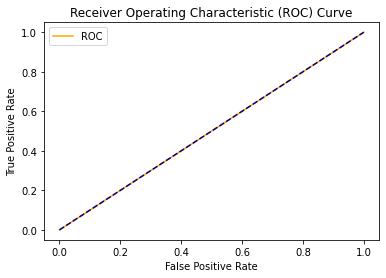

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
ytrain_pred = gnb.predict_proba(X_train_scaled)
print('Naive Bayes train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = gnb.predict_proba(X_test_scaled)
print('Naive Bayes test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, gnb.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, gnb.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, gnb.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,gnb.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,gnb)

In [68]:
pickle.dump(gnb, open("model_GaussianNaiveBayes_loan_default_featengg_smote_data.pkl", 'wb'))

## With scaled data

Naive Bayes train roc-auc: 0.6747124519831114
Naive Bayes test roc-auc: 0.6640432830842586
              precision    recall  f1-score   support

           0       0.68      0.25      0.37     11187
           1       0.55      0.88      0.67     11341

    accuracy                           0.57     22528
   macro avg       0.61      0.57      0.52     22528
weighted avg       0.61      0.57      0.52     22528

              precision    recall  f1-score   support

           0       0.70      0.26      0.38      2893
           1       0.53      0.88      0.66      2739

    accuracy                           0.56      5632
   macro avg       0.61      0.57      0.52      5632
weighted avg       0.62      0.56      0.52      5632



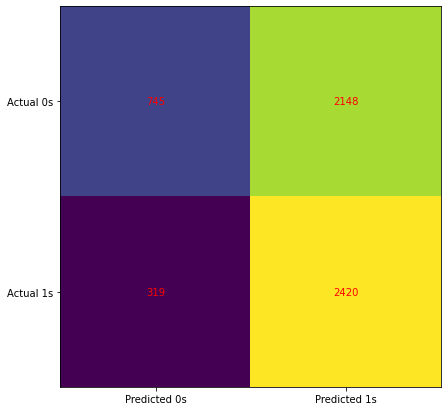

AUC: 0.6640432830842586


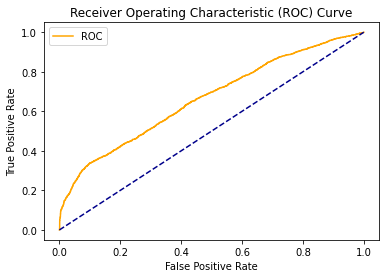

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
ytrain_pred = gnb.predict_proba(X_train_scaled)
print('Naive Bayes train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = gnb.predict_proba(X_test_scaled)
print('Naive Bayes test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, gnb.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, gnb.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, gnb.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,gnb.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,gnb)

In [ ]:
pickle.dump(gnb, open("model_GaussianNaiveBayes_loan_default_featengg_smote_scaled_data.pkl", 'wb'))

## CatBoost Classifier

Learning rate set to 0.040452
0:	learn: 0.6700908	total: 194ms	remaining: 3m 13s
1:	learn: 0.6547903	total: 208ms	remaining: 1m 43s
2:	learn: 0.6336837	total: 224ms	remaining: 1m 14s
3:	learn: 0.6233164	total: 239ms	remaining: 59.5s
4:	learn: 0.6132027	total: 253ms	remaining: 50.4s
5:	learn: 0.6034566	total: 267ms	remaining: 44.2s
6:	learn: 0.5914074	total: 280ms	remaining: 39.8s
7:	learn: 0.5827501	total: 293ms	remaining: 36.4s
8:	learn: 0.5781411	total: 306ms	remaining: 33.7s
9:	learn: 0.5727526	total: 319ms	remaining: 31.6s
10:	learn: 0.5646436	total: 332ms	remaining: 29.9s
11:	learn: 0.5591649	total: 345ms	remaining: 28.4s
12:	learn: 0.5523844	total: 359ms	remaining: 27.2s
13:	learn: 0.5502248	total: 372ms	remaining: 26.2s
14:	learn: 0.5458614	total: 385ms	remaining: 25.3s
15:	learn: 0.5424741	total: 400ms	remaining: 24.6s
16:	learn: 0.5368930	total: 417ms	remaining: 24.1s
17:	learn: 0.5342518	total: 431ms	remaining: 23.5s
18:	learn: 0.5325240	total: 445ms	remaining: 23s
19:	learn:

167:	learn: 0.4531158	total: 2.58s	remaining: 12.8s
168:	learn: 0.4529603	total: 2.6s	remaining: 12.8s
169:	learn: 0.4528321	total: 2.61s	remaining: 12.7s
170:	learn: 0.4527404	total: 2.62s	remaining: 12.7s
171:	learn: 0.4521163	total: 2.64s	remaining: 12.7s
172:	learn: 0.4519902	total: 2.65s	remaining: 12.7s
173:	learn: 0.4518559	total: 2.66s	remaining: 12.6s
174:	learn: 0.4517223	total: 2.68s	remaining: 12.6s
175:	learn: 0.4515186	total: 2.69s	remaining: 12.6s
176:	learn: 0.4513318	total: 2.7s	remaining: 12.6s
177:	learn: 0.4511698	total: 2.72s	remaining: 12.5s
178:	learn: 0.4509380	total: 2.73s	remaining: 12.5s
179:	learn: 0.4507262	total: 2.74s	remaining: 12.5s
180:	learn: 0.4505572	total: 2.76s	remaining: 12.5s
181:	learn: 0.4504230	total: 2.77s	remaining: 12.5s
182:	learn: 0.4500459	total: 2.78s	remaining: 12.4s
183:	learn: 0.4499026	total: 2.8s	remaining: 12.4s
184:	learn: 0.4497533	total: 2.81s	remaining: 12.4s
185:	learn: 0.4496451	total: 2.82s	remaining: 12.4s
186:	learn: 0.4

334:	learn: 0.4262788	total: 5.15s	remaining: 10.2s
335:	learn: 0.4260980	total: 5.16s	remaining: 10.2s
336:	learn: 0.4259504	total: 5.18s	remaining: 10.2s
337:	learn: 0.4258194	total: 5.19s	remaining: 10.2s
338:	learn: 0.4257202	total: 5.2s	remaining: 10.1s
339:	learn: 0.4255786	total: 5.21s	remaining: 10.1s
340:	learn: 0.4254366	total: 5.23s	remaining: 10.1s
341:	learn: 0.4253291	total: 5.24s	remaining: 10.1s
342:	learn: 0.4248722	total: 5.25s	remaining: 10.1s
343:	learn: 0.4247506	total: 5.27s	remaining: 10s
344:	learn: 0.4246154	total: 5.28s	remaining: 10s
345:	learn: 0.4245353	total: 5.29s	remaining: 10s
346:	learn: 0.4243934	total: 5.3s	remaining: 9.98s
347:	learn: 0.4241832	total: 5.32s	remaining: 9.96s
348:	learn: 0.4240776	total: 5.33s	remaining: 9.95s
349:	learn: 0.4239179	total: 5.34s	remaining: 9.93s
350:	learn: 0.4237408	total: 5.36s	remaining: 9.91s
351:	learn: 0.4235640	total: 5.37s	remaining: 9.89s
352:	learn: 0.4234466	total: 5.39s	remaining: 9.87s
353:	learn: 0.423311

503:	learn: 0.4018840	total: 7.5s	remaining: 7.38s
504:	learn: 0.4017236	total: 7.52s	remaining: 7.37s
505:	learn: 0.4015516	total: 7.53s	remaining: 7.35s
506:	learn: 0.4014179	total: 7.54s	remaining: 7.33s
507:	learn: 0.4013114	total: 7.56s	remaining: 7.32s
508:	learn: 0.4011410	total: 7.57s	remaining: 7.31s
509:	learn: 0.4010013	total: 7.59s	remaining: 7.29s
510:	learn: 0.4009196	total: 7.6s	remaining: 7.27s
511:	learn: 0.4008043	total: 7.61s	remaining: 7.25s
512:	learn: 0.4006477	total: 7.63s	remaining: 7.24s
513:	learn: 0.4005494	total: 7.64s	remaining: 7.22s
514:	learn: 0.4004180	total: 7.65s	remaining: 7.21s
515:	learn: 0.4002967	total: 7.66s	remaining: 7.19s
516:	learn: 0.4001733	total: 7.68s	remaining: 7.17s
517:	learn: 0.4001005	total: 7.69s	remaining: 7.16s
518:	learn: 0.3999862	total: 7.7s	remaining: 7.14s
519:	learn: 0.3998602	total: 7.71s	remaining: 7.12s
520:	learn: 0.3997779	total: 7.73s	remaining: 7.11s
521:	learn: 0.3996494	total: 7.74s	remaining: 7.09s
522:	learn: 0.3

662:	learn: 0.3827555	total: 9.89s	remaining: 5.03s
663:	learn: 0.3826570	total: 9.91s	remaining: 5.02s
664:	learn: 0.3825427	total: 9.93s	remaining: 5s
665:	learn: 0.3824018	total: 9.95s	remaining: 4.99s
666:	learn: 0.3823040	total: 9.96s	remaining: 4.97s
667:	learn: 0.3821835	total: 9.98s	remaining: 4.96s
668:	learn: 0.3820545	total: 9.99s	remaining: 4.95s
669:	learn: 0.3819470	total: 10s	remaining: 4.93s
670:	learn: 0.3818401	total: 10s	remaining: 4.92s
671:	learn: 0.3817353	total: 10s	remaining: 4.9s
672:	learn: 0.3816284	total: 10.1s	remaining: 4.89s
673:	learn: 0.3815704	total: 10.1s	remaining: 4.88s
674:	learn: 0.3814608	total: 10.1s	remaining: 4.86s
675:	learn: 0.3813555	total: 10.1s	remaining: 4.85s
676:	learn: 0.3812456	total: 10.1s	remaining: 4.83s
677:	learn: 0.3811601	total: 10.2s	remaining: 4.82s
678:	learn: 0.3810084	total: 10.2s	remaining: 4.81s
679:	learn: 0.3808608	total: 10.2s	remaining: 4.79s
680:	learn: 0.3808058	total: 10.2s	remaining: 4.78s
681:	learn: 0.3806372	

831:	learn: 0.3646907	total: 12.3s	remaining: 2.47s
832:	learn: 0.3644995	total: 12.3s	remaining: 2.46s
833:	learn: 0.3643863	total: 12.3s	remaining: 2.44s
834:	learn: 0.3642745	total: 12.3s	remaining: 2.43s
835:	learn: 0.3642170	total: 12.3s	remaining: 2.41s
836:	learn: 0.3640831	total: 12.3s	remaining: 2.4s
837:	learn: 0.3640029	total: 12.3s	remaining: 2.38s
838:	learn: 0.3638983	total: 12.3s	remaining: 2.37s
839:	learn: 0.3638220	total: 12.4s	remaining: 2.35s
840:	learn: 0.3637154	total: 12.4s	remaining: 2.34s
841:	learn: 0.3635900	total: 12.4s	remaining: 2.32s
842:	learn: 0.3634887	total: 12.4s	remaining: 2.31s
843:	learn: 0.3633612	total: 12.4s	remaining: 2.29s
844:	learn: 0.3632509	total: 12.4s	remaining: 2.28s
845:	learn: 0.3631043	total: 12.4s	remaining: 2.27s
846:	learn: 0.3630395	total: 12.5s	remaining: 2.25s
847:	learn: 0.3629741	total: 12.5s	remaining: 2.24s
848:	learn: 0.3628580	total: 12.5s	remaining: 2.22s
849:	learn: 0.3627538	total: 12.5s	remaining: 2.21s
850:	learn: 0

991:	learn: 0.3491987	total: 14.4s	remaining: 116ms
992:	learn: 0.3491142	total: 14.5s	remaining: 102ms
993:	learn: 0.3490006	total: 14.5s	remaining: 87.3ms
994:	learn: 0.3489298	total: 14.5s	remaining: 72.8ms
995:	learn: 0.3488761	total: 14.5s	remaining: 58.2ms
996:	learn: 0.3487630	total: 14.5s	remaining: 43.6ms
997:	learn: 0.3486798	total: 14.5s	remaining: 29.1ms
998:	learn: 0.3485838	total: 14.5s	remaining: 14.5ms
999:	learn: 0.3484631	total: 14.5s	remaining: 0us
Catboost train roc-auc: 0.9484221891541875
Catboost test roc-auc: 0.8371091757912459
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     11187
           1       0.97      0.75      0.84     11341

    accuracy                           0.86     22528
   macro avg       0.88      0.86      0.86     22528
weighted avg       0.88      0.86      0.86     22528

              precision    recall  f1-score   support

           0       0.71      0.90      0.80      2893
       

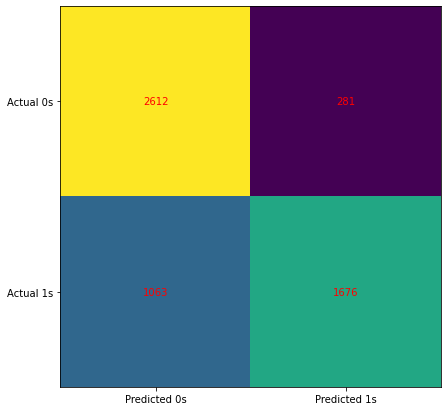

AUC: 0.8371091757912459


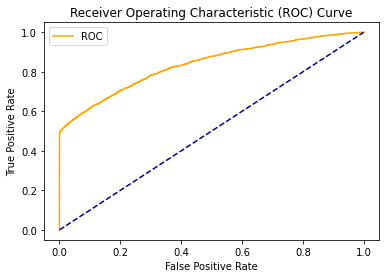

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

import catboost as cb
cb_classifier = cb.CatBoostClassifier()
cb_classifier.fit(X_train, y_train)
ytrain_pred = cb_classifier.predict_proba(X_train)
print('Catboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = cb_classifier.predict_proba(X_test)
print('Catboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, cb_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, cb_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, cb_classifier.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,cb_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,cb_classifier)

In [50]:
pickle.dump(cb_classifier, open("model_catboost_loan_default_featengg_smote_data.pkl", 'wb'))

## With scaled data

Learning rate set to 0.040452
0:	learn: 0.6700908	total: 14.4ms	remaining: 14.3s
1:	learn: 0.6547903	total: 27.8ms	remaining: 13.9s
2:	learn: 0.6336837	total: 40.8ms	remaining: 13.6s
3:	learn: 0.6233164	total: 54.5ms	remaining: 13.6s
4:	learn: 0.6132027	total: 67.8ms	remaining: 13.5s
5:	learn: 0.6034566	total: 81.4ms	remaining: 13.5s
6:	learn: 0.5914074	total: 94.9ms	remaining: 13.5s
7:	learn: 0.5827501	total: 108ms	remaining: 13.4s
8:	learn: 0.5781411	total: 121ms	remaining: 13.4s
9:	learn: 0.5727526	total: 134ms	remaining: 13.3s
10:	learn: 0.5646436	total: 148ms	remaining: 13.3s
11:	learn: 0.5591649	total: 161ms	remaining: 13.2s
12:	learn: 0.5523844	total: 174ms	remaining: 13.2s
13:	learn: 0.5502248	total: 188ms	remaining: 13.2s
14:	learn: 0.5458614	total: 202ms	remaining: 13.3s
15:	learn: 0.5424741	total: 216ms	remaining: 13.3s
16:	learn: 0.5368930	total: 231ms	remaining: 13.3s
17:	learn: 0.5342518	total: 246ms	remaining: 13.4s
18:	learn: 0.5325240	total: 261ms	remaining: 13.5s
19:	

170:	learn: 0.4517729	total: 2.4s	remaining: 11.6s
171:	learn: 0.4516397	total: 2.41s	remaining: 11.6s
172:	learn: 0.4515067	total: 2.43s	remaining: 11.6s
173:	learn: 0.4513666	total: 2.44s	remaining: 11.6s
174:	learn: 0.4511961	total: 2.46s	remaining: 11.6s
175:	learn: 0.4510693	total: 2.47s	remaining: 11.6s
176:	learn: 0.4509729	total: 2.48s	remaining: 11.5s
177:	learn: 0.4508039	total: 2.5s	remaining: 11.5s
178:	learn: 0.4506743	total: 2.52s	remaining: 11.5s
179:	learn: 0.4504746	total: 2.53s	remaining: 11.5s
180:	learn: 0.4503299	total: 2.55s	remaining: 11.5s
181:	learn: 0.4499132	total: 2.57s	remaining: 11.6s
182:	learn: 0.4497457	total: 2.59s	remaining: 11.6s
183:	learn: 0.4496547	total: 2.61s	remaining: 11.6s
184:	learn: 0.4495727	total: 2.63s	remaining: 11.6s
185:	learn: 0.4494127	total: 2.64s	remaining: 11.6s
186:	learn: 0.4492471	total: 2.66s	remaining: 11.6s
187:	learn: 0.4491251	total: 2.67s	remaining: 11.5s
188:	learn: 0.4489426	total: 2.69s	remaining: 11.5s
189:	learn: 0.

338:	learn: 0.4256187	total: 4.77s	remaining: 9.3s
339:	learn: 0.4254238	total: 4.78s	remaining: 9.29s
340:	learn: 0.4253010	total: 4.8s	remaining: 9.27s
341:	learn: 0.4251205	total: 4.81s	remaining: 9.26s
342:	learn: 0.4249117	total: 4.83s	remaining: 9.25s
343:	learn: 0.4247441	total: 4.84s	remaining: 9.24s
344:	learn: 0.4245347	total: 4.86s	remaining: 9.23s
345:	learn: 0.4244353	total: 4.88s	remaining: 9.22s
346:	learn: 0.4243130	total: 4.89s	remaining: 9.21s
347:	learn: 0.4241641	total: 4.91s	remaining: 9.2s
348:	learn: 0.4240001	total: 4.92s	remaining: 9.18s
349:	learn: 0.4238327	total: 4.94s	remaining: 9.17s
350:	learn: 0.4236433	total: 4.95s	remaining: 9.15s
351:	learn: 0.4234559	total: 4.97s	remaining: 9.14s
352:	learn: 0.4233451	total: 4.98s	remaining: 9.13s
353:	learn: 0.4231737	total: 5s	remaining: 9.12s
354:	learn: 0.4229768	total: 5.01s	remaining: 9.1s
355:	learn: 0.4228535	total: 5.02s	remaining: 9.09s
356:	learn: 0.4227638	total: 5.04s	remaining: 9.07s
357:	learn: 0.42259

509:	learn: 0.4015291	total: 7.12s	remaining: 6.84s
510:	learn: 0.4013736	total: 7.14s	remaining: 6.83s
511:	learn: 0.4012805	total: 7.15s	remaining: 6.82s
512:	learn: 0.4011388	total: 7.16s	remaining: 6.8s
513:	learn: 0.4009614	total: 7.18s	remaining: 6.79s
514:	learn: 0.4008644	total: 7.19s	remaining: 6.77s
515:	learn: 0.4007645	total: 7.2s	remaining: 6.75s
516:	learn: 0.4007023	total: 7.21s	remaining: 6.74s
517:	learn: 0.4005803	total: 7.23s	remaining: 6.72s
518:	learn: 0.4004372	total: 7.24s	remaining: 6.71s
519:	learn: 0.4003034	total: 7.25s	remaining: 6.7s
520:	learn: 0.4001946	total: 7.26s	remaining: 6.68s
521:	learn: 0.4000898	total: 7.28s	remaining: 6.66s
522:	learn: 0.3999896	total: 7.29s	remaining: 6.65s
523:	learn: 0.3998929	total: 7.3s	remaining: 6.63s
524:	learn: 0.3997466	total: 7.32s	remaining: 6.62s
525:	learn: 0.3996767	total: 7.33s	remaining: 6.61s
526:	learn: 0.3995662	total: 7.34s	remaining: 6.59s
527:	learn: 0.3994062	total: 7.36s	remaining: 6.58s
528:	learn: 0.39

679:	learn: 0.3805536	total: 9.49s	remaining: 4.47s
680:	learn: 0.3804246	total: 9.51s	remaining: 4.45s
681:	learn: 0.3803493	total: 9.52s	remaining: 4.44s
682:	learn: 0.3802574	total: 9.54s	remaining: 4.43s
683:	learn: 0.3801491	total: 9.55s	remaining: 4.41s
684:	learn: 0.3801101	total: 9.57s	remaining: 4.4s
685:	learn: 0.3799773	total: 9.59s	remaining: 4.39s
686:	learn: 0.3799079	total: 9.6s	remaining: 4.37s
687:	learn: 0.3797815	total: 9.62s	remaining: 4.36s
688:	learn: 0.3796783	total: 9.63s	remaining: 4.35s
689:	learn: 0.3795718	total: 9.64s	remaining: 4.33s
690:	learn: 0.3794735	total: 9.66s	remaining: 4.32s
691:	learn: 0.3793261	total: 9.68s	remaining: 4.31s
692:	learn: 0.3791886	total: 9.7s	remaining: 4.3s
693:	learn: 0.3790533	total: 9.71s	remaining: 4.28s
694:	learn: 0.3789649	total: 9.73s	remaining: 4.27s
695:	learn: 0.3788671	total: 9.74s	remaining: 4.25s
696:	learn: 0.3787483	total: 9.75s	remaining: 4.24s
697:	learn: 0.3786357	total: 9.77s	remaining: 4.22s
698:	learn: 0.37

845:	learn: 0.3628757	total: 11.8s	remaining: 2.16s
846:	learn: 0.3628111	total: 11.9s	remaining: 2.14s
847:	learn: 0.3626807	total: 11.9s	remaining: 2.13s
848:	learn: 0.3625745	total: 11.9s	remaining: 2.12s
849:	learn: 0.3624661	total: 11.9s	remaining: 2.1s
850:	learn: 0.3624001	total: 11.9s	remaining: 2.09s
851:	learn: 0.3623071	total: 11.9s	remaining: 2.07s
852:	learn: 0.3622048	total: 12s	remaining: 2.06s
853:	learn: 0.3621166	total: 12s	remaining: 2.04s
854:	learn: 0.3620110	total: 12s	remaining: 2.03s
855:	learn: 0.3619414	total: 12s	remaining: 2.02s
856:	learn: 0.3618482	total: 12s	remaining: 2s
857:	learn: 0.3617521	total: 12s	remaining: 1.99s
858:	learn: 0.3616523	total: 12s	remaining: 1.98s
859:	learn: 0.3615692	total: 12s	remaining: 1.96s
860:	learn: 0.3614732	total: 12.1s	remaining: 1.95s
861:	learn: 0.3613561	total: 12.1s	remaining: 1.93s
862:	learn: 0.3612244	total: 12.1s	remaining: 1.92s
863:	learn: 0.3611826	total: 12.1s	remaining: 1.9s
864:	learn: 0.3610925	total: 12.1

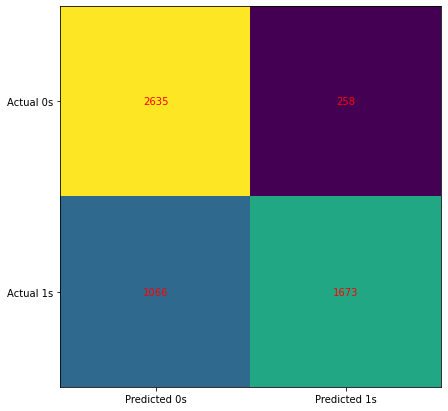

AUC: 0.8367895110593522


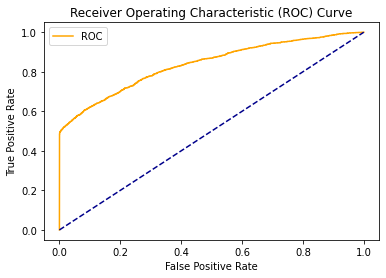

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

import catboost as cb
cb_classifier = cb.CatBoostClassifier()
cb_classifier.fit(X_train, y_train)
ytrain_pred = cb_classifier.predict_proba(X_train)
print('Catboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = cb_classifier.predict_proba(X_test)
print('Catboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, cb_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, cb_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, cb_classifier.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,cb_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,cb_classifier)

In [52]:
pickle.dump(gnb, open("model_CatBoost_loan_default_featengg_scaled_smote_data.pkl", 'wb'))

## With Hyperparamerter tuning

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


import catboost as cb
from sklearn.model_selection import GridSearchCV
params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300]}
cb1 = cb.CatBoostClassifier()
cb_classifier = GridSearchCV(cb1, params,  cv = 3)
cb_classifier.fit(X_train, y_train)
ytrain_pred = cb_classifier.predict_proba(X_train)
print('Catboost with Grid search cv train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = cb_classifier.predict_proba(X_test)
print('Catboost with Grid search cv test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, cb_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, cb_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, cb_classifier.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,cb_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,cb_classifier)

0:	learn: 0.6819061	total: 6.24ms	remaining: 1.87s
1:	learn: 0.6717127	total: 12.4ms	remaining: 1.85s
2:	learn: 0.6612338	total: 18.4ms	remaining: 1.82s
3:	learn: 0.6523941	total: 23.4ms	remaining: 1.73s
4:	learn: 0.6435956	total: 28.9ms	remaining: 1.7s
5:	learn: 0.6352596	total: 35.1ms	remaining: 1.72s
6:	learn: 0.6280101	total: 40.8ms	remaining: 1.71s
7:	learn: 0.6205435	total: 45.6ms	remaining: 1.66s
8:	learn: 0.6139202	total: 51ms	remaining: 1.65s
9:	learn: 0.6071351	total: 57.2ms	remaining: 1.66s
10:	learn: 0.6012118	total: 63.3ms	remaining: 1.66s
11:	learn: 0.5959981	total: 69.3ms	remaining: 1.66s
12:	learn: 0.5905982	total: 75.5ms	remaining: 1.67s
13:	learn: 0.5857094	total: 81.6ms	remaining: 1.67s
14:	learn: 0.5812071	total: 87.6ms	remaining: 1.66s
15:	learn: 0.5771888	total: 93.7ms	remaining: 1.66s
16:	learn: 0.5732369	total: 99.8ms	remaining: 1.66s
17:	learn: 0.5697531	total: 106ms	remaining: 1.65s
18:	learn: 0.5662907	total: 112ms	remaining: 1.65s
19:	learn: 0.5624809	total:

180:	learn: 0.4965914	total: 1.07s	remaining: 706ms
181:	learn: 0.4964959	total: 1.08s	remaining: 701ms
182:	learn: 0.4964509	total: 1.09s	remaining: 695ms
183:	learn: 0.4964025	total: 1.09s	remaining: 689ms
184:	learn: 0.4963718	total: 1.1s	remaining: 683ms
185:	learn: 0.4963110	total: 1.1s	remaining: 677ms
186:	learn: 0.4962099	total: 1.11s	remaining: 670ms
187:	learn: 0.4961802	total: 1.11s	remaining: 664ms
188:	learn: 0.4961126	total: 1.12s	remaining: 659ms
189:	learn: 0.4960624	total: 1.13s	remaining: 653ms
190:	learn: 0.4959825	total: 1.13s	remaining: 647ms
191:	learn: 0.4959294	total: 1.14s	remaining: 641ms
192:	learn: 0.4958795	total: 1.14s	remaining: 635ms
193:	learn: 0.4958034	total: 1.15s	remaining: 629ms
194:	learn: 0.4957626	total: 1.16s	remaining: 623ms
195:	learn: 0.4956893	total: 1.16s	remaining: 617ms
196:	learn: 0.4956396	total: 1.17s	remaining: 611ms
197:	learn: 0.4956076	total: 1.17s	remaining: 604ms
198:	learn: 0.4955424	total: 1.18s	remaining: 598ms
199:	learn: 0.

59:	learn: 0.5121914	total: 376ms	remaining: 1.5s
60:	learn: 0.5119025	total: 384ms	remaining: 1.5s
61:	learn: 0.5115892	total: 392ms	remaining: 1.5s
62:	learn: 0.5112332	total: 398ms	remaining: 1.5s
63:	learn: 0.5109582	total: 404ms	remaining: 1.49s
64:	learn: 0.5106872	total: 411ms	remaining: 1.49s
65:	learn: 0.5103842	total: 418ms	remaining: 1.48s
66:	learn: 0.5100517	total: 424ms	remaining: 1.47s
67:	learn: 0.5098318	total: 429ms	remaining: 1.46s
68:	learn: 0.5096152	total: 436ms	remaining: 1.46s
69:	learn: 0.5094431	total: 442ms	remaining: 1.45s
70:	learn: 0.5092083	total: 448ms	remaining: 1.44s
71:	learn: 0.5089908	total: 454ms	remaining: 1.44s
72:	learn: 0.5086928	total: 460ms	remaining: 1.43s
73:	learn: 0.5084582	total: 465ms	remaining: 1.42s
74:	learn: 0.5082345	total: 470ms	remaining: 1.41s
75:	learn: 0.5080609	total: 477ms	remaining: 1.41s
76:	learn: 0.5078419	total: 483ms	remaining: 1.4s
77:	learn: 0.5076534	total: 489ms	remaining: 1.39s
78:	learn: 0.5074561	total: 496ms	re

229:	learn: 0.4971753	total: 1.43s	remaining: 436ms
230:	learn: 0.4971384	total: 1.44s	remaining: 430ms
231:	learn: 0.4971264	total: 1.45s	remaining: 424ms
232:	learn: 0.4970893	total: 1.45s	remaining: 418ms
233:	learn: 0.4970365	total: 1.46s	remaining: 412ms
234:	learn: 0.4970067	total: 1.47s	remaining: 405ms
235:	learn: 0.4969493	total: 1.47s	remaining: 399ms
236:	learn: 0.4969279	total: 1.48s	remaining: 393ms
237:	learn: 0.4968978	total: 1.48s	remaining: 387ms
238:	learn: 0.4968487	total: 1.49s	remaining: 380ms
239:	learn: 0.4968138	total: 1.5s	remaining: 374ms
240:	learn: 0.4967644	total: 1.5s	remaining: 368ms
241:	learn: 0.4967276	total: 1.51s	remaining: 362ms
242:	learn: 0.4966410	total: 1.51s	remaining: 355ms
243:	learn: 0.4965918	total: 1.52s	remaining: 349ms
244:	learn: 0.4965595	total: 1.52s	remaining: 342ms
245:	learn: 0.4965029	total: 1.53s	remaining: 336ms
246:	learn: 0.4964755	total: 1.53s	remaining: 329ms
247:	learn: 0.4964323	total: 1.54s	remaining: 323ms
248:	learn: 0.

91:	learn: 0.5057132	total: 535ms	remaining: 1.21s
92:	learn: 0.5055924	total: 541ms	remaining: 1.2s
93:	learn: 0.5054244	total: 547ms	remaining: 1.2s
94:	learn: 0.5053237	total: 552ms	remaining: 1.19s
95:	learn: 0.5052148	total: 557ms	remaining: 1.18s
96:	learn: 0.5051036	total: 563ms	remaining: 1.18s
97:	learn: 0.5049782	total: 567ms	remaining: 1.17s
98:	learn: 0.5048814	total: 573ms	remaining: 1.16s
99:	learn: 0.5047506	total: 578ms	remaining: 1.16s
100:	learn: 0.5046088	total: 583ms	remaining: 1.15s
101:	learn: 0.5045434	total: 589ms	remaining: 1.14s
102:	learn: 0.5044387	total: 595ms	remaining: 1.14s
103:	learn: 0.5043225	total: 601ms	remaining: 1.13s
104:	learn: 0.5042029	total: 607ms	remaining: 1.13s
105:	learn: 0.5041074	total: 613ms	remaining: 1.12s
106:	learn: 0.5040087	total: 618ms	remaining: 1.11s
107:	learn: 0.5039126	total: 623ms	remaining: 1.11s
108:	learn: 0.5038049	total: 628ms	remaining: 1.1s
109:	learn: 0.5036959	total: 632ms	remaining: 1.09s
110:	learn: 0.5035672	to

277:	learn: 0.4945918	total: 1.6s	remaining: 127ms
278:	learn: 0.4945538	total: 1.61s	remaining: 121ms
279:	learn: 0.4945277	total: 1.61s	remaining: 115ms
280:	learn: 0.4944811	total: 1.62s	remaining: 110ms
281:	learn: 0.4944415	total: 1.63s	remaining: 104ms
282:	learn: 0.4943819	total: 1.63s	remaining: 98.1ms
283:	learn: 0.4943567	total: 1.64s	remaining: 92.4ms
284:	learn: 0.4943228	total: 1.64s	remaining: 86.6ms
285:	learn: 0.4942629	total: 1.65s	remaining: 80.8ms
286:	learn: 0.4942294	total: 1.66s	remaining: 75.1ms
287:	learn: 0.4941836	total: 1.66s	remaining: 69.3ms
288:	learn: 0.4941533	total: 1.67s	remaining: 63.6ms
289:	learn: 0.4940851	total: 1.68s	remaining: 57.8ms
290:	learn: 0.4940564	total: 1.68s	remaining: 52ms
291:	learn: 0.4940327	total: 1.69s	remaining: 46.3ms
292:	learn: 0.4940045	total: 1.69s	remaining: 40.5ms
293:	learn: 0.4939724	total: 1.7s	remaining: 34.7ms
294:	learn: 0.4939242	total: 1.71s	remaining: 28.9ms
295:	learn: 0.4938843	total: 1.71s	remaining: 23.1ms
29

154:	learn: 0.4804492	total: 904ms	remaining: 846ms
155:	learn: 0.4802784	total: 911ms	remaining: 841ms
156:	learn: 0.4800183	total: 917ms	remaining: 836ms
157:	learn: 0.4798588	total: 924ms	remaining: 830ms
158:	learn: 0.4796751	total: 930ms	remaining: 825ms
159:	learn: 0.4795458	total: 936ms	remaining: 819ms
160:	learn: 0.4792574	total: 943ms	remaining: 814ms
161:	learn: 0.4791587	total: 949ms	remaining: 808ms
162:	learn: 0.4789361	total: 954ms	remaining: 802ms
163:	learn: 0.4787448	total: 960ms	remaining: 796ms
164:	learn: 0.4786107	total: 966ms	remaining: 791ms
165:	learn: 0.4784054	total: 972ms	remaining: 785ms
166:	learn: 0.4782512	total: 979ms	remaining: 780ms
167:	learn: 0.4781150	total: 985ms	remaining: 774ms
168:	learn: 0.4779344	total: 991ms	remaining: 768ms
169:	learn: 0.4778262	total: 997ms	remaining: 763ms
170:	learn: 0.4777001	total: 1s	remaining: 757ms
171:	learn: 0.4776035	total: 1.01s	remaining: 751ms
172:	learn: 0.4773571	total: 1.01s	remaining: 746ms
173:	learn: 0.4

30:	learn: 0.5043998	total: 182ms	remaining: 1.58s
31:	learn: 0.5041534	total: 195ms	remaining: 1.63s
32:	learn: 0.5038898	total: 201ms	remaining: 1.62s
33:	learn: 0.5035285	total: 206ms	remaining: 1.61s
34:	learn: 0.5032926	total: 211ms	remaining: 1.6s
35:	learn: 0.5031120	total: 217ms	remaining: 1.59s
36:	learn: 0.5028724	total: 223ms	remaining: 1.58s
37:	learn: 0.5027723	total: 229ms	remaining: 1.57s
38:	learn: 0.5025102	total: 235ms	remaining: 1.57s
39:	learn: 0.5022863	total: 241ms	remaining: 1.56s
40:	learn: 0.5021268	total: 247ms	remaining: 1.56s
41:	learn: 0.5019403	total: 252ms	remaining: 1.55s
42:	learn: 0.5015489	total: 258ms	remaining: 1.54s
43:	learn: 0.5013426	total: 263ms	remaining: 1.53s
44:	learn: 0.5011055	total: 269ms	remaining: 1.52s
45:	learn: 0.5009123	total: 275ms	remaining: 1.52s
46:	learn: 0.5008272	total: 280ms	remaining: 1.51s
47:	learn: 0.5007101	total: 285ms	remaining: 1.5s
48:	learn: 0.5004200	total: 290ms	remaining: 1.48s
49:	learn: 0.5001816	total: 296ms

208:	learn: 0.4776212	total: 1.25s	remaining: 545ms
209:	learn: 0.4775350	total: 1.26s	remaining: 539ms
210:	learn: 0.4773515	total: 1.26s	remaining: 533ms
211:	learn: 0.4772236	total: 1.27s	remaining: 527ms
212:	learn: 0.4770429	total: 1.28s	remaining: 521ms
213:	learn: 0.4768812	total: 1.28s	remaining: 515ms
214:	learn: 0.4767094	total: 1.29s	remaining: 509ms
215:	learn: 0.4765867	total: 1.29s	remaining: 503ms
216:	learn: 0.4764422	total: 1.3s	remaining: 497ms
217:	learn: 0.4762862	total: 1.3s	remaining: 491ms
218:	learn: 0.4761134	total: 1.31s	remaining: 485ms
219:	learn: 0.4759167	total: 1.32s	remaining: 479ms
220:	learn: 0.4757223	total: 1.32s	remaining: 472ms
221:	learn: 0.4756299	total: 1.33s	remaining: 466ms
222:	learn: 0.4754565	total: 1.33s	remaining: 460ms
223:	learn: 0.4753357	total: 1.34s	remaining: 454ms
224:	learn: 0.4751704	total: 1.34s	remaining: 448ms
225:	learn: 0.4750984	total: 1.35s	remaining: 442ms
226:	learn: 0.4750028	total: 1.35s	remaining: 435ms
227:	learn: 0.

87:	learn: 0.4935108	total: 545ms	remaining: 1.31s
88:	learn: 0.4933622	total: 551ms	remaining: 1.31s
89:	learn: 0.4932332	total: 578ms	remaining: 1.35s
90:	learn: 0.4929643	total: 584ms	remaining: 1.34s
91:	learn: 0.4928442	total: 591ms	remaining: 1.34s
92:	learn: 0.4927264	total: 598ms	remaining: 1.33s
93:	learn: 0.4926325	total: 605ms	remaining: 1.33s
94:	learn: 0.4925811	total: 612ms	remaining: 1.32s
95:	learn: 0.4924781	total: 618ms	remaining: 1.31s
96:	learn: 0.4923183	total: 625ms	remaining: 1.31s
97:	learn: 0.4922131	total: 631ms	remaining: 1.3s
98:	learn: 0.4920316	total: 640ms	remaining: 1.3s
99:	learn: 0.4918424	total: 645ms	remaining: 1.29s
100:	learn: 0.4916929	total: 652ms	remaining: 1.28s
101:	learn: 0.4915774	total: 658ms	remaining: 1.28s
102:	learn: 0.4913959	total: 666ms	remaining: 1.27s
103:	learn: 0.4912741	total: 674ms	remaining: 1.27s
104:	learn: 0.4911227	total: 680ms	remaining: 1.26s
105:	learn: 0.4909021	total: 687ms	remaining: 1.26s
106:	learn: 0.4907002	total

271:	learn: 0.4652282	total: 1.77s	remaining: 182ms
272:	learn: 0.4650768	total: 1.78s	remaining: 176ms
273:	learn: 0.4649722	total: 1.78s	remaining: 169ms
274:	learn: 0.4648698	total: 1.79s	remaining: 163ms
275:	learn: 0.4647076	total: 1.8s	remaining: 156ms
276:	learn: 0.4646263	total: 1.8s	remaining: 150ms
277:	learn: 0.4644540	total: 1.81s	remaining: 143ms
278:	learn: 0.4643152	total: 1.82s	remaining: 137ms
279:	learn: 0.4642102	total: 1.82s	remaining: 130ms
280:	learn: 0.4640466	total: 1.83s	remaining: 124ms
281:	learn: 0.4639159	total: 1.83s	remaining: 117ms
282:	learn: 0.4637761	total: 1.84s	remaining: 111ms
283:	learn: 0.4636642	total: 1.85s	remaining: 104ms
284:	learn: 0.4635282	total: 1.85s	remaining: 97.5ms
285:	learn: 0.4634554	total: 1.86s	remaining: 91ms
286:	learn: 0.4634358	total: 1.86s	remaining: 84.5ms
287:	learn: 0.4632764	total: 1.87s	remaining: 77.9ms
288:	learn: 0.4630724	total: 1.88s	remaining: 71.4ms
289:	learn: 0.4629620	total: 1.88s	remaining: 64.9ms
290:	learn

150:	learn: 0.4702937	total: 895ms	remaining: 883ms
151:	learn: 0.4700720	total: 900ms	remaining: 877ms
152:	learn: 0.4697594	total: 906ms	remaining: 871ms
153:	learn: 0.4695118	total: 913ms	remaining: 866ms
154:	learn: 0.4692326	total: 919ms	remaining: 860ms
155:	learn: 0.4690666	total: 925ms	remaining: 854ms
156:	learn: 0.4688437	total: 932ms	remaining: 849ms
157:	learn: 0.4685938	total: 936ms	remaining: 842ms
158:	learn: 0.4684966	total: 942ms	remaining: 836ms
159:	learn: 0.4683904	total: 948ms	remaining: 829ms
160:	learn: 0.4682284	total: 954ms	remaining: 823ms
161:	learn: 0.4679655	total: 960ms	remaining: 818ms
162:	learn: 0.4677926	total: 966ms	remaining: 812ms
163:	learn: 0.4676663	total: 972ms	remaining: 806ms
164:	learn: 0.4674311	total: 978ms	remaining: 800ms
165:	learn: 0.4673203	total: 984ms	remaining: 795ms
166:	learn: 0.4671561	total: 990ms	remaining: 789ms
167:	learn: 0.4670261	total: 997ms	remaining: 783ms
168:	learn: 0.4668679	total: 1s	remaining: 777ms
169:	learn: 0.4

31:	learn: 0.4995123	total: 191ms	remaining: 1.6s
32:	learn: 0.4992413	total: 197ms	remaining: 1.6s
33:	learn: 0.4989299	total: 202ms	remaining: 1.58s
34:	learn: 0.4987864	total: 209ms	remaining: 1.58s
35:	learn: 0.4985094	total: 214ms	remaining: 1.56s
36:	learn: 0.4983487	total: 220ms	remaining: 1.56s
37:	learn: 0.4982065	total: 226ms	remaining: 1.56s
38:	learn: 0.4981489	total: 232ms	remaining: 1.55s
39:	learn: 0.4980415	total: 238ms	remaining: 1.55s
40:	learn: 0.4979259	total: 244ms	remaining: 1.54s
41:	learn: 0.4977399	total: 250ms	remaining: 1.54s
42:	learn: 0.4975945	total: 256ms	remaining: 1.53s
43:	learn: 0.4973238	total: 262ms	remaining: 1.53s
44:	learn: 0.4971577	total: 268ms	remaining: 1.52s
45:	learn: 0.4970438	total: 274ms	remaining: 1.51s
46:	learn: 0.4968756	total: 280ms	remaining: 1.51s
47:	learn: 0.4967948	total: 286ms	remaining: 1.5s
48:	learn: 0.4966917	total: 292ms	remaining: 1.5s
49:	learn: 0.4965695	total: 298ms	remaining: 1.49s
50:	learn: 0.4964095	total: 304ms	r

207:	learn: 0.4651651	total: 1.26s	remaining: 557ms
208:	learn: 0.4649890	total: 1.27s	remaining: 551ms
209:	learn: 0.4648143	total: 1.27s	remaining: 545ms
210:	learn: 0.4645599	total: 1.28s	remaining: 539ms
211:	learn: 0.4643828	total: 1.28s	remaining: 533ms
212:	learn: 0.4641297	total: 1.29s	remaining: 527ms
213:	learn: 0.4639317	total: 1.29s	remaining: 520ms
214:	learn: 0.4637637	total: 1.3s	remaining: 514ms
215:	learn: 0.4635652	total: 1.31s	remaining: 508ms
216:	learn: 0.4632994	total: 1.31s	remaining: 502ms
217:	learn: 0.4630724	total: 1.32s	remaining: 496ms
218:	learn: 0.4629510	total: 1.32s	remaining: 490ms
219:	learn: 0.4628167	total: 1.33s	remaining: 484ms
220:	learn: 0.4626406	total: 1.33s	remaining: 478ms
221:	learn: 0.4623913	total: 1.34s	remaining: 471ms
222:	learn: 0.4622479	total: 1.35s	remaining: 465ms
223:	learn: 0.4620910	total: 1.35s	remaining: 459ms
224:	learn: 0.4618683	total: 1.36s	remaining: 453ms
225:	learn: 0.4617453	total: 1.36s	remaining: 447ms
226:	learn: 0

96:	learn: 0.4849091	total: 552ms	remaining: 1.15s
97:	learn: 0.4845343	total: 559ms	remaining: 1.15s
98:	learn: 0.4842644	total: 565ms	remaining: 1.15s
99:	learn: 0.4842233	total: 571ms	remaining: 1.14s
100:	learn: 0.4839355	total: 578ms	remaining: 1.14s
101:	learn: 0.4836803	total: 583ms	remaining: 1.13s
102:	learn: 0.4834485	total: 588ms	remaining: 1.12s
103:	learn: 0.4831343	total: 594ms	remaining: 1.12s
104:	learn: 0.4826066	total: 599ms	remaining: 1.11s
105:	learn: 0.4823387	total: 605ms	remaining: 1.11s
106:	learn: 0.4821170	total: 611ms	remaining: 1.1s
107:	learn: 0.4819046	total: 616ms	remaining: 1.09s
108:	learn: 0.4815666	total: 622ms	remaining: 1.09s
109:	learn: 0.4813967	total: 628ms	remaining: 1.08s
110:	learn: 0.4810838	total: 633ms	remaining: 1.08s
111:	learn: 0.4809242	total: 639ms	remaining: 1.07s
112:	learn: 0.4805716	total: 644ms	remaining: 1.07s
113:	learn: 0.4802300	total: 650ms	remaining: 1.06s
114:	learn: 0.4800456	total: 656ms	remaining: 1.05s
115:	learn: 0.479

280:	learn: 0.4483703	total: 1.62s	remaining: 109ms
281:	learn: 0.4482559	total: 1.62s	remaining: 104ms
282:	learn: 0.4481446	total: 1.63s	remaining: 98ms
283:	learn: 0.4479414	total: 1.64s	remaining: 92.2ms
284:	learn: 0.4478806	total: 1.64s	remaining: 86.5ms
285:	learn: 0.4478023	total: 1.65s	remaining: 80.7ms
286:	learn: 0.4476147	total: 1.65s	remaining: 74.9ms
287:	learn: 0.4475185	total: 1.66s	remaining: 69.2ms
288:	learn: 0.4474293	total: 1.67s	remaining: 63.4ms
289:	learn: 0.4473242	total: 1.67s	remaining: 57.6ms
290:	learn: 0.4471449	total: 1.68s	remaining: 51.9ms
291:	learn: 0.4470618	total: 1.68s	remaining: 46.1ms
292:	learn: 0.4468989	total: 1.69s	remaining: 40.3ms
293:	learn: 0.4466714	total: 1.69s	remaining: 34.6ms
294:	learn: 0.4465635	total: 1.7s	remaining: 28.8ms
295:	learn: 0.4463417	total: 1.7s	remaining: 23ms
296:	learn: 0.4461867	total: 1.71s	remaining: 17.3ms
297:	learn: 0.4460824	total: 1.72s	remaining: 11.5ms
298:	learn: 0.4460301	total: 1.72s	remaining: 5.76ms
2

155:	learn: 0.4979954	total: 915ms	remaining: 845ms
156:	learn: 0.4979408	total: 922ms	remaining: 840ms
157:	learn: 0.4979134	total: 935ms	remaining: 840ms
158:	learn: 0.4978521	total: 941ms	remaining: 835ms
159:	learn: 0.4977942	total: 947ms	remaining: 829ms
160:	learn: 0.4977480	total: 954ms	remaining: 823ms
161:	learn: 0.4977174	total: 960ms	remaining: 818ms
162:	learn: 0.4976648	total: 969ms	remaining: 814ms
163:	learn: 0.4976146	total: 975ms	remaining: 808ms
164:	learn: 0.4975428	total: 981ms	remaining: 803ms
165:	learn: 0.4975108	total: 987ms	remaining: 797ms
166:	learn: 0.4974381	total: 993ms	remaining: 791ms
167:	learn: 0.4973828	total: 1000ms	remaining: 785ms
168:	learn: 0.4973217	total: 1s	remaining: 780ms
169:	learn: 0.4972863	total: 1.01s	remaining: 774ms
170:	learn: 0.4972261	total: 1.02s	remaining: 768ms
171:	learn: 0.4971766	total: 1.02s	remaining: 762ms
172:	learn: 0.4971380	total: 1.03s	remaining: 756ms
173:	learn: 0.4970826	total: 1.04s	remaining: 751ms
174:	learn: 0.

31:	learn: 0.5346411	total: 190ms	remaining: 1.59s
32:	learn: 0.5330330	total: 196ms	remaining: 1.59s
33:	learn: 0.5314948	total: 203ms	remaining: 1.59s
34:	learn: 0.5301117	total: 209ms	remaining: 1.58s
35:	learn: 0.5290604	total: 215ms	remaining: 1.58s
36:	learn: 0.5280356	total: 222ms	remaining: 1.58s
37:	learn: 0.5269269	total: 228ms	remaining: 1.57s
38:	learn: 0.5259656	total: 234ms	remaining: 1.56s
39:	learn: 0.5249838	total: 239ms	remaining: 1.56s
40:	learn: 0.5239105	total: 245ms	remaining: 1.55s
41:	learn: 0.5230146	total: 251ms	remaining: 1.54s
42:	learn: 0.5223297	total: 257ms	remaining: 1.54s
43:	learn: 0.5215295	total: 263ms	remaining: 1.53s
44:	learn: 0.5206083	total: 268ms	remaining: 1.52s
45:	learn: 0.5198158	total: 274ms	remaining: 1.51s
46:	learn: 0.5190983	total: 280ms	remaining: 1.51s
47:	learn: 0.5183929	total: 286ms	remaining: 1.5s
48:	learn: 0.5177677	total: 292ms	remaining: 1.5s
49:	learn: 0.5171891	total: 298ms	remaining: 1.49s
50:	learn: 0.5166905	total: 304ms

206:	learn: 0.4983713	total: 1.26s	remaining: 567ms
207:	learn: 0.4983543	total: 1.27s	remaining: 561ms
208:	learn: 0.4982941	total: 1.27s	remaining: 555ms
209:	learn: 0.4982778	total: 1.28s	remaining: 549ms
210:	learn: 0.4982237	total: 1.29s	remaining: 543ms
211:	learn: 0.4981789	total: 1.29s	remaining: 536ms
212:	learn: 0.4981239	total: 1.3s	remaining: 530ms
213:	learn: 0.4981007	total: 1.3s	remaining: 524ms
214:	learn: 0.4980597	total: 1.31s	remaining: 518ms
215:	learn: 0.4979824	total: 1.32s	remaining: 512ms
216:	learn: 0.4979355	total: 1.32s	remaining: 506ms
217:	learn: 0.4979029	total: 1.33s	remaining: 500ms
218:	learn: 0.4978832	total: 1.33s	remaining: 493ms
219:	learn: 0.4978363	total: 1.34s	remaining: 487ms
220:	learn: 0.4978217	total: 1.34s	remaining: 481ms
221:	learn: 0.4978012	total: 1.35s	remaining: 475ms
222:	learn: 0.4977693	total: 1.36s	remaining: 469ms
223:	learn: 0.4977211	total: 1.36s	remaining: 462ms
224:	learn: 0.4976695	total: 1.37s	remaining: 456ms
225:	learn: 0.

93:	learn: 0.5051976	total: 547ms	remaining: 1.2s
94:	learn: 0.5050853	total: 555ms	remaining: 1.2s
95:	learn: 0.5049736	total: 561ms	remaining: 1.19s
96:	learn: 0.5048590	total: 568ms	remaining: 1.19s
97:	learn: 0.5047346	total: 574ms	remaining: 1.18s
98:	learn: 0.5046644	total: 580ms	remaining: 1.18s
99:	learn: 0.5045370	total: 586ms	remaining: 1.17s
100:	learn: 0.5044348	total: 591ms	remaining: 1.17s
101:	learn: 0.5043655	total: 597ms	remaining: 1.16s
102:	learn: 0.5042934	total: 602ms	remaining: 1.15s
103:	learn: 0.5041684	total: 608ms	remaining: 1.15s
104:	learn: 0.5040641	total: 614ms	remaining: 1.14s
105:	learn: 0.5039608	total: 619ms	remaining: 1.13s
106:	learn: 0.5038739	total: 625ms	remaining: 1.13s
107:	learn: 0.5037574	total: 632ms	remaining: 1.12s
108:	learn: 0.5036837	total: 638ms	remaining: 1.12s
109:	learn: 0.5035718	total: 644ms	remaining: 1.11s
110:	learn: 0.5035298	total: 650ms	remaining: 1.11s
111:	learn: 0.5034319	total: 656ms	remaining: 1.1s
112:	learn: 0.5033409	

270:	learn: 0.4954575	total: 1.62s	remaining: 174ms
271:	learn: 0.4954075	total: 1.63s	remaining: 168ms
272:	learn: 0.4953715	total: 1.64s	remaining: 162ms
273:	learn: 0.4953102	total: 1.64s	remaining: 156ms
274:	learn: 0.4952431	total: 1.65s	remaining: 150ms
275:	learn: 0.4952195	total: 1.66s	remaining: 144ms
276:	learn: 0.4951733	total: 1.66s	remaining: 138ms
277:	learn: 0.4951464	total: 1.67s	remaining: 132ms
278:	learn: 0.4950866	total: 1.67s	remaining: 126ms
279:	learn: 0.4950352	total: 1.68s	remaining: 120ms
280:	learn: 0.4950017	total: 1.69s	remaining: 114ms
281:	learn: 0.4949651	total: 1.69s	remaining: 108ms
282:	learn: 0.4949218	total: 1.7s	remaining: 102ms
283:	learn: 0.4949037	total: 1.71s	remaining: 96.1ms
284:	learn: 0.4948574	total: 1.71s	remaining: 90.1ms
285:	learn: 0.4948173	total: 1.72s	remaining: 84.1ms
286:	learn: 0.4947482	total: 1.72s	remaining: 78.1ms
287:	learn: 0.4947000	total: 1.73s	remaining: 72.1ms
288:	learn: 0.4946494	total: 1.74s	remaining: 66.1ms
289:	le

146:	learn: 0.4833955	total: 895ms	remaining: 931ms
147:	learn: 0.4832824	total: 901ms	remaining: 926ms
148:	learn: 0.4831235	total: 908ms	remaining: 920ms
149:	learn: 0.4829324	total: 915ms	remaining: 915ms
150:	learn: 0.4827236	total: 921ms	remaining: 909ms
151:	learn: 0.4825585	total: 927ms	remaining: 903ms
152:	learn: 0.4823663	total: 933ms	remaining: 897ms
153:	learn: 0.4822370	total: 939ms	remaining: 891ms
154:	learn: 0.4820516	total: 946ms	remaining: 885ms
155:	learn: 0.4819610	total: 952ms	remaining: 878ms
156:	learn: 0.4817794	total: 958ms	remaining: 872ms
157:	learn: 0.4816171	total: 964ms	remaining: 866ms
158:	learn: 0.4814789	total: 969ms	remaining: 859ms
159:	learn: 0.4814659	total: 975ms	remaining: 853ms
160:	learn: 0.4813717	total: 980ms	remaining: 847ms
161:	learn: 0.4812350	total: 986ms	remaining: 840ms
162:	learn: 0.4810629	total: 992ms	remaining: 834ms
163:	learn: 0.4809209	total: 999ms	remaining: 828ms
164:	learn: 0.4807842	total: 1s	remaining: 822ms
165:	learn: 0.4

31:	learn: 0.5036990	total: 186ms	remaining: 1.56s
32:	learn: 0.5034513	total: 192ms	remaining: 1.56s
33:	learn: 0.5031449	total: 199ms	remaining: 1.56s
34:	learn: 0.5029120	total: 205ms	remaining: 1.55s
35:	learn: 0.5026779	total: 210ms	remaining: 1.54s
36:	learn: 0.5024605	total: 217ms	remaining: 1.54s
37:	learn: 0.5022494	total: 222ms	remaining: 1.53s
38:	learn: 0.5021173	total: 229ms	remaining: 1.53s
39:	learn: 0.5019198	total: 234ms	remaining: 1.52s
40:	learn: 0.5017230	total: 239ms	remaining: 1.51s
41:	learn: 0.5015119	total: 246ms	remaining: 1.51s
42:	learn: 0.5012909	total: 251ms	remaining: 1.5s
43:	learn: 0.5010851	total: 257ms	remaining: 1.5s
44:	learn: 0.5009197	total: 264ms	remaining: 1.49s
45:	learn: 0.5007193	total: 268ms	remaining: 1.48s
46:	learn: 0.5005009	total: 274ms	remaining: 1.47s
47:	learn: 0.5003556	total: 280ms	remaining: 1.47s
48:	learn: 0.5002025	total: 285ms	remaining: 1.46s
49:	learn: 0.5001399	total: 291ms	remaining: 1.46s
50:	learn: 0.4999179	total: 297ms

203:	learn: 0.4797060	total: 1.25s	remaining: 590ms
204:	learn: 0.4796982	total: 1.26s	remaining: 584ms
205:	learn: 0.4795510	total: 1.27s	remaining: 579ms
206:	learn: 0.4795429	total: 1.27s	remaining: 573ms
207:	learn: 0.4794043	total: 1.28s	remaining: 567ms
208:	learn: 0.4791960	total: 1.29s	remaining: 560ms
209:	learn: 0.4790236	total: 1.29s	remaining: 554ms
210:	learn: 0.4788694	total: 1.3s	remaining: 548ms
211:	learn: 0.4787512	total: 1.3s	remaining: 542ms
212:	learn: 0.4786200	total: 1.31s	remaining: 536ms
213:	learn: 0.4785282	total: 1.32s	remaining: 529ms
214:	learn: 0.4783683	total: 1.32s	remaining: 523ms
215:	learn: 0.4782257	total: 1.33s	remaining: 517ms
216:	learn: 0.4780615	total: 1.33s	remaining: 511ms
217:	learn: 0.4779037	total: 1.34s	remaining: 504ms
218:	learn: 0.4778339	total: 1.35s	remaining: 498ms
219:	learn: 0.4776199	total: 1.35s	remaining: 492ms
220:	learn: 0.4774217	total: 1.36s	remaining: 485ms
221:	learn: 0.4772468	total: 1.36s	remaining: 479ms
222:	learn: 0.

88:	learn: 0.4949547	total: 559ms	remaining: 1.32s
89:	learn: 0.4948238	total: 565ms	remaining: 1.32s
90:	learn: 0.4947734	total: 571ms	remaining: 1.31s
91:	learn: 0.4946046	total: 578ms	remaining: 1.31s
92:	learn: 0.4944926	total: 585ms	remaining: 1.3s
93:	learn: 0.4943407	total: 592ms	remaining: 1.3s
94:	learn: 0.4941213	total: 599ms	remaining: 1.29s
95:	learn: 0.4940022	total: 606ms	remaining: 1.29s
96:	learn: 0.4938298	total: 612ms	remaining: 1.28s
97:	learn: 0.4936946	total: 621ms	remaining: 1.28s
98:	learn: 0.4935904	total: 627ms	remaining: 1.27s
99:	learn: 0.4934020	total: 633ms	remaining: 1.26s
100:	learn: 0.4933067	total: 639ms	remaining: 1.26s
101:	learn: 0.4933004	total: 644ms	remaining: 1.25s
102:	learn: 0.4931658	total: 651ms	remaining: 1.24s
103:	learn: 0.4929721	total: 657ms	remaining: 1.24s
104:	learn: 0.4927858	total: 663ms	remaining: 1.23s
105:	learn: 0.4924834	total: 669ms	remaining: 1.22s
106:	learn: 0.4922837	total: 675ms	remaining: 1.22s
107:	learn: 0.4919892	tota

258:	learn: 0.4711489	total: 1.63s	remaining: 257ms
259:	learn: 0.4710379	total: 1.63s	remaining: 251ms
260:	learn: 0.4708860	total: 1.64s	remaining: 245ms
261:	learn: 0.4707541	total: 1.65s	remaining: 239ms
262:	learn: 0.4705950	total: 1.65s	remaining: 233ms
263:	learn: 0.4704831	total: 1.66s	remaining: 226ms
264:	learn: 0.4704229	total: 1.67s	remaining: 220ms
265:	learn: 0.4703139	total: 1.67s	remaining: 214ms
266:	learn: 0.4702109	total: 1.68s	remaining: 207ms
267:	learn: 0.4700523	total: 1.68s	remaining: 201ms
268:	learn: 0.4699562	total: 1.69s	remaining: 195ms
269:	learn: 0.4698075	total: 1.7s	remaining: 188ms
270:	learn: 0.4696509	total: 1.7s	remaining: 182ms
271:	learn: 0.4695780	total: 1.71s	remaining: 176ms
272:	learn: 0.4694289	total: 1.71s	remaining: 170ms
273:	learn: 0.4692696	total: 1.72s	remaining: 163ms
274:	learn: 0.4691670	total: 1.73s	remaining: 157ms
275:	learn: 0.4690414	total: 1.73s	remaining: 151ms
276:	learn: 0.4689759	total: 1.74s	remaining: 144ms
277:	learn: 0.

145:	learn: 0.4733645	total: 906ms	remaining: 956ms
146:	learn: 0.4731556	total: 913ms	remaining: 951ms
147:	learn: 0.4730547	total: 920ms	remaining: 945ms
148:	learn: 0.4728467	total: 927ms	remaining: 939ms
149:	learn: 0.4726977	total: 934ms	remaining: 934ms
150:	learn: 0.4724642	total: 940ms	remaining: 927ms
151:	learn: 0.4722997	total: 945ms	remaining: 921ms
152:	learn: 0.4721842	total: 952ms	remaining: 914ms
153:	learn: 0.4720075	total: 957ms	remaining: 908ms
154:	learn: 0.4718198	total: 963ms	remaining: 901ms
155:	learn: 0.4716574	total: 969ms	remaining: 895ms
156:	learn: 0.4715369	total: 975ms	remaining: 888ms
157:	learn: 0.4712332	total: 981ms	remaining: 882ms
158:	learn: 0.4711111	total: 987ms	remaining: 875ms
159:	learn: 0.4709515	total: 993ms	remaining: 869ms
160:	learn: 0.4707834	total: 999ms	remaining: 863ms
161:	learn: 0.4706329	total: 1s	remaining: 856ms
162:	learn: 0.4703429	total: 1.01s	remaining: 850ms
163:	learn: 0.4700839	total: 1.02s	remaining: 843ms
164:	learn: 0.4

30:	learn: 0.5012816	total: 185ms	remaining: 1.61s
31:	learn: 0.5009819	total: 191ms	remaining: 1.6s
32:	learn: 0.5007017	total: 198ms	remaining: 1.6s
33:	learn: 0.5005551	total: 205ms	remaining: 1.6s
34:	learn: 0.5002369	total: 212ms	remaining: 1.6s
35:	learn: 0.4999066	total: 218ms	remaining: 1.6s
36:	learn: 0.4997721	total: 226ms	remaining: 1.6s
37:	learn: 0.4995020	total: 232ms	remaining: 1.6s
38:	learn: 0.4992312	total: 238ms	remaining: 1.59s
39:	learn: 0.4990474	total: 244ms	remaining: 1.59s
40:	learn: 0.4988106	total: 251ms	remaining: 1.58s
41:	learn: 0.4986139	total: 257ms	remaining: 1.58s
42:	learn: 0.4985052	total: 264ms	remaining: 1.57s
43:	learn: 0.4982632	total: 269ms	remaining: 1.56s
44:	learn: 0.4981661	total: 275ms	remaining: 1.56s
45:	learn: 0.4979917	total: 281ms	remaining: 1.55s
46:	learn: 0.4978159	total: 288ms	remaining: 1.55s
47:	learn: 0.4976232	total: 294ms	remaining: 1.54s
48:	learn: 0.4974145	total: 300ms	remaining: 1.54s
49:	learn: 0.4971916	total: 307ms	rema

196:	learn: 0.4689403	total: 1.25s	remaining: 655ms
197:	learn: 0.4688442	total: 1.26s	remaining: 649ms
198:	learn: 0.4685842	total: 1.26s	remaining: 642ms
199:	learn: 0.4685153	total: 1.27s	remaining: 636ms
200:	learn: 0.4682434	total: 1.28s	remaining: 630ms
201:	learn: 0.4681170	total: 1.28s	remaining: 623ms
202:	learn: 0.4678491	total: 1.29s	remaining: 617ms
203:	learn: 0.4676253	total: 1.3s	remaining: 611ms
204:	learn: 0.4673911	total: 1.3s	remaining: 604ms
205:	learn: 0.4672535	total: 1.31s	remaining: 598ms
206:	learn: 0.4670963	total: 1.32s	remaining: 591ms
207:	learn: 0.4669887	total: 1.32s	remaining: 585ms
208:	learn: 0.4668029	total: 1.33s	remaining: 579ms
209:	learn: 0.4667250	total: 1.33s	remaining: 572ms
210:	learn: 0.4664328	total: 1.34s	remaining: 566ms
211:	learn: 0.4662306	total: 1.35s	remaining: 559ms
212:	learn: 0.4661045	total: 1.35s	remaining: 553ms
213:	learn: 0.4659159	total: 1.36s	remaining: 546ms
214:	learn: 0.4657027	total: 1.37s	remaining: 540ms
215:	learn: 0.

59:	learn: 0.4943982	total: 363ms	remaining: 1.45s
60:	learn: 0.4941587	total: 370ms	remaining: 1.45s
61:	learn: 0.4939624	total: 378ms	remaining: 1.45s
62:	learn: 0.4937976	total: 386ms	remaining: 1.45s
63:	learn: 0.4934357	total: 392ms	remaining: 1.44s
64:	learn: 0.4932924	total: 398ms	remaining: 1.44s
65:	learn: 0.4930494	total: 404ms	remaining: 1.43s
66:	learn: 0.4927655	total: 410ms	remaining: 1.43s
67:	learn: 0.4924682	total: 416ms	remaining: 1.42s
68:	learn: 0.4922583	total: 423ms	remaining: 1.41s
69:	learn: 0.4920079	total: 429ms	remaining: 1.41s
70:	learn: 0.4918149	total: 435ms	remaining: 1.4s
71:	learn: 0.4915623	total: 441ms	remaining: 1.4s
72:	learn: 0.4912373	total: 447ms	remaining: 1.39s
73:	learn: 0.4911098	total: 453ms	remaining: 1.38s
74:	learn: 0.4908456	total: 460ms	remaining: 1.38s
75:	learn: 0.4905465	total: 466ms	remaining: 1.37s
76:	learn: 0.4902558	total: 472ms	remaining: 1.37s
77:	learn: 0.4900477	total: 479ms	remaining: 1.36s
78:	learn: 0.4897934	total: 485ms

229:	learn: 0.4592391	total: 1.44s	remaining: 437ms
230:	learn: 0.4590439	total: 1.44s	remaining: 431ms
231:	learn: 0.4589053	total: 1.45s	remaining: 425ms
232:	learn: 0.4587006	total: 1.46s	remaining: 419ms
233:	learn: 0.4585363	total: 1.46s	remaining: 413ms
234:	learn: 0.4584276	total: 1.47s	remaining: 407ms
235:	learn: 0.4582698	total: 1.48s	remaining: 400ms
236:	learn: 0.4582588	total: 1.48s	remaining: 394ms
237:	learn: 0.4580584	total: 1.49s	remaining: 387ms
238:	learn: 0.4579182	total: 1.49s	remaining: 381ms
239:	learn: 0.4577194	total: 1.5s	remaining: 375ms
240:	learn: 0.4574919	total: 1.5s	remaining: 369ms
241:	learn: 0.4574206	total: 1.51s	remaining: 362ms
242:	learn: 0.4572718	total: 1.52s	remaining: 356ms
243:	learn: 0.4570156	total: 1.52s	remaining: 350ms
244:	learn: 0.4569221	total: 1.53s	remaining: 343ms
245:	learn: 0.4568218	total: 1.53s	remaining: 337ms
246:	learn: 0.4565188	total: 1.54s	remaining: 331ms
247:	learn: 0.4563666	total: 1.55s	remaining: 324ms
248:	learn: 0.

91:	learn: 0.5040694	total: 549ms	remaining: 1.24s
92:	learn: 0.5039363	total: 555ms	remaining: 1.24s
93:	learn: 0.5037728	total: 563ms	remaining: 1.23s
94:	learn: 0.5035934	total: 569ms	remaining: 1.23s
95:	learn: 0.5034013	total: 575ms	remaining: 1.22s
96:	learn: 0.5032430	total: 581ms	remaining: 1.22s
97:	learn: 0.5031092	total: 587ms	remaining: 1.21s
98:	learn: 0.5030076	total: 593ms	remaining: 1.2s
99:	learn: 0.5028357	total: 599ms	remaining: 1.2s
100:	learn: 0.5026691	total: 605ms	remaining: 1.19s
101:	learn: 0.5025799	total: 611ms	remaining: 1.19s
102:	learn: 0.5024902	total: 618ms	remaining: 1.18s
103:	learn: 0.5023790	total: 625ms	remaining: 1.18s
104:	learn: 0.5022597	total: 631ms	remaining: 1.17s
105:	learn: 0.5021553	total: 637ms	remaining: 1.17s
106:	learn: 0.5020647	total: 643ms	remaining: 1.16s
107:	learn: 0.5019361	total: 648ms	remaining: 1.15s
108:	learn: 0.5018495	total: 654ms	remaining: 1.15s
109:	learn: 0.5017638	total: 660ms	remaining: 1.14s
110:	learn: 0.5016436	t

263:	learn: 0.4936232	total: 1.62s	remaining: 221ms
264:	learn: 0.4935864	total: 1.63s	remaining: 215ms
265:	learn: 0.4935562	total: 1.63s	remaining: 209ms
266:	learn: 0.4935127	total: 1.64s	remaining: 203ms
267:	learn: 0.4934710	total: 1.65s	remaining: 197ms
268:	learn: 0.4934374	total: 1.65s	remaining: 191ms
269:	learn: 0.4934185	total: 1.66s	remaining: 184ms
270:	learn: 0.4933982	total: 1.67s	remaining: 178ms
271:	learn: 0.4933730	total: 1.67s	remaining: 172ms
272:	learn: 0.4933376	total: 1.68s	remaining: 166ms
273:	learn: 0.4933110	total: 1.68s	remaining: 160ms
274:	learn: 0.4933044	total: 1.69s	remaining: 154ms
275:	learn: 0.4932395	total: 1.7s	remaining: 148ms
276:	learn: 0.4931927	total: 1.7s	remaining: 141ms
277:	learn: 0.4931453	total: 1.71s	remaining: 135ms
278:	learn: 0.4931112	total: 1.72s	remaining: 129ms
279:	learn: 0.4930549	total: 1.72s	remaining: 123ms
280:	learn: 0.4929991	total: 1.73s	remaining: 117ms
281:	learn: 0.4929610	total: 1.74s	remaining: 111ms
282:	learn: 0.

144:	learn: 0.5018432	total: 902ms	remaining: 964ms
145:	learn: 0.5017892	total: 909ms	remaining: 958ms
146:	learn: 0.5017386	total: 915ms	remaining: 952ms
147:	learn: 0.5016725	total: 922ms	remaining: 946ms
148:	learn: 0.5016373	total: 928ms	remaining: 940ms
149:	learn: 0.5015839	total: 934ms	remaining: 934ms
150:	learn: 0.5015632	total: 941ms	remaining: 928ms
151:	learn: 0.5014978	total: 947ms	remaining: 922ms
152:	learn: 0.5014262	total: 953ms	remaining: 916ms
153:	learn: 0.5013666	total: 958ms	remaining: 909ms
154:	learn: 0.5013177	total: 965ms	remaining: 902ms
155:	learn: 0.5012881	total: 971ms	remaining: 896ms
156:	learn: 0.5012415	total: 977ms	remaining: 890ms
157:	learn: 0.5012127	total: 983ms	remaining: 884ms
158:	learn: 0.5011561	total: 990ms	remaining: 878ms
159:	learn: 0.5010767	total: 996ms	remaining: 871ms
160:	learn: 0.5010422	total: 1s	remaining: 865ms
161:	learn: 0.5010047	total: 1.01s	remaining: 859ms
162:	learn: 0.5009485	total: 1.01s	remaining: 852ms
163:	learn: 0.5

30:	learn: 0.5367173	total: 186ms	remaining: 1.61s
31:	learn: 0.5349578	total: 193ms	remaining: 1.61s
32:	learn: 0.5334055	total: 199ms	remaining: 1.61s
33:	learn: 0.5319587	total: 206ms	remaining: 1.61s
34:	learn: 0.5304898	total: 213ms	remaining: 1.61s
35:	learn: 0.5292349	total: 219ms	remaining: 1.61s
36:	learn: 0.5281353	total: 226ms	remaining: 1.6s
37:	learn: 0.5269501	total: 232ms	remaining: 1.6s
38:	learn: 0.5259750	total: 238ms	remaining: 1.59s
39:	learn: 0.5249931	total: 243ms	remaining: 1.58s
40:	learn: 0.5240423	total: 250ms	remaining: 1.58s
41:	learn: 0.5230488	total: 256ms	remaining: 1.57s
42:	learn: 0.5223489	total: 262ms	remaining: 1.57s
43:	learn: 0.5214395	total: 269ms	remaining: 1.56s
44:	learn: 0.5207492	total: 275ms	remaining: 1.56s
45:	learn: 0.5198225	total: 281ms	remaining: 1.55s
46:	learn: 0.5191634	total: 287ms	remaining: 1.55s
47:	learn: 0.5184990	total: 294ms	remaining: 1.54s
48:	learn: 0.5179265	total: 300ms	remaining: 1.53s
49:	learn: 0.5172110	total: 306ms

197:	learn: 0.4987207	total: 1.25s	remaining: 642ms
198:	learn: 0.4986811	total: 1.25s	remaining: 636ms
199:	learn: 0.4986508	total: 1.26s	remaining: 630ms
200:	learn: 0.4985761	total: 1.27s	remaining: 624ms
201:	learn: 0.4985143	total: 1.27s	remaining: 618ms
202:	learn: 0.4984723	total: 1.28s	remaining: 612ms
203:	learn: 0.4984396	total: 1.29s	remaining: 605ms
204:	learn: 0.4984028	total: 1.29s	remaining: 599ms
205:	learn: 0.4983261	total: 1.3s	remaining: 593ms
206:	learn: 0.4982938	total: 1.3s	remaining: 586ms
207:	learn: 0.4982501	total: 1.31s	remaining: 580ms
208:	learn: 0.4982129	total: 1.32s	remaining: 574ms
209:	learn: 0.4981515	total: 1.32s	remaining: 568ms
210:	learn: 0.4980815	total: 1.33s	remaining: 561ms
211:	learn: 0.4980170	total: 1.34s	remaining: 555ms
212:	learn: 0.4979367	total: 1.34s	remaining: 549ms
213:	learn: 0.4978656	total: 1.35s	remaining: 543ms
214:	learn: 0.4978026	total: 1.36s	remaining: 536ms
215:	learn: 0.4977686	total: 1.36s	remaining: 530ms
216:	learn: 0.

59:	learn: 0.4962695	total: 373ms	remaining: 1.49s
60:	learn: 0.4961674	total: 380ms	remaining: 1.49s
61:	learn: 0.4960420	total: 387ms	remaining: 1.49s
62:	learn: 0.4959247	total: 394ms	remaining: 1.48s
63:	learn: 0.4957471	total: 400ms	remaining: 1.48s
64:	learn: 0.4955673	total: 407ms	remaining: 1.47s
65:	learn: 0.4954618	total: 414ms	remaining: 1.47s
66:	learn: 0.4953720	total: 420ms	remaining: 1.46s
67:	learn: 0.4951453	total: 427ms	remaining: 1.46s
68:	learn: 0.4949807	total: 433ms	remaining: 1.45s
69:	learn: 0.4949306	total: 439ms	remaining: 1.44s
70:	learn: 0.4948249	total: 446ms	remaining: 1.44s
71:	learn: 0.4947205	total: 452ms	remaining: 1.43s
72:	learn: 0.4944464	total: 458ms	remaining: 1.43s
73:	learn: 0.4942915	total: 464ms	remaining: 1.42s
74:	learn: 0.4941865	total: 471ms	remaining: 1.41s
75:	learn: 0.4940670	total: 477ms	remaining: 1.41s
76:	learn: 0.4939976	total: 484ms	remaining: 1.4s
77:	learn: 0.4938776	total: 490ms	remaining: 1.4s
78:	learn: 0.4937061	total: 497ms

224:	learn: 0.4735502	total: 1.43s	remaining: 477ms
225:	learn: 0.4734700	total: 1.44s	remaining: 471ms
226:	learn: 0.4733272	total: 1.45s	remaining: 465ms
227:	learn: 0.4732147	total: 1.45s	remaining: 459ms
228:	learn: 0.4730368	total: 1.46s	remaining: 452ms
229:	learn: 0.4728283	total: 1.46s	remaining: 446ms
230:	learn: 0.4726851	total: 1.47s	remaining: 439ms
231:	learn: 0.4725130	total: 1.48s	remaining: 433ms
232:	learn: 0.4724590	total: 1.48s	remaining: 426ms
233:	learn: 0.4723070	total: 1.49s	remaining: 420ms
234:	learn: 0.4721534	total: 1.49s	remaining: 413ms
235:	learn: 0.4719466	total: 1.5s	remaining: 407ms
236:	learn: 0.4718372	total: 1.51s	remaining: 400ms
237:	learn: 0.4717413	total: 1.51s	remaining: 394ms
238:	learn: 0.4717127	total: 1.52s	remaining: 388ms
239:	learn: 0.4716156	total: 1.52s	remaining: 381ms
240:	learn: 0.4715422	total: 1.53s	remaining: 375ms
241:	learn: 0.4715293	total: 1.54s	remaining: 368ms
242:	learn: 0.4715190	total: 1.54s	remaining: 362ms
243:	learn: 0

86:	learn: 0.4964428	total: 540ms	remaining: 1.32s
87:	learn: 0.4962952	total: 548ms	remaining: 1.32s
88:	learn: 0.4962361	total: 554ms	remaining: 1.31s
89:	learn: 0.4961434	total: 561ms	remaining: 1.31s
90:	learn: 0.4960197	total: 567ms	remaining: 1.3s
91:	learn: 0.4959449	total: 574ms	remaining: 1.3s
92:	learn: 0.4958352	total: 580ms	remaining: 1.29s
93:	learn: 0.4956301	total: 586ms	remaining: 1.28s
94:	learn: 0.4954403	total: 593ms	remaining: 1.28s
95:	learn: 0.4952867	total: 599ms	remaining: 1.27s
96:	learn: 0.4951073	total: 605ms	remaining: 1.27s
97:	learn: 0.4949192	total: 611ms	remaining: 1.26s
98:	learn: 0.4947504	total: 618ms	remaining: 1.25s
99:	learn: 0.4945718	total: 624ms	remaining: 1.25s
100:	learn: 0.4944427	total: 630ms	remaining: 1.24s
101:	learn: 0.4943127	total: 636ms	remaining: 1.23s
102:	learn: 0.4941638	total: 642ms	remaining: 1.23s
103:	learn: 0.4940064	total: 648ms	remaining: 1.22s
104:	learn: 0.4938412	total: 655ms	remaining: 1.22s
105:	learn: 0.4936267	total:

253:	learn: 0.4756583	total: 1.61s	remaining: 291ms
254:	learn: 0.4755426	total: 1.62s	remaining: 285ms
255:	learn: 0.4754002	total: 1.62s	remaining: 279ms
256:	learn: 0.4752580	total: 1.63s	remaining: 273ms
257:	learn: 0.4751147	total: 1.64s	remaining: 267ms
258:	learn: 0.4750034	total: 1.64s	remaining: 260ms
259:	learn: 0.4748474	total: 1.65s	remaining: 254ms
260:	learn: 0.4746782	total: 1.66s	remaining: 248ms
261:	learn: 0.4746744	total: 1.66s	remaining: 241ms
262:	learn: 0.4746564	total: 1.67s	remaining: 235ms
263:	learn: 0.4745721	total: 1.68s	remaining: 229ms
264:	learn: 0.4744006	total: 1.68s	remaining: 222ms
265:	learn: 0.4742903	total: 1.69s	remaining: 216ms
266:	learn: 0.4742678	total: 1.69s	remaining: 209ms
267:	learn: 0.4741578	total: 1.7s	remaining: 203ms
268:	learn: 0.4740614	total: 1.71s	remaining: 197ms
269:	learn: 0.4739077	total: 1.71s	remaining: 191ms
270:	learn: 0.4738033	total: 1.72s	remaining: 184ms
271:	learn: 0.4737147	total: 1.73s	remaining: 178ms
272:	learn: 0

114:	learn: 0.4906489	total: 728ms	remaining: 1.17s
115:	learn: 0.4905100	total: 735ms	remaining: 1.17s
116:	learn: 0.4905000	total: 742ms	remaining: 1.16s
117:	learn: 0.4904893	total: 750ms	remaining: 1.16s
118:	learn: 0.4903413	total: 757ms	remaining: 1.15s
119:	learn: 0.4903291	total: 763ms	remaining: 1.14s
120:	learn: 0.4901801	total: 770ms	remaining: 1.14s
121:	learn: 0.4901682	total: 776ms	remaining: 1.13s
122:	learn: 0.4900860	total: 783ms	remaining: 1.13s
123:	learn: 0.4900091	total: 789ms	remaining: 1.12s
124:	learn: 0.4900019	total: 795ms	remaining: 1.11s
125:	learn: 0.4897913	total: 802ms	remaining: 1.11s
126:	learn: 0.4896202	total: 808ms	remaining: 1.1s
127:	learn: 0.4894427	total: 815ms	remaining: 1.09s
128:	learn: 0.4892350	total: 821ms	remaining: 1.09s
129:	learn: 0.4890662	total: 828ms	remaining: 1.08s
130:	learn: 0.4889250	total: 834ms	remaining: 1.07s
131:	learn: 0.4886939	total: 841ms	remaining: 1.07s
132:	learn: 0.4884817	total: 847ms	remaining: 1.06s
133:	learn: 0

280:	learn: 0.4707080	total: 1.79s	remaining: 121ms
281:	learn: 0.4705251	total: 1.8s	remaining: 115ms
282:	learn: 0.4703332	total: 1.81s	remaining: 109ms
283:	learn: 0.4702600	total: 1.82s	remaining: 102ms
284:	learn: 0.4702166	total: 1.82s	remaining: 96ms
285:	learn: 0.4700506	total: 1.83s	remaining: 89.6ms
286:	learn: 0.4698897	total: 1.84s	remaining: 83.2ms
287:	learn: 0.4697649	total: 1.84s	remaining: 76.8ms
288:	learn: 0.4696073	total: 1.85s	remaining: 70.4ms
289:	learn: 0.4694829	total: 1.85s	remaining: 64ms
290:	learn: 0.4694803	total: 1.86s	remaining: 57.6ms
291:	learn: 0.4693204	total: 1.87s	remaining: 51.2ms
292:	learn: 0.4692011	total: 1.87s	remaining: 44.8ms
293:	learn: 0.4690854	total: 1.88s	remaining: 38.4ms
294:	learn: 0.4688767	total: 1.89s	remaining: 32ms
295:	learn: 0.4687837	total: 1.89s	remaining: 25.6ms
296:	learn: 0.4686506	total: 1.9s	remaining: 19.2ms
297:	learn: 0.4686481	total: 1.9s	remaining: 12.8ms
298:	learn: 0.4685430	total: 1.91s	remaining: 6.39ms
299:	l

167:	learn: 0.4709875	total: 1.07s	remaining: 844ms
168:	learn: 0.4708332	total: 1.08s	remaining: 842ms
169:	learn: 0.4705966	total: 1.09s	remaining: 838ms
170:	learn: 0.4705890	total: 1.1s	remaining: 831ms
171:	learn: 0.4704085	total: 1.11s	remaining: 825ms
172:	learn: 0.4702103	total: 1.11s	remaining: 818ms
173:	learn: 0.4700641	total: 1.12s	remaining: 811ms
174:	learn: 0.4698354	total: 1.13s	remaining: 805ms
175:	learn: 0.4695525	total: 1.13s	remaining: 797ms
176:	learn: 0.4694196	total: 1.14s	remaining: 791ms
177:	learn: 0.4691517	total: 1.14s	remaining: 784ms
178:	learn: 0.4690218	total: 1.15s	remaining: 777ms
179:	learn: 0.4688798	total: 1.16s	remaining: 771ms
180:	learn: 0.4687080	total: 1.16s	remaining: 765ms
181:	learn: 0.4685031	total: 1.17s	remaining: 757ms
182:	learn: 0.4682896	total: 1.17s	remaining: 751ms
183:	learn: 0.4679622	total: 1.18s	remaining: 744ms
184:	learn: 0.4677484	total: 1.19s	remaining: 737ms
185:	learn: 0.4675651	total: 1.19s	remaining: 731ms
186:	learn: 0

30:	learn: 0.5008308	total: 188ms	remaining: 1.63s
31:	learn: 0.5005705	total: 196ms	remaining: 1.64s
32:	learn: 0.5004548	total: 202ms	remaining: 1.64s
33:	learn: 0.5001159	total: 209ms	remaining: 1.64s
34:	learn: 0.4998987	total: 215ms	remaining: 1.63s
35:	learn: 0.4997398	total: 221ms	remaining: 1.62s
36:	learn: 0.4994674	total: 228ms	remaining: 1.62s
37:	learn: 0.4994462	total: 234ms	remaining: 1.61s
38:	learn: 0.4992842	total: 240ms	remaining: 1.6s
39:	learn: 0.4989689	total: 245ms	remaining: 1.59s
40:	learn: 0.4988932	total: 251ms	remaining: 1.58s
41:	learn: 0.4988566	total: 257ms	remaining: 1.58s
42:	learn: 0.4986505	total: 263ms	remaining: 1.57s
43:	learn: 0.4985666	total: 269ms	remaining: 1.56s
44:	learn: 0.4983543	total: 275ms	remaining: 1.56s
45:	learn: 0.4982113	total: 281ms	remaining: 1.55s
46:	learn: 0.4980542	total: 287ms	remaining: 1.55s
47:	learn: 0.4980411	total: 294ms	remaining: 1.54s
48:	learn: 0.4978857	total: 300ms	remaining: 1.53s
49:	learn: 0.4977479	total: 306m

196:	learn: 0.4721346	total: 1.26s	remaining: 657ms
197:	learn: 0.4719368	total: 1.26s	remaining: 651ms
198:	learn: 0.4718266	total: 1.27s	remaining: 645ms
199:	learn: 0.4716551	total: 1.28s	remaining: 639ms
200:	learn: 0.4714559	total: 1.28s	remaining: 633ms
201:	learn: 0.4711611	total: 1.29s	remaining: 627ms
202:	learn: 0.4709217	total: 1.3s	remaining: 620ms
203:	learn: 0.4708477	total: 1.3s	remaining: 614ms
204:	learn: 0.4706595	total: 1.31s	remaining: 607ms
205:	learn: 0.4705254	total: 1.32s	remaining: 601ms
206:	learn: 0.4703046	total: 1.32s	remaining: 594ms
207:	learn: 0.4701019	total: 1.33s	remaining: 588ms
208:	learn: 0.4699505	total: 1.33s	remaining: 582ms
209:	learn: 0.4697899	total: 1.34s	remaining: 575ms
210:	learn: 0.4696040	total: 1.35s	remaining: 569ms
211:	learn: 0.4695109	total: 1.35s	remaining: 563ms
212:	learn: 0.4692921	total: 1.36s	remaining: 556ms
213:	learn: 0.4691270	total: 1.37s	remaining: 550ms
214:	learn: 0.4690164	total: 1.37s	remaining: 543ms
215:	learn: 0.

58:	learn: 0.4955615	total: 370ms	remaining: 1.51s
59:	learn: 0.4954247	total: 377ms	remaining: 1.51s
60:	learn: 0.4952992	total: 385ms	remaining: 1.51s
61:	learn: 0.4949810	total: 393ms	remaining: 1.51s
62:	learn: 0.4948237	total: 399ms	remaining: 1.5s
63:	learn: 0.4946453	total: 406ms	remaining: 1.5s
64:	learn: 0.4944288	total: 412ms	remaining: 1.49s
65:	learn: 0.4941466	total: 418ms	remaining: 1.48s
66:	learn: 0.4939349	total: 425ms	remaining: 1.48s
67:	learn: 0.4936856	total: 431ms	remaining: 1.47s
68:	learn: 0.4933980	total: 438ms	remaining: 1.47s
69:	learn: 0.4931967	total: 444ms	remaining: 1.46s
70:	learn: 0.4930653	total: 450ms	remaining: 1.45s
71:	learn: 0.4929157	total: 457ms	remaining: 1.45s
72:	learn: 0.4926382	total: 463ms	remaining: 1.44s
73:	learn: 0.4923716	total: 469ms	remaining: 1.43s
74:	learn: 0.4921428	total: 475ms	remaining: 1.43s
75:	learn: 0.4919003	total: 481ms	remaining: 1.42s
76:	learn: 0.4916849	total: 487ms	remaining: 1.41s
77:	learn: 0.4913667	total: 494ms

223:	learn: 0.4637207	total: 1.44s	remaining: 488ms
224:	learn: 0.4635672	total: 1.45s	remaining: 482ms
225:	learn: 0.4634718	total: 1.45s	remaining: 476ms
226:	learn: 0.4632370	total: 1.46s	remaining: 470ms
227:	learn: 0.4631742	total: 1.47s	remaining: 463ms
228:	learn: 0.4630542	total: 1.47s	remaining: 457ms
229:	learn: 0.4629708	total: 1.48s	remaining: 450ms
230:	learn: 0.4627669	total: 1.49s	remaining: 444ms
231:	learn: 0.4625669	total: 1.49s	remaining: 438ms
232:	learn: 0.4624772	total: 1.5s	remaining: 431ms
233:	learn: 0.4622035	total: 1.51s	remaining: 425ms
234:	learn: 0.4620250	total: 1.51s	remaining: 419ms
235:	learn: 0.4619173	total: 1.52s	remaining: 412ms
236:	learn: 0.4616456	total: 1.53s	remaining: 406ms
237:	learn: 0.4615483	total: 1.53s	remaining: 399ms
238:	learn: 0.4614794	total: 1.54s	remaining: 393ms
239:	learn: 0.4612059	total: 1.55s	remaining: 387ms
240:	learn: 0.4611385	total: 1.55s	remaining: 380ms
241:	learn: 0.4609493	total: 1.56s	remaining: 374ms
242:	learn: 0

87:	learn: 0.4941370	total: 923ms	remaining: 2.22s
88:	learn: 0.4938603	total: 936ms	remaining: 2.22s
89:	learn: 0.4936191	total: 947ms	remaining: 2.21s
90:	learn: 0.4933217	total: 958ms	remaining: 2.2s
91:	learn: 0.4931063	total: 969ms	remaining: 2.19s
92:	learn: 0.4928052	total: 979ms	remaining: 2.18s
93:	learn: 0.4925695	total: 990ms	remaining: 2.17s
94:	learn: 0.4923803	total: 1000ms	remaining: 2.16s
95:	learn: 0.4921046	total: 1.01s	remaining: 2.15s
96:	learn: 0.4917715	total: 1.02s	remaining: 2.14s
97:	learn: 0.4915508	total: 1.03s	remaining: 2.13s
98:	learn: 0.4911636	total: 1.04s	remaining: 2.12s
99:	learn: 0.4908279	total: 1.05s	remaining: 2.1s
100:	learn: 0.4906126	total: 1.06s	remaining: 2.09s
101:	learn: 0.4903903	total: 1.07s	remaining: 2.08s
102:	learn: 0.4901801	total: 1.08s	remaining: 2.07s
103:	learn: 0.4900594	total: 1.09s	remaining: 2.06s
104:	learn: 0.4898281	total: 1.11s	remaining: 2.05s
105:	learn: 0.4896790	total: 1.12s	remaining: 2.04s
106:	learn: 0.4894283	tota

256:	learn: 0.4652845	total: 2.72s	remaining: 456ms
257:	learn: 0.4652235	total: 2.74s	remaining: 446ms
258:	learn: 0.4650448	total: 2.75s	remaining: 435ms
259:	learn: 0.4649145	total: 2.76s	remaining: 425ms
260:	learn: 0.4647136	total: 2.77s	remaining: 414ms
261:	learn: 0.4645914	total: 2.78s	remaining: 404ms
262:	learn: 0.4644552	total: 2.79s	remaining: 393ms
263:	learn: 0.4642022	total: 2.8s	remaining: 382ms
264:	learn: 0.4639900	total: 2.81s	remaining: 372ms
265:	learn: 0.4637732	total: 2.83s	remaining: 361ms
266:	learn: 0.4636610	total: 2.83s	remaining: 350ms
267:	learn: 0.4635270	total: 2.85s	remaining: 340ms
268:	learn: 0.4634977	total: 2.85s	remaining: 329ms
269:	learn: 0.4633649	total: 2.87s	remaining: 318ms
270:	learn: 0.4632621	total: 2.88s	remaining: 308ms
271:	learn: 0.4631829	total: 2.89s	remaining: 297ms
272:	learn: 0.4630137	total: 2.9s	remaining: 287ms
273:	learn: 0.4628585	total: 2.91s	remaining: 276ms
274:	learn: 0.4627419	total: 2.92s	remaining: 265ms
275:	learn: 0.

119:	learn: 0.4900446	total: 1.28s	remaining: 1.92s
120:	learn: 0.4899274	total: 1.29s	remaining: 1.91s
121:	learn: 0.4897042	total: 1.3s	remaining: 1.9s
122:	learn: 0.4895237	total: 1.31s	remaining: 1.89s
123:	learn: 0.4894165	total: 1.32s	remaining: 1.88s
124:	learn: 0.4892343	total: 1.33s	remaining: 1.87s
125:	learn: 0.4890411	total: 1.35s	remaining: 1.86s
126:	learn: 0.4887199	total: 1.36s	remaining: 1.85s
127:	learn: 0.4884855	total: 1.37s	remaining: 1.84s
128:	learn: 0.4882961	total: 1.38s	remaining: 1.83s
129:	learn: 0.4880563	total: 1.39s	remaining: 1.82s
130:	learn: 0.4879209	total: 1.4s	remaining: 1.81s
131:	learn: 0.4878175	total: 1.42s	remaining: 1.8s
132:	learn: 0.4875983	total: 1.43s	remaining: 1.79s
133:	learn: 0.4873830	total: 1.44s	remaining: 1.78s
134:	learn: 0.4872095	total: 1.45s	remaining: 1.77s
135:	learn: 0.4869750	total: 1.46s	remaining: 1.76s
136:	learn: 0.4867900	total: 1.47s	remaining: 1.75s
137:	learn: 0.4865555	total: 1.48s	remaining: 1.74s
138:	learn: 0.48

284:	learn: 0.4650850	total: 3.08s	remaining: 162ms
285:	learn: 0.4649022	total: 3.09s	remaining: 151ms
286:	learn: 0.4647789	total: 3.1s	remaining: 141ms
287:	learn: 0.4645611	total: 3.12s	remaining: 130ms
288:	learn: 0.4644052	total: 3.13s	remaining: 119ms
289:	learn: 0.4643192	total: 3.14s	remaining: 108ms
290:	learn: 0.4642327	total: 3.15s	remaining: 97.3ms
291:	learn: 0.4639708	total: 3.16s	remaining: 86.5ms
292:	learn: 0.4638618	total: 3.17s	remaining: 75.7ms
293:	learn: 0.4638445	total: 3.18s	remaining: 64.8ms
294:	learn: 0.4636690	total: 3.19s	remaining: 54ms
295:	learn: 0.4634318	total: 3.2s	remaining: 43.2ms
296:	learn: 0.4632771	total: 3.21s	remaining: 32.4ms
297:	learn: 0.4631462	total: 3.22s	remaining: 21.6ms
298:	learn: 0.4630681	total: 3.23s	remaining: 10.8ms
299:	learn: 0.4629426	total: 3.24s	remaining: 0us
0:	learn: 0.6816014	total: 10.7ms	remaining: 3.19s
1:	learn: 0.6709644	total: 20.5ms	remaining: 3.06s
2:	learn: 0.6613485	total: 30.1ms	remaining: 2.98s
3:	learn: 0.

154:	learn: 0.4817617	total: 1.65s	remaining: 1.54s
155:	learn: 0.4815268	total: 1.66s	remaining: 1.53s
156:	learn: 0.4812658	total: 1.67s	remaining: 1.52s
157:	learn: 0.4811194	total: 1.68s	remaining: 1.51s
158:	learn: 0.4809213	total: 1.69s	remaining: 1.5s
159:	learn: 0.4808246	total: 1.7s	remaining: 1.49s
160:	learn: 0.4807728	total: 1.71s	remaining: 1.48s
161:	learn: 0.4806816	total: 1.72s	remaining: 1.47s
162:	learn: 0.4805772	total: 1.73s	remaining: 1.46s
163:	learn: 0.4803443	total: 1.75s	remaining: 1.45s
164:	learn: 0.4802245	total: 1.75s	remaining: 1.44s
165:	learn: 0.4799856	total: 1.77s	remaining: 1.43s
166:	learn: 0.4798985	total: 1.78s	remaining: 1.42s
167:	learn: 0.4796691	total: 1.79s	remaining: 1.4s
168:	learn: 0.4795526	total: 1.8s	remaining: 1.39s
169:	learn: 0.4793423	total: 1.81s	remaining: 1.38s
170:	learn: 0.4791393	total: 1.82s	remaining: 1.37s
171:	learn: 0.4789574	total: 1.83s	remaining: 1.36s
172:	learn: 0.4787390	total: 1.84s	remaining: 1.35s
173:	learn: 0.47

19:	learn: 0.5002237	total: 200ms	remaining: 2.8s
20:	learn: 0.4991142	total: 211ms	remaining: 2.81s
21:	learn: 0.4981051	total: 223ms	remaining: 2.81s
22:	learn: 0.4967305	total: 234ms	remaining: 2.81s
23:	learn: 0.4958136	total: 245ms	remaining: 2.82s
24:	learn: 0.4942114	total: 256ms	remaining: 2.81s
25:	learn: 0.4934934	total: 266ms	remaining: 2.8s
26:	learn: 0.4929825	total: 276ms	remaining: 2.79s
27:	learn: 0.4919733	total: 287ms	remaining: 2.79s
28:	learn: 0.4911807	total: 297ms	remaining: 2.78s
29:	learn: 0.4904935	total: 308ms	remaining: 2.77s
30:	learn: 0.4898650	total: 319ms	remaining: 2.76s
31:	learn: 0.4891364	total: 329ms	remaining: 2.75s
32:	learn: 0.4881532	total: 340ms	remaining: 2.75s
33:	learn: 0.4875788	total: 350ms	remaining: 2.74s
34:	learn: 0.4870571	total: 360ms	remaining: 2.73s
35:	learn: 0.4863566	total: 371ms	remaining: 2.72s
36:	learn: 0.4854419	total: 392ms	remaining: 2.79s
37:	learn: 0.4847361	total: 403ms	remaining: 2.78s
38:	learn: 0.4842198	total: 414ms

185:	learn: 0.4121626	total: 2.01s	remaining: 1.23s
186:	learn: 0.4118530	total: 2.02s	remaining: 1.22s
187:	learn: 0.4116258	total: 2.03s	remaining: 1.21s
188:	learn: 0.4112422	total: 2.04s	remaining: 1.2s
189:	learn: 0.4109675	total: 2.05s	remaining: 1.19s
190:	learn: 0.4102109	total: 2.06s	remaining: 1.18s
191:	learn: 0.4094378	total: 2.07s	remaining: 1.17s
192:	learn: 0.4090849	total: 2.08s	remaining: 1.16s
193:	learn: 0.4087146	total: 2.1s	remaining: 1.14s
194:	learn: 0.4081904	total: 2.11s	remaining: 1.13s
195:	learn: 0.4078710	total: 2.12s	remaining: 1.12s
196:	learn: 0.4070932	total: 2.13s	remaining: 1.11s
197:	learn: 0.4066801	total: 2.14s	remaining: 1.1s
198:	learn: 0.4063657	total: 2.15s	remaining: 1.09s
199:	learn: 0.4056016	total: 2.16s	remaining: 1.08s
200:	learn: 0.4050896	total: 2.17s	remaining: 1.07s
201:	learn: 0.4045705	total: 2.19s	remaining: 1.06s
202:	learn: 0.4041277	total: 2.2s	remaining: 1.05s
203:	learn: 0.4037341	total: 2.21s	remaining: 1.04s
204:	learn: 0.40

53:	learn: 0.4814769	total: 563ms	remaining: 2.56s
54:	learn: 0.4812784	total: 576ms	remaining: 2.57s
55:	learn: 0.4803128	total: 588ms	remaining: 2.56s
56:	learn: 0.4799220	total: 599ms	remaining: 2.55s
57:	learn: 0.4794078	total: 609ms	remaining: 2.54s
58:	learn: 0.4790916	total: 620ms	remaining: 2.53s
59:	learn: 0.4785916	total: 630ms	remaining: 2.52s
60:	learn: 0.4781540	total: 641ms	remaining: 2.51s
61:	learn: 0.4778795	total: 653ms	remaining: 2.51s
62:	learn: 0.4774876	total: 664ms	remaining: 2.5s
63:	learn: 0.4771208	total: 674ms	remaining: 2.48s
64:	learn: 0.4765942	total: 684ms	remaining: 2.47s
65:	learn: 0.4759371	total: 698ms	remaining: 2.47s
66:	learn: 0.4756498	total: 707ms	remaining: 2.46s
67:	learn: 0.4749766	total: 718ms	remaining: 2.45s
68:	learn: 0.4746754	total: 728ms	remaining: 2.44s
69:	learn: 0.4741107	total: 740ms	remaining: 2.43s
70:	learn: 0.4737817	total: 752ms	remaining: 2.43s
71:	learn: 0.4731250	total: 763ms	remaining: 2.42s
72:	learn: 0.4723968	total: 774m

222:	learn: 0.4007807	total: 2.36s	remaining: 816ms
223:	learn: 0.4004056	total: 2.38s	remaining: 806ms
224:	learn: 0.3996521	total: 2.39s	remaining: 795ms
225:	learn: 0.3990962	total: 2.4s	remaining: 785ms
226:	learn: 0.3988898	total: 2.41s	remaining: 774ms
227:	learn: 0.3986228	total: 2.42s	remaining: 763ms
228:	learn: 0.3984319	total: 2.43s	remaining: 753ms
229:	learn: 0.3979784	total: 2.44s	remaining: 742ms
230:	learn: 0.3977092	total: 2.45s	remaining: 731ms
231:	learn: 0.3970366	total: 2.46s	remaining: 721ms
232:	learn: 0.3965942	total: 2.47s	remaining: 710ms
233:	learn: 0.3961313	total: 2.48s	remaining: 699ms
234:	learn: 0.3955087	total: 2.49s	remaining: 689ms
235:	learn: 0.3951705	total: 2.5s	remaining: 678ms
236:	learn: 0.3945928	total: 2.51s	remaining: 668ms
237:	learn: 0.3942476	total: 2.52s	remaining: 657ms
238:	learn: 0.3939012	total: 2.53s	remaining: 646ms
239:	learn: 0.3935141	total: 2.54s	remaining: 636ms
240:	learn: 0.3931058	total: 2.56s	remaining: 626ms
241:	learn: 0.

86:	learn: 0.4630882	total: 923ms	remaining: 2.26s
87:	learn: 0.4626421	total: 935ms	remaining: 2.25s
88:	learn: 0.4622833	total: 946ms	remaining: 2.24s
89:	learn: 0.4616033	total: 956ms	remaining: 2.23s
90:	learn: 0.4612024	total: 966ms	remaining: 2.22s
91:	learn: 0.4607676	total: 977ms	remaining: 2.21s
92:	learn: 0.4604799	total: 988ms	remaining: 2.2s
93:	learn: 0.4600532	total: 997ms	remaining: 2.19s
94:	learn: 0.4595820	total: 1.01s	remaining: 2.18s
95:	learn: 0.4594297	total: 1.02s	remaining: 2.17s
96:	learn: 0.4590033	total: 1.03s	remaining: 2.16s
97:	learn: 0.4589279	total: 1.04s	remaining: 2.15s
98:	learn: 0.4585050	total: 1.05s	remaining: 2.14s
99:	learn: 0.4580519	total: 1.06s	remaining: 2.13s
100:	learn: 0.4573742	total: 1.07s	remaining: 2.12s
101:	learn: 0.4570105	total: 1.08s	remaining: 2.1s
102:	learn: 0.4564834	total: 1.09s	remaining: 2.09s
103:	learn: 0.4562465	total: 1.1s	remaining: 2.08s
104:	learn: 0.4557413	total: 1.12s	remaining: 2.08s
105:	learn: 0.4549950	total: 

253:	learn: 0.3809264	total: 2.74s	remaining: 496ms
254:	learn: 0.3806353	total: 2.75s	remaining: 485ms
255:	learn: 0.3802247	total: 2.76s	remaining: 474ms
256:	learn: 0.3796314	total: 2.77s	remaining: 463ms
257:	learn: 0.3791575	total: 2.78s	remaining: 453ms
258:	learn: 0.3785114	total: 2.79s	remaining: 442ms
259:	learn: 0.3779984	total: 2.8s	remaining: 431ms
260:	learn: 0.3778251	total: 2.81s	remaining: 420ms
261:	learn: 0.3774964	total: 2.82s	remaining: 409ms
262:	learn: 0.3771318	total: 2.83s	remaining: 399ms
263:	learn: 0.3766623	total: 2.84s	remaining: 388ms
264:	learn: 0.3763612	total: 2.85s	remaining: 377ms
265:	learn: 0.3759603	total: 2.87s	remaining: 366ms
266:	learn: 0.3754985	total: 2.88s	remaining: 356ms
267:	learn: 0.3749542	total: 2.89s	remaining: 345ms
268:	learn: 0.3748313	total: 2.9s	remaining: 334ms
269:	learn: 0.3745577	total: 2.91s	remaining: 323ms
270:	learn: 0.3742645	total: 2.92s	remaining: 312ms
271:	learn: 0.3738855	total: 2.93s	remaining: 302ms
272:	learn: 0.

115:	learn: 0.4148718	total: 1.28s	remaining: 2.03s
116:	learn: 0.4142587	total: 1.29s	remaining: 2.02s
117:	learn: 0.4134436	total: 1.3s	remaining: 2.01s
118:	learn: 0.4128633	total: 1.31s	remaining: 2s
119:	learn: 0.4120298	total: 1.32s	remaining: 1.98s
120:	learn: 0.4115256	total: 1.34s	remaining: 1.98s
121:	learn: 0.4108733	total: 1.35s	remaining: 1.97s
122:	learn: 0.4104047	total: 1.36s	remaining: 1.95s
123:	learn: 0.4092408	total: 1.37s	remaining: 1.94s
124:	learn: 0.4084495	total: 1.38s	remaining: 1.93s
125:	learn: 0.4080099	total: 1.39s	remaining: 1.92s
126:	learn: 0.4073022	total: 1.4s	remaining: 1.91s
127:	learn: 0.4065687	total: 1.41s	remaining: 1.89s
128:	learn: 0.4059066	total: 1.42s	remaining: 1.88s
129:	learn: 0.4052992	total: 1.43s	remaining: 1.87s
130:	learn: 0.4045014	total: 1.44s	remaining: 1.86s
131:	learn: 0.4038834	total: 1.45s	remaining: 1.85s
132:	learn: 0.4034066	total: 1.47s	remaining: 1.84s
133:	learn: 0.4029035	total: 1.48s	remaining: 1.83s
134:	learn: 0.402

277:	learn: 0.3192760	total: 3.08s	remaining: 244ms
278:	learn: 0.3189332	total: 3.09s	remaining: 233ms
279:	learn: 0.3186518	total: 3.11s	remaining: 222ms
280:	learn: 0.3181888	total: 3.12s	remaining: 211ms
281:	learn: 0.3179098	total: 3.13s	remaining: 200ms
282:	learn: 0.3174641	total: 3.14s	remaining: 189ms
283:	learn: 0.3168061	total: 3.15s	remaining: 178ms
284:	learn: 0.3164591	total: 3.17s	remaining: 167ms
285:	learn: 0.3159594	total: 3.18s	remaining: 155ms
286:	learn: 0.3155798	total: 3.19s	remaining: 144ms
287:	learn: 0.3151129	total: 3.2s	remaining: 133ms
288:	learn: 0.3148732	total: 3.21s	remaining: 122ms
289:	learn: 0.3144851	total: 3.22s	remaining: 111ms
290:	learn: 0.3140062	total: 3.24s	remaining: 100ms
291:	learn: 0.3135320	total: 3.25s	remaining: 89ms
292:	learn: 0.3130207	total: 3.26s	remaining: 77.9ms
293:	learn: 0.3125664	total: 3.28s	remaining: 66.9ms
294:	learn: 0.3120869	total: 3.29s	remaining: 55.8ms
295:	learn: 0.3114964	total: 3.3s	remaining: 44.6ms
296:	learn:

150:	learn: 0.3969147	total: 1.81s	remaining: 1.79s
151:	learn: 0.3961801	total: 1.83s	remaining: 1.78s
152:	learn: 0.3955144	total: 1.84s	remaining: 1.77s
153:	learn: 0.3947833	total: 1.86s	remaining: 1.76s
154:	learn: 0.3941987	total: 1.87s	remaining: 1.75s
155:	learn: 0.3937769	total: 1.89s	remaining: 1.74s
156:	learn: 0.3927196	total: 1.9s	remaining: 1.73s
157:	learn: 0.3925256	total: 1.91s	remaining: 1.72s
158:	learn: 0.3915989	total: 1.92s	remaining: 1.7s
159:	learn: 0.3908791	total: 1.93s	remaining: 1.69s
160:	learn: 0.3902941	total: 1.95s	remaining: 1.68s
161:	learn: 0.3895167	total: 1.96s	remaining: 1.67s
162:	learn: 0.3883159	total: 1.97s	remaining: 1.66s
163:	learn: 0.3877962	total: 1.98s	remaining: 1.65s
164:	learn: 0.3871792	total: 2s	remaining: 1.63s
165:	learn: 0.3864159	total: 2.01s	remaining: 1.62s
166:	learn: 0.3858171	total: 2.02s	remaining: 1.61s
167:	learn: 0.3851446	total: 2.03s	remaining: 1.59s
168:	learn: 0.3843531	total: 2.04s	remaining: 1.58s
169:	learn: 0.383

16:	learn: 0.4981845	total: 204ms	remaining: 3.39s
17:	learn: 0.4966913	total: 214ms	remaining: 3.36s
18:	learn: 0.4955989	total: 226ms	remaining: 3.34s
19:	learn: 0.4940919	total: 236ms	remaining: 3.31s
20:	learn: 0.4931126	total: 247ms	remaining: 3.28s
21:	learn: 0.4921949	total: 258ms	remaining: 3.26s
22:	learn: 0.4907019	total: 269ms	remaining: 3.25s
23:	learn: 0.4893501	total: 280ms	remaining: 3.22s
24:	learn: 0.4880787	total: 291ms	remaining: 3.2s
25:	learn: 0.4869949	total: 306ms	remaining: 3.22s
26:	learn: 0.4864789	total: 317ms	remaining: 3.21s
27:	learn: 0.4855117	total: 329ms	remaining: 3.2s
28:	learn: 0.4845416	total: 343ms	remaining: 3.21s
29:	learn: 0.4839341	total: 354ms	remaining: 3.19s
30:	learn: 0.4831362	total: 365ms	remaining: 3.17s
31:	learn: 0.4822189	total: 377ms	remaining: 3.16s
32:	learn: 0.4811989	total: 389ms	remaining: 3.15s
33:	learn: 0.4804094	total: 400ms	remaining: 3.13s
34:	learn: 0.4794315	total: 412ms	remaining: 3.12s
35:	learn: 0.4782826	total: 424ms

186:	learn: 0.3715435	total: 2.2s	remaining: 1.33s
187:	learn: 0.3712267	total: 2.21s	remaining: 1.32s
188:	learn: 0.3704304	total: 2.22s	remaining: 1.3s
189:	learn: 0.3698516	total: 2.23s	remaining: 1.29s
190:	learn: 0.3692316	total: 2.25s	remaining: 1.28s
191:	learn: 0.3686358	total: 2.26s	remaining: 1.27s
192:	learn: 0.3682416	total: 2.27s	remaining: 1.26s
193:	learn: 0.3676180	total: 2.28s	remaining: 1.24s
194:	learn: 0.3668970	total: 2.29s	remaining: 1.23s
195:	learn: 0.3662608	total: 2.3s	remaining: 1.22s
196:	learn: 0.3659275	total: 2.31s	remaining: 1.21s
197:	learn: 0.3655023	total: 2.32s	remaining: 1.2s
198:	learn: 0.3651759	total: 2.33s	remaining: 1.18s
199:	learn: 0.3646532	total: 2.34s	remaining: 1.17s
200:	learn: 0.3642807	total: 2.35s	remaining: 1.16s
201:	learn: 0.3635855	total: 2.36s	remaining: 1.15s
202:	learn: 0.3629797	total: 2.38s	remaining: 1.14s
203:	learn: 0.3623344	total: 2.4s	remaining: 1.13s
204:	learn: 0.3618449	total: 2.41s	remaining: 1.11s
205:	learn: 0.361

52:	learn: 0.5089966	total: 559ms	remaining: 2.6s
53:	learn: 0.5084667	total: 572ms	remaining: 2.6s
54:	learn: 0.5080148	total: 583ms	remaining: 2.6s
55:	learn: 0.5074524	total: 594ms	remaining: 2.59s
56:	learn: 0.5068316	total: 605ms	remaining: 2.58s
57:	learn: 0.5063625	total: 616ms	remaining: 2.57s
58:	learn: 0.5058504	total: 626ms	remaining: 2.56s
59:	learn: 0.5055302	total: 636ms	remaining: 2.54s
60:	learn: 0.5049173	total: 648ms	remaining: 2.54s
61:	learn: 0.5044541	total: 658ms	remaining: 2.53s
62:	learn: 0.5038184	total: 669ms	remaining: 2.52s
63:	learn: 0.5033990	total: 680ms	remaining: 2.51s
64:	learn: 0.5030061	total: 690ms	remaining: 2.5s
65:	learn: 0.5026336	total: 701ms	remaining: 2.48s
66:	learn: 0.5022252	total: 712ms	remaining: 2.48s
67:	learn: 0.5018905	total: 723ms	remaining: 2.46s
68:	learn: 0.5014739	total: 739ms	remaining: 2.47s
69:	learn: 0.5011212	total: 751ms	remaining: 2.47s
70:	learn: 0.5008237	total: 762ms	remaining: 2.46s
71:	learn: 0.5004774	total: 773ms	r

212:	learn: 0.4756122	total: 2.36s	remaining: 966ms
213:	learn: 0.4754553	total: 2.39s	remaining: 960ms
214:	learn: 0.4753731	total: 2.4s	remaining: 950ms
215:	learn: 0.4752330	total: 2.42s	remaining: 939ms
216:	learn: 0.4750590	total: 2.43s	remaining: 929ms
217:	learn: 0.4749379	total: 2.44s	remaining: 918ms
218:	learn: 0.4747787	total: 2.45s	remaining: 907ms
219:	learn: 0.4746535	total: 2.46s	remaining: 896ms
220:	learn: 0.4745239	total: 2.47s	remaining: 884ms
221:	learn: 0.4744321	total: 2.48s	remaining: 873ms
222:	learn: 0.4743084	total: 2.5s	remaining: 862ms
223:	learn: 0.4742174	total: 2.51s	remaining: 850ms
224:	learn: 0.4741300	total: 2.52s	remaining: 839ms
225:	learn: 0.4740399	total: 2.53s	remaining: 828ms
226:	learn: 0.4739621	total: 2.54s	remaining: 817ms
227:	learn: 0.4738446	total: 2.55s	remaining: 806ms
228:	learn: 0.4737664	total: 2.56s	remaining: 795ms
229:	learn: 0.4736647	total: 2.57s	remaining: 784ms
230:	learn: 0.4735002	total: 2.58s	remaining: 772ms
231:	learn: 0.

84:	learn: 0.4993958	total: 932ms	remaining: 2.36s
85:	learn: 0.4992212	total: 943ms	remaining: 2.35s
86:	learn: 0.4990497	total: 954ms	remaining: 2.33s
87:	learn: 0.4987224	total: 964ms	remaining: 2.32s
88:	learn: 0.4984019	total: 975ms	remaining: 2.31s
89:	learn: 0.4982212	total: 986ms	remaining: 2.3s
90:	learn: 0.4979920	total: 997ms	remaining: 2.29s
91:	learn: 0.4977299	total: 1.01s	remaining: 2.28s
92:	learn: 0.4974812	total: 1.02s	remaining: 2.27s
93:	learn: 0.4973241	total: 1.03s	remaining: 2.25s
94:	learn: 0.4970923	total: 1.04s	remaining: 2.24s
95:	learn: 0.4969721	total: 1.05s	remaining: 2.23s
96:	learn: 0.4967263	total: 1.06s	remaining: 2.22s
97:	learn: 0.4965553	total: 1.07s	remaining: 2.2s
98:	learn: 0.4962438	total: 1.08s	remaining: 2.19s
99:	learn: 0.4960690	total: 1.09s	remaining: 2.18s
100:	learn: 0.4958820	total: 1.1s	remaining: 2.17s
101:	learn: 0.4956218	total: 1.12s	remaining: 2.17s
102:	learn: 0.4953403	total: 1.13s	remaining: 2.16s
103:	learn: 0.4950748	total: 1.

253:	learn: 0.4750044	total: 2.74s	remaining: 496ms
254:	learn: 0.4748548	total: 2.75s	remaining: 486ms
255:	learn: 0.4747153	total: 2.76s	remaining: 475ms
256:	learn: 0.4746179	total: 2.78s	remaining: 464ms
257:	learn: 0.4745611	total: 2.79s	remaining: 454ms
258:	learn: 0.4744402	total: 2.8s	remaining: 443ms
259:	learn: 0.4742811	total: 2.81s	remaining: 432ms
260:	learn: 0.4741186	total: 2.82s	remaining: 421ms
261:	learn: 0.4739134	total: 2.83s	remaining: 410ms
262:	learn: 0.4738022	total: 2.84s	remaining: 399ms
263:	learn: 0.4736065	total: 2.85s	remaining: 389ms
264:	learn: 0.4734020	total: 2.86s	remaining: 378ms
265:	learn: 0.4733562	total: 2.87s	remaining: 367ms
266:	learn: 0.4732653	total: 2.88s	remaining: 356ms
267:	learn: 0.4731646	total: 2.89s	remaining: 345ms
268:	learn: 0.4731020	total: 2.9s	remaining: 334ms
269:	learn: 0.4730437	total: 2.91s	remaining: 324ms
270:	learn: 0.4729125	total: 2.92s	remaining: 313ms
271:	learn: 0.4728690	total: 2.93s	remaining: 302ms
272:	learn: 0.

122:	learn: 0.4913210	total: 1.3s	remaining: 1.87s
123:	learn: 0.4911562	total: 1.31s	remaining: 1.86s
124:	learn: 0.4909184	total: 1.32s	remaining: 1.85s
125:	learn: 0.4907563	total: 1.33s	remaining: 1.84s
126:	learn: 0.4904350	total: 1.34s	remaining: 1.83s
127:	learn: 0.4902953	total: 1.35s	remaining: 1.81s
128:	learn: 0.4900633	total: 1.36s	remaining: 1.8s
129:	learn: 0.4898399	total: 1.37s	remaining: 1.79s
130:	learn: 0.4897026	total: 1.38s	remaining: 1.78s
131:	learn: 0.4895044	total: 1.39s	remaining: 1.77s
132:	learn: 0.4892553	total: 1.4s	remaining: 1.76s
133:	learn: 0.4891007	total: 1.41s	remaining: 1.75s
134:	learn: 0.4889754	total: 1.42s	remaining: 1.74s
135:	learn: 0.4888048	total: 1.43s	remaining: 1.73s
136:	learn: 0.4886522	total: 1.44s	remaining: 1.72s
137:	learn: 0.4884512	total: 1.46s	remaining: 1.71s
138:	learn: 0.4883305	total: 1.47s	remaining: 1.7s
139:	learn: 0.4881443	total: 1.48s	remaining: 1.69s
140:	learn: 0.4879386	total: 1.49s	remaining: 1.68s
141:	learn: 0.48

290:	learn: 0.4676472	total: 3.1s	remaining: 95.8ms
291:	learn: 0.4675067	total: 3.11s	remaining: 85.2ms
292:	learn: 0.4674153	total: 3.12s	remaining: 74.5ms
293:	learn: 0.4671492	total: 3.13s	remaining: 63.9ms
294:	learn: 0.4669336	total: 3.14s	remaining: 53.2ms
295:	learn: 0.4667948	total: 3.15s	remaining: 42.6ms
296:	learn: 0.4667051	total: 3.16s	remaining: 31.9ms
297:	learn: 0.4665876	total: 3.17s	remaining: 21.3ms
298:	learn: 0.4665482	total: 3.18s	remaining: 10.6ms
299:	learn: 0.4664419	total: 3.19s	remaining: 0us
0:	learn: 0.6562253	total: 10.5ms	remaining: 3.13s
1:	learn: 0.6273905	total: 20.4ms	remaining: 3.03s
2:	learn: 0.6048406	total: 29.8ms	remaining: 2.95s
3:	learn: 0.5857065	total: 39.3ms	remaining: 2.9s
4:	learn: 0.5691104	total: 49ms	remaining: 2.89s
5:	learn: 0.5563292	total: 59.2ms	remaining: 2.9s
6:	learn: 0.5467263	total: 68.9ms	remaining: 2.88s
7:	learn: 0.5379350	total: 78.8ms	remaining: 2.88s
8:	learn: 0.5312691	total: 88.7ms	remaining: 2.87s
9:	learn: 0.5262013

153:	learn: 0.4352828	total: 1.65s	remaining: 1.57s
154:	learn: 0.4352213	total: 1.66s	remaining: 1.55s
155:	learn: 0.4348649	total: 1.68s	remaining: 1.55s
156:	learn: 0.4343576	total: 1.69s	remaining: 1.54s
157:	learn: 0.4337559	total: 1.7s	remaining: 1.52s
158:	learn: 0.4333788	total: 1.71s	remaining: 1.51s
159:	learn: 0.4328904	total: 1.72s	remaining: 1.5s
160:	learn: 0.4321647	total: 1.73s	remaining: 1.49s
161:	learn: 0.4316951	total: 1.74s	remaining: 1.48s
162:	learn: 0.4314177	total: 1.75s	remaining: 1.47s
163:	learn: 0.4310009	total: 1.76s	remaining: 1.46s
164:	learn: 0.4304841	total: 1.77s	remaining: 1.45s
165:	learn: 0.4300502	total: 1.78s	remaining: 1.44s
166:	learn: 0.4296107	total: 1.79s	remaining: 1.43s
167:	learn: 0.4292915	total: 1.81s	remaining: 1.42s
168:	learn: 0.4285723	total: 1.82s	remaining: 1.41s
169:	learn: 0.4282128	total: 1.83s	remaining: 1.4s
170:	learn: 0.4277032	total: 1.84s	remaining: 1.39s
171:	learn: 0.4271231	total: 1.85s	remaining: 1.38s
172:	learn: 0.4

20:	learn: 0.5025486	total: 207ms	remaining: 2.76s
21:	learn: 0.5017238	total: 219ms	remaining: 2.77s
22:	learn: 0.5008736	total: 231ms	remaining: 2.78s
23:	learn: 0.5001741	total: 242ms	remaining: 2.78s
24:	learn: 0.4988763	total: 253ms	remaining: 2.78s
25:	learn: 0.4981433	total: 264ms	remaining: 2.78s
26:	learn: 0.4976368	total: 274ms	remaining: 2.77s
27:	learn: 0.4968079	total: 285ms	remaining: 2.77s
28:	learn: 0.4962268	total: 295ms	remaining: 2.76s
29:	learn: 0.4957651	total: 306ms	remaining: 2.75s
30:	learn: 0.4952791	total: 316ms	remaining: 2.74s
31:	learn: 0.4947356	total: 326ms	remaining: 2.73s
32:	learn: 0.4935849	total: 337ms	remaining: 2.73s
33:	learn: 0.4928648	total: 348ms	remaining: 2.72s
34:	learn: 0.4920740	total: 359ms	remaining: 2.72s
35:	learn: 0.4914346	total: 369ms	remaining: 2.71s
36:	learn: 0.4907901	total: 389ms	remaining: 2.76s
37:	learn: 0.4903765	total: 399ms	remaining: 2.75s
38:	learn: 0.4900331	total: 410ms	remaining: 2.74s
39:	learn: 0.4896150	total: 421

186:	learn: 0.4312789	total: 2.01s	remaining: 1.21s
187:	learn: 0.4305544	total: 2.02s	remaining: 1.2s
188:	learn: 0.4302246	total: 2.03s	remaining: 1.19s
189:	learn: 0.4299235	total: 2.04s	remaining: 1.18s
190:	learn: 0.4296835	total: 2.06s	remaining: 1.17s
191:	learn: 0.4291711	total: 2.07s	remaining: 1.16s
192:	learn: 0.4285170	total: 2.08s	remaining: 1.15s
193:	learn: 0.4282529	total: 2.09s	remaining: 1.14s
194:	learn: 0.4279501	total: 2.1s	remaining: 1.13s
195:	learn: 0.4279381	total: 2.11s	remaining: 1.12s
196:	learn: 0.4275593	total: 2.12s	remaining: 1.11s
197:	learn: 0.4270490	total: 2.13s	remaining: 1.1s
198:	learn: 0.4269753	total: 2.14s	remaining: 1.08s
199:	learn: 0.4267451	total: 2.15s	remaining: 1.07s
200:	learn: 0.4262618	total: 2.16s	remaining: 1.06s
201:	learn: 0.4260548	total: 2.17s	remaining: 1.05s
202:	learn: 0.4257262	total: 2.18s	remaining: 1.04s
203:	learn: 0.4250484	total: 2.19s	remaining: 1.03s
204:	learn: 0.4244344	total: 2.2s	remaining: 1.02s
205:	learn: 0.42

53:	learn: 0.4831542	total: 572ms	remaining: 2.6s
54:	learn: 0.4824189	total: 584ms	remaining: 2.6s
55:	learn: 0.4816767	total: 595ms	remaining: 2.59s
56:	learn: 0.4813985	total: 605ms	remaining: 2.58s
57:	learn: 0.4809961	total: 616ms	remaining: 2.57s
58:	learn: 0.4806374	total: 626ms	remaining: 2.56s
59:	learn: 0.4802805	total: 637ms	remaining: 2.55s
60:	learn: 0.4799253	total: 648ms	remaining: 2.54s
61:	learn: 0.4796547	total: 658ms	remaining: 2.53s
62:	learn: 0.4791390	total: 669ms	remaining: 2.52s
63:	learn: 0.4788663	total: 679ms	remaining: 2.5s
64:	learn: 0.4784501	total: 690ms	remaining: 2.49s
65:	learn: 0.4780293	total: 700ms	remaining: 2.48s
66:	learn: 0.4773489	total: 711ms	remaining: 2.47s
67:	learn: 0.4768747	total: 723ms	remaining: 2.46s
68:	learn: 0.4765078	total: 733ms	remaining: 2.46s
69:	learn: 0.4762080	total: 745ms	remaining: 2.45s
70:	learn: 0.4759375	total: 757ms	remaining: 2.44s
71:	learn: 0.4753750	total: 768ms	remaining: 2.43s
72:	learn: 0.4750909	total: 779ms	

219:	learn: 0.4110165	total: 2.37s	remaining: 860ms
220:	learn: 0.4104435	total: 2.38s	remaining: 850ms
221:	learn: 0.4099782	total: 2.39s	remaining: 840ms
222:	learn: 0.4097305	total: 2.4s	remaining: 829ms
223:	learn: 0.4093156	total: 2.41s	remaining: 818ms
224:	learn: 0.4086919	total: 2.42s	remaining: 807ms
225:	learn: 0.4083235	total: 2.43s	remaining: 796ms
226:	learn: 0.4083033	total: 2.44s	remaining: 785ms
227:	learn: 0.4080059	total: 2.45s	remaining: 774ms
228:	learn: 0.4076043	total: 2.46s	remaining: 764ms
229:	learn: 0.4070744	total: 2.47s	remaining: 753ms
230:	learn: 0.4066531	total: 2.48s	remaining: 742ms
231:	learn: 0.4063619	total: 2.49s	remaining: 731ms
232:	learn: 0.4057435	total: 2.5s	remaining: 720ms
233:	learn: 0.4053537	total: 2.52s	remaining: 710ms
234:	learn: 0.4049890	total: 2.53s	remaining: 699ms
235:	learn: 0.4044870	total: 2.54s	remaining: 688ms
236:	learn: 0.4040976	total: 2.55s	remaining: 679ms
237:	learn: 0.4037719	total: 2.56s	remaining: 668ms
238:	learn: 0.

85:	learn: 0.4490610	total: 936ms	remaining: 2.33s
86:	learn: 0.4485617	total: 947ms	remaining: 2.32s
87:	learn: 0.4480723	total: 958ms	remaining: 2.31s
88:	learn: 0.4476739	total: 969ms	remaining: 2.3s
89:	learn: 0.4474806	total: 978ms	remaining: 2.28s
90:	learn: 0.4470292	total: 988ms	remaining: 2.27s
91:	learn: 0.4467516	total: 998ms	remaining: 2.26s
92:	learn: 0.4454899	total: 1.01s	remaining: 2.25s
93:	learn: 0.4443153	total: 1.02s	remaining: 2.24s
94:	learn: 0.4429881	total: 1.03s	remaining: 2.23s
95:	learn: 0.4422439	total: 1.04s	remaining: 2.21s
96:	learn: 0.4413449	total: 1.05s	remaining: 2.2s
97:	learn: 0.4406192	total: 1.06s	remaining: 2.19s
98:	learn: 0.4398470	total: 1.07s	remaining: 2.18s
99:	learn: 0.4388715	total: 1.08s	remaining: 2.17s
100:	learn: 0.4388314	total: 1.09s	remaining: 2.15s
101:	learn: 0.4384758	total: 1.1s	remaining: 2.14s
102:	learn: 0.4376950	total: 1.12s	remaining: 2.14s
103:	learn: 0.4371961	total: 1.13s	remaining: 2.13s
104:	learn: 0.4365223	total: 1

250:	learn: 0.3561292	total: 2.7s	remaining: 526ms
251:	learn: 0.3554733	total: 2.71s	remaining: 516ms
252:	learn: 0.3550599	total: 2.72s	remaining: 505ms
253:	learn: 0.3542342	total: 2.73s	remaining: 495ms
254:	learn: 0.3538741	total: 2.74s	remaining: 484ms
255:	learn: 0.3532829	total: 2.75s	remaining: 473ms
256:	learn: 0.3529093	total: 2.76s	remaining: 462ms
257:	learn: 0.3522503	total: 2.77s	remaining: 452ms
258:	learn: 0.3519749	total: 2.78s	remaining: 441ms
259:	learn: 0.3515188	total: 2.79s	remaining: 430ms
260:	learn: 0.3508250	total: 2.81s	remaining: 419ms
261:	learn: 0.3505689	total: 2.82s	remaining: 409ms
262:	learn: 0.3501664	total: 2.83s	remaining: 398ms
263:	learn: 0.3497581	total: 2.84s	remaining: 387ms
264:	learn: 0.3494716	total: 2.85s	remaining: 376ms
265:	learn: 0.3490773	total: 2.86s	remaining: 365ms
266:	learn: 0.3486666	total: 2.87s	remaining: 355ms
267:	learn: 0.3486387	total: 2.88s	remaining: 344ms
268:	learn: 0.3486152	total: 2.89s	remaining: 333ms
269:	learn: 0

117:	learn: 0.4352756	total: 1.28s	remaining: 1.97s
118:	learn: 0.4344339	total: 1.29s	remaining: 1.96s
119:	learn: 0.4340428	total: 1.3s	remaining: 1.95s
120:	learn: 0.4334065	total: 1.31s	remaining: 1.94s
121:	learn: 0.4322924	total: 1.32s	remaining: 1.93s
122:	learn: 0.4313727	total: 1.33s	remaining: 1.92s
123:	learn: 0.4305079	total: 1.34s	remaining: 1.91s
124:	learn: 0.4301708	total: 1.35s	remaining: 1.9s
125:	learn: 0.4291538	total: 1.36s	remaining: 1.89s
126:	learn: 0.4286757	total: 1.38s	remaining: 1.87s
127:	learn: 0.4284486	total: 1.39s	remaining: 1.86s
128:	learn: 0.4277408	total: 1.4s	remaining: 1.85s
129:	learn: 0.4270772	total: 1.41s	remaining: 1.84s
130:	learn: 0.4262998	total: 1.42s	remaining: 1.83s
131:	learn: 0.4253781	total: 1.43s	remaining: 1.82s
132:	learn: 0.4244435	total: 1.44s	remaining: 1.81s
133:	learn: 0.4237921	total: 1.45s	remaining: 1.79s
134:	learn: 0.4228983	total: 1.46s	remaining: 1.78s
135:	learn: 0.4221728	total: 1.47s	remaining: 1.77s
136:	learn: 0.4

282:	learn: 0.3537338	total: 3.08s	remaining: 185ms
283:	learn: 0.3533396	total: 3.1s	remaining: 174ms
284:	learn: 0.3529008	total: 3.11s	remaining: 164ms
285:	learn: 0.3525556	total: 3.12s	remaining: 153ms
286:	learn: 0.3520028	total: 3.13s	remaining: 142ms
287:	learn: 0.3516242	total: 3.14s	remaining: 131ms
288:	learn: 0.3511887	total: 3.15s	remaining: 120ms
289:	learn: 0.3508289	total: 3.16s	remaining: 109ms
290:	learn: 0.3503424	total: 3.17s	remaining: 98.1ms
291:	learn: 0.3498710	total: 3.18s	remaining: 87.2ms
292:	learn: 0.3493091	total: 3.19s	remaining: 76.3ms
293:	learn: 0.3492608	total: 3.21s	remaining: 65.4ms
294:	learn: 0.3488345	total: 3.22s	remaining: 54.5ms
295:	learn: 0.3484283	total: 3.23s	remaining: 43.6ms
296:	learn: 0.3476474	total: 3.24s	remaining: 32.7ms
297:	learn: 0.3472842	total: 3.25s	remaining: 21.8ms
298:	learn: 0.3467594	total: 3.26s	remaining: 10.9ms
299:	learn: 0.3463293	total: 3.27s	remaining: 0us
0:	learn: 0.6400581	total: 11.7ms	remaining: 3.51s
1:	lear

150:	learn: 0.4058715	total: 1.63s	remaining: 1.61s
151:	learn: 0.4053275	total: 1.65s	remaining: 1.61s
152:	learn: 0.4047053	total: 1.66s	remaining: 1.59s
153:	learn: 0.4040741	total: 1.67s	remaining: 1.58s
154:	learn: 0.4036454	total: 1.68s	remaining: 1.57s
155:	learn: 0.4029457	total: 1.69s	remaining: 1.56s
156:	learn: 0.4023818	total: 1.7s	remaining: 1.55s
157:	learn: 0.4019946	total: 1.72s	remaining: 1.54s
158:	learn: 0.4011390	total: 1.73s	remaining: 1.53s
159:	learn: 0.4011196	total: 1.74s	remaining: 1.52s
160:	learn: 0.4010976	total: 1.75s	remaining: 1.51s
161:	learn: 0.4004562	total: 1.76s	remaining: 1.5s
162:	learn: 0.3997869	total: 1.77s	remaining: 1.48s
163:	learn: 0.3989285	total: 1.78s	remaining: 1.47s
164:	learn: 0.3986430	total: 1.79s	remaining: 1.46s
165:	learn: 0.3981036	total: 1.8s	remaining: 1.45s
166:	learn: 0.3978587	total: 1.81s	remaining: 1.44s
167:	learn: 0.3973039	total: 1.82s	remaining: 1.43s
168:	learn: 0.3970905	total: 1.83s	remaining: 1.42s
169:	learn: 0.3

19:	learn: 0.5587099	total: 200ms	remaining: 2.79s
20:	learn: 0.5554948	total: 211ms	remaining: 2.8s
21:	learn: 0.5524891	total: 222ms	remaining: 2.81s
22:	learn: 0.5496668	total: 233ms	remaining: 2.81s
23:	learn: 0.5473397	total: 243ms	remaining: 2.8s
24:	learn: 0.5446360	total: 254ms	remaining: 2.8s
25:	learn: 0.5421164	total: 265ms	remaining: 2.79s
26:	learn: 0.5400086	total: 275ms	remaining: 2.78s
27:	learn: 0.5379156	total: 285ms	remaining: 2.77s
28:	learn: 0.5359281	total: 296ms	remaining: 2.76s
29:	learn: 0.5341706	total: 306ms	remaining: 2.75s
30:	learn: 0.5323075	total: 316ms	remaining: 2.74s
31:	learn: 0.5305889	total: 327ms	remaining: 2.73s
32:	learn: 0.5288987	total: 337ms	remaining: 2.72s
33:	learn: 0.5274070	total: 346ms	remaining: 2.71s
34:	learn: 0.5261344	total: 356ms	remaining: 2.7s
35:	learn: 0.5246801	total: 366ms	remaining: 2.68s
36:	learn: 0.5231049	total: 381ms	remaining: 2.71s
37:	learn: 0.5217933	total: 392ms	remaining: 2.7s
38:	learn: 0.5207433	total: 402ms	re

185:	learn: 0.4806118	total: 2s	remaining: 1.23s
186:	learn: 0.4804929	total: 2.02s	remaining: 1.22s
187:	learn: 0.4802981	total: 2.03s	remaining: 1.21s
188:	learn: 0.4801750	total: 2.04s	remaining: 1.2s
189:	learn: 0.4800032	total: 2.05s	remaining: 1.19s
190:	learn: 0.4798930	total: 2.06s	remaining: 1.18s
191:	learn: 0.4797920	total: 2.07s	remaining: 1.16s
192:	learn: 0.4796100	total: 2.08s	remaining: 1.15s
193:	learn: 0.4795792	total: 2.09s	remaining: 1.14s
194:	learn: 0.4794378	total: 2.1s	remaining: 1.13s
195:	learn: 0.4793782	total: 2.11s	remaining: 1.12s
196:	learn: 0.4792929	total: 2.13s	remaining: 1.11s
197:	learn: 0.4791416	total: 2.14s	remaining: 1.1s
198:	learn: 0.4790298	total: 2.15s	remaining: 1.09s
199:	learn: 0.4788814	total: 2.16s	remaining: 1.08s
200:	learn: 0.4788046	total: 2.17s	remaining: 1.07s
201:	learn: 0.4786853	total: 2.18s	remaining: 1.06s
202:	learn: 0.4786255	total: 2.19s	remaining: 1.05s
203:	learn: 0.4785417	total: 2.2s	remaining: 1.04s
204:	learn: 0.47848

52:	learn: 0.5113486	total: 557ms	remaining: 2.6s
53:	learn: 0.5109553	total: 570ms	remaining: 2.59s
54:	learn: 0.5104876	total: 582ms	remaining: 2.59s
55:	learn: 0.5099789	total: 593ms	remaining: 2.58s
56:	learn: 0.5095128	total: 604ms	remaining: 2.58s
57:	learn: 0.5090578	total: 615ms	remaining: 2.56s
58:	learn: 0.5085941	total: 625ms	remaining: 2.55s
59:	learn: 0.5083037	total: 635ms	remaining: 2.54s
60:	learn: 0.5077022	total: 646ms	remaining: 2.53s
61:	learn: 0.5072583	total: 657ms	remaining: 2.52s
62:	learn: 0.5066450	total: 668ms	remaining: 2.51s
63:	learn: 0.5062595	total: 678ms	remaining: 2.5s
64:	learn: 0.5058791	total: 688ms	remaining: 2.49s
65:	learn: 0.5056133	total: 698ms	remaining: 2.47s
66:	learn: 0.5052095	total: 708ms	remaining: 2.46s
67:	learn: 0.5048951	total: 719ms	remaining: 2.45s
68:	learn: 0.5046748	total: 730ms	remaining: 2.44s
69:	learn: 0.5044133	total: 741ms	remaining: 2.44s
70:	learn: 0.5040901	total: 752ms	remaining: 2.43s
71:	learn: 0.5037545	total: 762ms

219:	learn: 0.4818220	total: 2.35s	remaining: 856ms
220:	learn: 0.4816850	total: 2.37s	remaining: 847ms
221:	learn: 0.4815426	total: 2.38s	remaining: 837ms
222:	learn: 0.4814021	total: 2.39s	remaining: 826ms
223:	learn: 0.4812842	total: 2.4s	remaining: 815ms
224:	learn: 0.4811688	total: 2.41s	remaining: 804ms
225:	learn: 0.4810476	total: 2.42s	remaining: 793ms
226:	learn: 0.4809502	total: 2.43s	remaining: 783ms
227:	learn: 0.4808245	total: 2.44s	remaining: 772ms
228:	learn: 0.4807349	total: 2.46s	remaining: 762ms
229:	learn: 0.4806263	total: 2.47s	remaining: 751ms
230:	learn: 0.4805678	total: 2.48s	remaining: 740ms
231:	learn: 0.4804751	total: 2.49s	remaining: 729ms
232:	learn: 0.4804508	total: 2.5s	remaining: 718ms
233:	learn: 0.4803772	total: 2.51s	remaining: 708ms
234:	learn: 0.4802804	total: 2.52s	remaining: 697ms
235:	learn: 0.4802085	total: 2.53s	remaining: 686ms
236:	learn: 0.4800489	total: 2.54s	remaining: 675ms
237:	learn: 0.4798916	total: 2.55s	remaining: 665ms
238:	learn: 0.

86:	learn: 0.5001493	total: 918ms	remaining: 2.25s
87:	learn: 0.4997367	total: 931ms	remaining: 2.24s
88:	learn: 0.4995276	total: 942ms	remaining: 2.23s
89:	learn: 0.4993197	total: 953ms	remaining: 2.22s
90:	learn: 0.4990265	total: 963ms	remaining: 2.21s
91:	learn: 0.4988494	total: 974ms	remaining: 2.2s
92:	learn: 0.4986304	total: 985ms	remaining: 2.19s
93:	learn: 0.4984833	total: 995ms	remaining: 2.18s
94:	learn: 0.4983150	total: 1s	remaining: 2.17s
95:	learn: 0.4980535	total: 1.02s	remaining: 2.16s
96:	learn: 0.4978175	total: 1.03s	remaining: 2.15s
97:	learn: 0.4975988	total: 1.04s	remaining: 2.14s
98:	learn: 0.4973921	total: 1.05s	remaining: 2.13s
99:	learn: 0.4971742	total: 1.06s	remaining: 2.12s
100:	learn: 0.4970361	total: 1.07s	remaining: 2.11s
101:	learn: 0.4968384	total: 1.08s	remaining: 2.1s
102:	learn: 0.4966225	total: 1.09s	remaining: 2.08s
103:	learn: 0.4963886	total: 1.1s	remaining: 2.08s
104:	learn: 0.4961987	total: 1.12s	remaining: 2.07s
105:	learn: 0.4959448	total: 1.1

251:	learn: 0.4761599	total: 2.72s	remaining: 518ms
252:	learn: 0.4760054	total: 2.73s	remaining: 508ms
253:	learn: 0.4759426	total: 2.74s	remaining: 497ms
254:	learn: 0.4757961	total: 2.75s	remaining: 486ms
255:	learn: 0.4756813	total: 2.77s	remaining: 475ms
256:	learn: 0.4755767	total: 2.78s	remaining: 465ms
257:	learn: 0.4754804	total: 2.79s	remaining: 454ms
258:	learn: 0.4753256	total: 2.8s	remaining: 443ms
259:	learn: 0.4752002	total: 2.81s	remaining: 432ms
260:	learn: 0.4750925	total: 2.82s	remaining: 421ms
261:	learn: 0.4749434	total: 2.83s	remaining: 410ms
262:	learn: 0.4748715	total: 2.84s	remaining: 399ms
263:	learn: 0.4747500	total: 2.85s	remaining: 389ms
264:	learn: 0.4745962	total: 2.86s	remaining: 378ms
265:	learn: 0.4745058	total: 2.87s	remaining: 367ms
266:	learn: 0.4743997	total: 2.88s	remaining: 356ms
267:	learn: 0.4742857	total: 2.89s	remaining: 345ms
268:	learn: 0.4741975	total: 2.9s	remaining: 335ms
269:	learn: 0.4741211	total: 2.91s	remaining: 324ms
270:	learn: 0.

117:	learn: 0.4580263	total: 1.29s	remaining: 1.98s
118:	learn: 0.4573367	total: 1.3s	remaining: 1.98s
119:	learn: 0.4564783	total: 1.31s	remaining: 1.97s
120:	learn: 0.4561527	total: 1.32s	remaining: 1.96s
121:	learn: 0.4560533	total: 1.33s	remaining: 1.94s
122:	learn: 0.4560378	total: 1.34s	remaining: 1.93s
123:	learn: 0.4560009	total: 1.35s	remaining: 1.92s
124:	learn: 0.4554173	total: 1.36s	remaining: 1.91s
125:	learn: 0.4549480	total: 1.37s	remaining: 1.9s
126:	learn: 0.4547895	total: 1.38s	remaining: 1.89s
127:	learn: 0.4542978	total: 1.4s	remaining: 1.87s
128:	learn: 0.4536090	total: 1.41s	remaining: 1.86s
129:	learn: 0.4535752	total: 1.42s	remaining: 1.85s
130:	learn: 0.4529105	total: 1.43s	remaining: 1.84s
131:	learn: 0.4527056	total: 1.44s	remaining: 1.83s
132:	learn: 0.4522638	total: 1.45s	remaining: 1.82s
133:	learn: 0.4517832	total: 1.46s	remaining: 1.81s
134:	learn: 0.4512718	total: 1.47s	remaining: 1.8s
135:	learn: 0.4505666	total: 1.48s	remaining: 1.79s
136:	learn: 0.45

283:	learn: 0.3999174	total: 3.09s	remaining: 174ms
284:	learn: 0.3995839	total: 3.11s	remaining: 164ms
285:	learn: 0.3992296	total: 3.12s	remaining: 153ms
286:	learn: 0.3987124	total: 3.13s	remaining: 142ms
287:	learn: 0.3984168	total: 3.14s	remaining: 131ms
288:	learn: 0.3982026	total: 3.15s	remaining: 120ms
289:	learn: 0.3980416	total: 3.16s	remaining: 109ms
290:	learn: 0.3980376	total: 3.17s	remaining: 98.1ms
291:	learn: 0.3979321	total: 3.18s	remaining: 87.2ms
292:	learn: 0.3976435	total: 3.19s	remaining: 76.3ms
293:	learn: 0.3972529	total: 3.21s	remaining: 65.4ms
294:	learn: 0.3968193	total: 3.22s	remaining: 54.5ms
295:	learn: 0.3968140	total: 3.23s	remaining: 43.6ms
296:	learn: 0.3964519	total: 3.24s	remaining: 32.7ms
297:	learn: 0.3961978	total: 3.25s	remaining: 21.8ms
298:	learn: 0.3959418	total: 3.26s	remaining: 10.9ms
299:	learn: 0.3954852	total: 3.27s	remaining: 0us
0:	learn: 0.6563800	total: 14.8ms	remaining: 4.44s
1:	learn: 0.6276093	total: 25.4ms	remaining: 3.78s
2:	lear

150:	learn: 0.4524258	total: 1.65s	remaining: 1.63s
151:	learn: 0.4521175	total: 1.66s	remaining: 1.62s
152:	learn: 0.4516998	total: 1.68s	remaining: 1.61s
153:	learn: 0.4511890	total: 1.69s	remaining: 1.6s
154:	learn: 0.4507566	total: 1.7s	remaining: 1.59s
155:	learn: 0.4502896	total: 1.71s	remaining: 1.58s
156:	learn: 0.4502809	total: 1.72s	remaining: 1.56s
157:	learn: 0.4497586	total: 1.73s	remaining: 1.55s
158:	learn: 0.4495004	total: 1.74s	remaining: 1.54s
159:	learn: 0.4487693	total: 1.75s	remaining: 1.53s
160:	learn: 0.4486230	total: 1.76s	remaining: 1.52s
161:	learn: 0.4482818	total: 1.77s	remaining: 1.51s
162:	learn: 0.4473984	total: 1.78s	remaining: 1.5s
163:	learn: 0.4470470	total: 1.79s	remaining: 1.49s
164:	learn: 0.4468392	total: 1.8s	remaining: 1.48s
165:	learn: 0.4468290	total: 1.81s	remaining: 1.46s
166:	learn: 0.4464404	total: 1.82s	remaining: 1.45s
167:	learn: 0.4457767	total: 1.84s	remaining: 1.45s
168:	learn: 0.4455876	total: 1.85s	remaining: 1.44s
169:	learn: 0.44

19:	learn: 0.5050085	total: 214ms	remaining: 3s
20:	learn: 0.5037489	total: 225ms	remaining: 2.99s
21:	learn: 0.5028542	total: 237ms	remaining: 3s
22:	learn: 0.5017170	total: 248ms	remaining: 2.98s
23:	learn: 0.5008348	total: 258ms	remaining: 2.97s
24:	learn: 0.4999173	total: 269ms	remaining: 2.96s
25:	learn: 0.4991366	total: 280ms	remaining: 2.95s
26:	learn: 0.4987124	total: 290ms	remaining: 2.94s
27:	learn: 0.4982286	total: 301ms	remaining: 2.92s
28:	learn: 0.4974679	total: 312ms	remaining: 2.92s
29:	learn: 0.4969655	total: 322ms	remaining: 2.9s
30:	learn: 0.4963735	total: 333ms	remaining: 2.89s
31:	learn: 0.4959933	total: 343ms	remaining: 2.87s
32:	learn: 0.4955669	total: 353ms	remaining: 2.86s
33:	learn: 0.4949787	total: 364ms	remaining: 2.85s
34:	learn: 0.4941614	total: 375ms	remaining: 2.84s
35:	learn: 0.4933752	total: 396ms	remaining: 2.9s
36:	learn: 0.4926453	total: 407ms	remaining: 2.89s
37:	learn: 0.4919016	total: 419ms	remaining: 2.89s
38:	learn: 0.4913247	total: 431ms	remai

182:	learn: 0.4345515	total: 2.02s	remaining: 1.29s
183:	learn: 0.4345438	total: 2.04s	remaining: 1.29s
184:	learn: 0.4341937	total: 2.05s	remaining: 1.27s
185:	learn: 0.4341484	total: 2.06s	remaining: 1.26s
186:	learn: 0.4340244	total: 2.07s	remaining: 1.25s
187:	learn: 0.4336647	total: 2.08s	remaining: 1.24s
188:	learn: 0.4333785	total: 2.09s	remaining: 1.23s
189:	learn: 0.4328151	total: 2.1s	remaining: 1.22s
190:	learn: 0.4324256	total: 2.12s	remaining: 1.21s
191:	learn: 0.4318402	total: 2.13s	remaining: 1.2s
192:	learn: 0.4313751	total: 2.14s	remaining: 1.19s
193:	learn: 0.4313447	total: 2.15s	remaining: 1.17s
194:	learn: 0.4311537	total: 2.16s	remaining: 1.16s
195:	learn: 0.4311211	total: 2.17s	remaining: 1.15s
196:	learn: 0.4308052	total: 2.18s	remaining: 1.14s
197:	learn: 0.4306211	total: 2.19s	remaining: 1.13s
198:	learn: 0.4300373	total: 2.2s	remaining: 1.12s
199:	learn: 0.4297136	total: 2.21s	remaining: 1.11s
200:	learn: 0.4291372	total: 2.23s	remaining: 1.1s
201:	learn: 0.42

52:	learn: 0.4722665	total: 574ms	remaining: 2.67s
53:	learn: 0.4718490	total: 586ms	remaining: 2.67s
54:	learn: 0.4714531	total: 597ms	remaining: 2.66s
55:	learn: 0.4704438	total: 608ms	remaining: 2.65s
56:	learn: 0.4702337	total: 619ms	remaining: 2.64s
57:	learn: 0.4699573	total: 630ms	remaining: 2.63s
58:	learn: 0.4694385	total: 640ms	remaining: 2.62s
59:	learn: 0.4691525	total: 651ms	remaining: 2.6s
60:	learn: 0.4687396	total: 661ms	remaining: 2.59s
61:	learn: 0.4680876	total: 672ms	remaining: 2.58s
62:	learn: 0.4675428	total: 683ms	remaining: 2.57s
63:	learn: 0.4664870	total: 694ms	remaining: 2.56s
64:	learn: 0.4657249	total: 705ms	remaining: 2.55s
65:	learn: 0.4651302	total: 715ms	remaining: 2.54s
66:	learn: 0.4648625	total: 726ms	remaining: 2.52s
67:	learn: 0.4644787	total: 736ms	remaining: 2.51s
68:	learn: 0.4644021	total: 748ms	remaining: 2.5s
69:	learn: 0.4640623	total: 763ms	remaining: 2.51s
70:	learn: 0.4633649	total: 775ms	remaining: 2.5s
71:	learn: 0.4622123	total: 787ms	

216:	learn: 0.3924497	total: 2.38s	remaining: 910ms
217:	learn: 0.3919759	total: 2.39s	remaining: 899ms
218:	learn: 0.3914449	total: 2.4s	remaining: 888ms
219:	learn: 0.3911185	total: 2.41s	remaining: 877ms
220:	learn: 0.3910854	total: 2.42s	remaining: 866ms
221:	learn: 0.3908191	total: 2.43s	remaining: 855ms
222:	learn: 0.3901505	total: 2.44s	remaining: 844ms
223:	learn: 0.3897769	total: 2.45s	remaining: 833ms
224:	learn: 0.3891977	total: 2.46s	remaining: 822ms
225:	learn: 0.3888565	total: 2.48s	remaining: 811ms
226:	learn: 0.3881399	total: 2.49s	remaining: 800ms
227:	learn: 0.3875881	total: 2.5s	remaining: 789ms
228:	learn: 0.3871451	total: 2.51s	remaining: 778ms
229:	learn: 0.3866845	total: 2.52s	remaining: 766ms
230:	learn: 0.3862827	total: 2.53s	remaining: 756ms
231:	learn: 0.3859344	total: 2.54s	remaining: 744ms
232:	learn: 0.3857870	total: 2.55s	remaining: 733ms
233:	learn: 0.3850924	total: 2.56s	remaining: 723ms
234:	learn: 0.3845631	total: 2.58s	remaining: 713ms
235:	learn: 0.

84:	learn: 0.4607487	total: 935ms	remaining: 2.36s
85:	learn: 0.4601922	total: 946ms	remaining: 2.35s
86:	learn: 0.4594231	total: 957ms	remaining: 2.34s
87:	learn: 0.4589064	total: 969ms	remaining: 2.33s
88:	learn: 0.4583495	total: 979ms	remaining: 2.32s
89:	learn: 0.4583330	total: 989ms	remaining: 2.31s
90:	learn: 0.4583132	total: 999ms	remaining: 2.29s
91:	learn: 0.4582899	total: 1.01s	remaining: 2.28s
92:	learn: 0.4580513	total: 1.02s	remaining: 2.27s
93:	learn: 0.4580328	total: 1.03s	remaining: 2.25s
94:	learn: 0.4575147	total: 1.04s	remaining: 2.24s
95:	learn: 0.4574847	total: 1.05s	remaining: 2.23s
96:	learn: 0.4563975	total: 1.06s	remaining: 2.22s
97:	learn: 0.4562144	total: 1.07s	remaining: 2.21s
98:	learn: 0.4557094	total: 1.08s	remaining: 2.2s
99:	learn: 0.4551550	total: 1.09s	remaining: 2.18s
100:	learn: 0.4547615	total: 1.1s	remaining: 2.18s
101:	learn: 0.4543474	total: 1.12s	remaining: 2.17s
102:	learn: 0.4536628	total: 1.13s	remaining: 2.16s
103:	learn: 0.4533104	total: 1

249:	learn: 0.3799660	total: 2.72s	remaining: 544ms
250:	learn: 0.3796371	total: 2.73s	remaining: 533ms
251:	learn: 0.3792076	total: 2.74s	remaining: 523ms
252:	learn: 0.3789681	total: 2.75s	remaining: 512ms
253:	learn: 0.3783982	total: 2.77s	remaining: 501ms
254:	learn: 0.3783260	total: 2.77s	remaining: 490ms
255:	learn: 0.3777864	total: 2.79s	remaining: 479ms
256:	learn: 0.3773959	total: 2.8s	remaining: 468ms
257:	learn: 0.3767516	total: 2.81s	remaining: 457ms
258:	learn: 0.3767114	total: 2.82s	remaining: 446ms
259:	learn: 0.3763145	total: 2.83s	remaining: 435ms
260:	learn: 0.3756061	total: 2.84s	remaining: 424ms
261:	learn: 0.3752747	total: 2.85s	remaining: 413ms
262:	learn: 0.3747454	total: 2.86s	remaining: 402ms
263:	learn: 0.3744915	total: 2.87s	remaining: 391ms
264:	learn: 0.3739032	total: 2.88s	remaining: 380ms
265:	learn: 0.3735308	total: 2.9s	remaining: 371ms
266:	learn: 0.3735176	total: 2.91s	remaining: 360ms
267:	learn: 0.3732723	total: 2.92s	remaining: 349ms
268:	learn: 0.

116:	learn: 0.4372127	total: 1.28s	remaining: 2s
117:	learn: 0.4365703	total: 1.3s	remaining: 2s
118:	learn: 0.4361511	total: 1.31s	remaining: 1.99s
119:	learn: 0.4354901	total: 1.32s	remaining: 1.98s
120:	learn: 0.4349485	total: 1.33s	remaining: 1.97s
121:	learn: 0.4343853	total: 1.34s	remaining: 1.96s
122:	learn: 0.4338836	total: 1.35s	remaining: 1.94s
123:	learn: 0.4334228	total: 1.36s	remaining: 1.93s
124:	learn: 0.4326848	total: 1.37s	remaining: 1.92s
125:	learn: 0.4317951	total: 1.38s	remaining: 1.91s
126:	learn: 0.4316777	total: 1.39s	remaining: 1.9s
127:	learn: 0.4311482	total: 1.4s	remaining: 1.89s
128:	learn: 0.4308832	total: 1.41s	remaining: 1.88s
129:	learn: 0.4297854	total: 1.43s	remaining: 1.86s
130:	learn: 0.4297772	total: 1.44s	remaining: 1.85s
131:	learn: 0.4293049	total: 1.45s	remaining: 1.84s
132:	learn: 0.4288741	total: 1.46s	remaining: 1.83s
133:	learn: 0.4279885	total: 1.47s	remaining: 1.82s
134:	learn: 0.4273367	total: 1.48s	remaining: 1.81s
135:	learn: 0.4271157

279:	learn: 0.3631298	total: 3.08s	remaining: 220ms
280:	learn: 0.3626622	total: 3.09s	remaining: 209ms
281:	learn: 0.3620403	total: 3.1s	remaining: 198ms
282:	learn: 0.3617263	total: 3.11s	remaining: 187ms
283:	learn: 0.3617210	total: 3.12s	remaining: 176ms
284:	learn: 0.3611318	total: 3.13s	remaining: 165ms
285:	learn: 0.3606450	total: 3.14s	remaining: 154ms
286:	learn: 0.3601848	total: 3.15s	remaining: 143ms
287:	learn: 0.3599742	total: 3.16s	remaining: 132ms
288:	learn: 0.3596562	total: 3.17s	remaining: 121ms
289:	learn: 0.3591469	total: 3.19s	remaining: 110ms
290:	learn: 0.3586234	total: 3.19s	remaining: 98.8ms
291:	learn: 0.3578424	total: 3.21s	remaining: 87.9ms
292:	learn: 0.3569194	total: 3.22s	remaining: 76.9ms
293:	learn: 0.3564227	total: 3.23s	remaining: 65.9ms
294:	learn: 0.3559276	total: 3.24s	remaining: 54.9ms
295:	learn: 0.3556883	total: 3.25s	remaining: 43.9ms
296:	learn: 0.3553302	total: 3.26s	remaining: 33ms
297:	learn: 0.3548087	total: 3.27s	remaining: 22ms
298:	lear

142:	learn: 0.4283325	total: 7.13s	remaining: 7.83s
143:	learn: 0.4276946	total: 7.18s	remaining: 7.78s
144:	learn: 0.4270551	total: 7.23s	remaining: 7.73s
145:	learn: 0.4258377	total: 7.28s	remaining: 7.68s
146:	learn: 0.4255776	total: 7.33s	remaining: 7.63s
147:	learn: 0.4249897	total: 7.38s	remaining: 7.58s
148:	learn: 0.4245077	total: 7.43s	remaining: 7.53s
149:	learn: 0.4240891	total: 7.48s	remaining: 7.48s
150:	learn: 0.4237942	total: 7.53s	remaining: 7.43s
151:	learn: 0.4230942	total: 7.58s	remaining: 7.38s
152:	learn: 0.4226994	total: 7.63s	remaining: 7.33s
153:	learn: 0.4225513	total: 7.68s	remaining: 7.28s
154:	learn: 0.4222769	total: 7.73s	remaining: 7.23s
155:	learn: 0.4218361	total: 7.78s	remaining: 7.18s
156:	learn: 0.4213563	total: 7.83s	remaining: 7.13s
157:	learn: 0.4210770	total: 7.88s	remaining: 7.09s
158:	learn: 0.4202871	total: 7.93s	remaining: 7.04s
159:	learn: 0.4197763	total: 7.99s	remaining: 6.99s
160:	learn: 0.4192193	total: 8.04s	remaining: 6.94s
161:	learn: 

5:	learn: 0.6310971	total: 302ms	remaining: 14.8s
6:	learn: 0.6235434	total: 313ms	remaining: 13.1s
7:	learn: 0.6160232	total: 359ms	remaining: 13.1s
8:	learn: 0.6087994	total: 407ms	remaining: 13.2s
9:	learn: 0.6015061	total: 463ms	remaining: 13.4s
10:	learn: 0.5953804	total: 512ms	remaining: 13.4s
11:	learn: 0.5894423	total: 558ms	remaining: 13.4s
12:	learn: 0.5840323	total: 603ms	remaining: 13.3s
13:	learn: 0.5790822	total: 649ms	remaining: 13.3s
14:	learn: 0.5739617	total: 705ms	remaining: 13.4s
15:	learn: 0.5697251	total: 751ms	remaining: 13.3s
16:	learn: 0.5658619	total: 758ms	remaining: 12.6s
17:	learn: 0.5615721	total: 805ms	remaining: 12.6s
18:	learn: 0.5580667	total: 830ms	remaining: 12.3s
19:	learn: 0.5541129	total: 882ms	remaining: 12.3s
20:	learn: 0.5508930	total: 929ms	remaining: 12.3s
21:	learn: 0.5470082	total: 980ms	remaining: 12.4s
22:	learn: 0.5438681	total: 1.03s	remaining: 12.4s
23:	learn: 0.5409863	total: 1.08s	remaining: 12.4s
24:	learn: 0.5382981	total: 1.13s	re

169:	learn: 0.4281146	total: 8.31s	remaining: 6.36s
170:	learn: 0.4277654	total: 8.36s	remaining: 6.31s
171:	learn: 0.4275182	total: 8.41s	remaining: 6.26s
172:	learn: 0.4271821	total: 8.46s	remaining: 6.21s
173:	learn: 0.4270009	total: 8.51s	remaining: 6.17s
174:	learn: 0.4267174	total: 8.56s	remaining: 6.12s
175:	learn: 0.4265954	total: 8.61s	remaining: 6.06s
176:	learn: 0.4263576	total: 8.65s	remaining: 6.01s
177:	learn: 0.4259410	total: 8.7s	remaining: 5.97s
178:	learn: 0.4257377	total: 8.75s	remaining: 5.92s
179:	learn: 0.4251689	total: 8.8s	remaining: 5.87s
180:	learn: 0.4245644	total: 8.85s	remaining: 5.82s
181:	learn: 0.4243309	total: 8.9s	remaining: 5.77s
182:	learn: 0.4241657	total: 8.95s	remaining: 5.72s
183:	learn: 0.4239814	total: 9s	remaining: 5.67s
184:	learn: 0.4235260	total: 9.04s	remaining: 5.62s
185:	learn: 0.4228067	total: 9.1s	remaining: 5.58s
186:	learn: 0.4220726	total: 9.15s	remaining: 5.53s
187:	learn: 0.4217863	total: 9.19s	remaining: 5.48s
188:	learn: 0.42170

30:	learn: 0.5254473	total: 1.48s	remaining: 12.9s
31:	learn: 0.5237327	total: 1.53s	remaining: 12.8s
32:	learn: 0.5220879	total: 1.57s	remaining: 12.7s
33:	learn: 0.5197077	total: 1.62s	remaining: 12.7s
34:	learn: 0.5183088	total: 1.68s	remaining: 12.7s
35:	learn: 0.5168300	total: 1.73s	remaining: 12.7s
36:	learn: 0.5149160	total: 1.77s	remaining: 12.6s
37:	learn: 0.5128098	total: 1.83s	remaining: 12.6s
38:	learn: 0.5111638	total: 1.88s	remaining: 12.6s
39:	learn: 0.5095170	total: 1.93s	remaining: 12.6s
40:	learn: 0.5084937	total: 1.98s	remaining: 12.5s
41:	learn: 0.5071960	total: 2.03s	remaining: 12.5s
42:	learn: 0.5061259	total: 2.08s	remaining: 12.4s
43:	learn: 0.5049058	total: 2.13s	remaining: 12.4s
44:	learn: 0.5032313	total: 2.18s	remaining: 12.4s
45:	learn: 0.5020831	total: 2.23s	remaining: 12.3s
46:	learn: 0.5009147	total: 2.28s	remaining: 12.3s
47:	learn: 0.4997800	total: 2.33s	remaining: 12.3s
48:	learn: 0.4987058	total: 2.38s	remaining: 12.2s
49:	learn: 0.4980061	total: 2.4

193:	learn: 0.4092960	total: 11s	remaining: 6s
194:	learn: 0.4087169	total: 11s	remaining: 5.94s
195:	learn: 0.4081159	total: 11.1s	remaining: 5.88s
196:	learn: 0.4078685	total: 11.1s	remaining: 5.82s
197:	learn: 0.4073265	total: 11.2s	remaining: 5.76s
198:	learn: 0.4067494	total: 11.2s	remaining: 5.7s
199:	learn: 0.4064417	total: 11.3s	remaining: 5.64s
200:	learn: 0.4056504	total: 11.3s	remaining: 5.58s
201:	learn: 0.4053197	total: 11.4s	remaining: 5.52s
202:	learn: 0.4047234	total: 11.4s	remaining: 5.46s
203:	learn: 0.4042133	total: 11.5s	remaining: 5.4s
204:	learn: 0.4033900	total: 11.5s	remaining: 5.34s
205:	learn: 0.4029419	total: 11.6s	remaining: 5.28s
206:	learn: 0.4022159	total: 11.6s	remaining: 5.22s
207:	learn: 0.4015383	total: 11.7s	remaining: 5.16s
208:	learn: 0.4011647	total: 11.7s	remaining: 5.11s
209:	learn: 0.4006910	total: 11.8s	remaining: 5.05s
210:	learn: 0.4004232	total: 11.8s	remaining: 4.99s
211:	learn: 0.4000211	total: 11.9s	remaining: 4.93s
212:	learn: 0.3993083

53:	learn: 0.4170587	total: 2.75s	remaining: 12.5s
54:	learn: 0.4153706	total: 2.8s	remaining: 12.5s
55:	learn: 0.4150470	total: 2.85s	remaining: 12.4s
56:	learn: 0.4136727	total: 2.9s	remaining: 12.4s
57:	learn: 0.4128481	total: 2.95s	remaining: 12.3s
58:	learn: 0.4107835	total: 3s	remaining: 12.3s
59:	learn: 0.4093805	total: 3.05s	remaining: 12.2s
60:	learn: 0.4080089	total: 3.1s	remaining: 12.2s
61:	learn: 0.4066423	total: 3.15s	remaining: 12.1s
62:	learn: 0.4058021	total: 3.2s	remaining: 12s
63:	learn: 0.4024578	total: 3.26s	remaining: 12s
64:	learn: 0.3992632	total: 3.31s	remaining: 12s
65:	learn: 0.3983169	total: 3.36s	remaining: 11.9s
66:	learn: 0.3975006	total: 3.41s	remaining: 11.9s
67:	learn: 0.3974381	total: 3.41s	remaining: 11.7s
68:	learn: 0.3964126	total: 3.46s	remaining: 11.6s
69:	learn: 0.3948300	total: 3.52s	remaining: 11.6s
70:	learn: 0.3936791	total: 3.58s	remaining: 11.5s
71:	learn: 0.3917732	total: 3.63s	remaining: 11.5s
72:	learn: 0.3898205	total: 3.68s	remaining:

215:	learn: 0.2126344	total: 11.2s	remaining: 4.34s
216:	learn: 0.2119125	total: 11.2s	remaining: 4.29s
217:	learn: 0.2115273	total: 11.3s	remaining: 4.24s
218:	learn: 0.2108787	total: 11.3s	remaining: 4.18s
219:	learn: 0.2098526	total: 11.4s	remaining: 4.13s
220:	learn: 0.2093617	total: 11.4s	remaining: 4.08s
221:	learn: 0.2090027	total: 11.5s	remaining: 4.03s
222:	learn: 0.2084905	total: 11.5s	remaining: 3.97s
223:	learn: 0.2075043	total: 11.6s	remaining: 3.92s
224:	learn: 0.2063967	total: 11.6s	remaining: 3.87s
225:	learn: 0.2055240	total: 11.7s	remaining: 3.82s
226:	learn: 0.2050883	total: 11.7s	remaining: 3.77s
227:	learn: 0.2044490	total: 11.8s	remaining: 3.72s
228:	learn: 0.2037387	total: 11.8s	remaining: 3.66s
229:	learn: 0.2030162	total: 11.9s	remaining: 3.61s
230:	learn: 0.2021926	total: 11.9s	remaining: 3.56s
231:	learn: 0.2016818	total: 12s	remaining: 3.51s
232:	learn: 0.2005198	total: 12s	remaining: 3.46s
233:	learn: 0.1987134	total: 12.1s	remaining: 3.41s
234:	learn: 0.19

75:	learn: 0.3963228	total: 3.76s	remaining: 11.1s
76:	learn: 0.3956057	total: 3.82s	remaining: 11.1s
77:	learn: 0.3940940	total: 3.87s	remaining: 11s
78:	learn: 0.3937114	total: 3.92s	remaining: 11s
79:	learn: 0.3925846	total: 3.97s	remaining: 10.9s
80:	learn: 0.3918176	total: 4.01s	remaining: 10.9s
81:	learn: 0.3912381	total: 4.06s	remaining: 10.8s
82:	learn: 0.3902090	total: 4.11s	remaining: 10.8s
83:	learn: 0.3894184	total: 4.17s	remaining: 10.7s
84:	learn: 0.3877268	total: 4.22s	remaining: 10.7s
85:	learn: 0.3852608	total: 4.27s	remaining: 10.6s
86:	learn: 0.3827941	total: 4.32s	remaining: 10.6s
87:	learn: 0.3808765	total: 4.37s	remaining: 10.5s
88:	learn: 0.3795955	total: 4.42s	remaining: 10.5s
89:	learn: 0.3787171	total: 4.47s	remaining: 10.4s
90:	learn: 0.3767281	total: 4.52s	remaining: 10.4s
91:	learn: 0.3750147	total: 4.57s	remaining: 10.3s
92:	learn: 0.3743726	total: 4.62s	remaining: 10.3s
93:	learn: 0.3723850	total: 4.67s	remaining: 10.2s
94:	learn: 0.3718654	total: 4.72s	r

KeyboardInterrupt: 

In [77]:
pickle.dump(gnb, open("model_CatBoost_loan_default_featengg_scaled_corremoved_hypertuned_data.pkl", 'wb'))

## LGBM

### Without scaling  Corr removed data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

In [43]:
df = pd.read_csv("Data Prepared for Modelling/df_train1_corr_removed.csv")
df_test = pd.read_csv('Data Prepared for Modelling/df_test1_corr_removed.csv')
df_train = pd.read_csv("Data Prepared for Modelling/df_train_Data2.csv")
df = pd.concat((df,df_train['Top-up Month']), axis=1)

X = df.drop(['Top-up Month'],axis=1)
y = df_train['Top-up Month']

df_train1 = pd.concat((pd.DataFrame(X), pd.DataFrame(y)), axis =1)
train_cols = df_train1.columns
test_cols = df_test.columns

common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

df_train1 = df[common_cols]
#if 'Top-up Month' not in df_train1:
#    df_train1['Top-up Month'] = pd.DataFrame(y)
df_test1 = df_test[common_cols]
df_test1 = df_test1.drop(['Top-up Month'], axis =1)

X = df_train1.drop(['Top-up Month'],axis=1)
#y = df_train1['Top-up Month']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

import lightgbm as lgb
from sklearn import metrics
lg = lgb.LGBMClassifier(silent=False)
lg.fit(X_train,y_train)

# Train Prediction classification report
print(classification_report(y_train, lg.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, lg.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lg.predict(X_test))
print(cm)

                   precision    recall  f1-score   support

      > 48 Months       0.69      0.51      0.59      6689
     12-18 Months       0.83      0.28      0.42       819
     18-24 Months       0.76      0.39      0.51      1876
     24-30 Months       0.75      0.36      0.49      2800
     30-36 Months       0.75      0.33      0.45      2428
     36-48 Months       0.73      0.23      0.35      2906
No Top-up Service       0.90      0.98      0.94     85406

         accuracy                           0.88    102924
        macro avg       0.77      0.44      0.54    102924
     weighted avg       0.87      0.88      0.86    102924

                   precision    recall  f1-score   support

      > 48 Months       0.58      0.45      0.51      1677
     12-18 Months       0.63      0.19      0.29       215
     18-24 Months       0.68      0.31      0.42       492
     24-30 Months       0.67      0.32      0.43       692
     30-36 Months       0.67      0.29      0.41    

In [51]:
#dictionary = {6 :'No Top-up Service', 0:'> 48 Months',5 :'36-48 Months', 3:'24-30 Months',
#              4 :'30-36 Months', 2 :'18-24 Months', 1:'12-18 Months'}
df_submission = pd.read_csv('sample_submission_ejm25Dc.csv')
pred = lg.predict(df_test1)

df_submission = pd.concat((df_submission['ID'],pd.DataFrame(pred)), axis=1)
df_submission = df_submission.rename(columns={0: 'Top-up Month'})
#df_submission['Top-up Month'] = df_submission['Top-up Month'].map(dictionary)
df_submission.to_csv('submission_lg_corr_removed1.csv', index =False)
df_submission['Top-up Month'].value_counts()

No Top-up Service    13937
 > 48 Months           644
36-48 Months            60
24-30 Months            43
30-36 Months            33
18-24 Months            23
12-18 Months             5
Name: Top-up Month, dtype: int64

In [49]:
df_test1['Top-up Month'].shape

(14745,)

In [46]:
X.shape

(128655, 100)

In [54]:
pickle.dump(lg, open("model_LGBM_loan_default_featengg_smote_data.pkl", 'wb'))

### With scaled data

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

import lightgbm as lgb
from sklearn import metrics
lg = lgb.LGBMClassifier(silent=False)
lg.fit(X_train,y_train)

# Train Prediction classification report
print(classification_report(y_train, lg.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, lg.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lg.predict(X_test))
print(cm)


                   precision    recall  f1-score   support

      > 48 Months       0.69      0.51      0.58      6689
     12-18 Months       0.83      0.29      0.43       819
     18-24 Months       0.78      0.39      0.52      1876
     24-30 Months       0.76      0.37      0.50      2800
     30-36 Months       0.75      0.33      0.46      2428
     36-48 Months       0.74      0.22      0.34      2906
No Top-up Service       0.90      0.98      0.94     85406

         accuracy                           0.88    102924
        macro avg       0.78      0.44      0.54    102924
     weighted avg       0.87      0.88      0.86    102924

                   precision    recall  f1-score   support

      > 48 Months       0.58      0.45      0.50      1677
     12-18 Months       0.62      0.18      0.28       215
     18-24 Months       0.68      0.31      0.43       492
     24-30 Months       0.66      0.32      0.43       692
     30-36 Months       0.68      0.29      0.40    

In [54]:
#dictionary = {6 :'No Top-up Service', 0:'> 48 Months',5 :'36-48 Months', 3:'24-30 Months',
#              4 :'30-36 Months', 2 :'18-24 Months', 1:'12-18 Months'}
df_submission = pd.read_csv('sample_submission_ejm25Dc.csv')
pred = lg.predict(sc.fit_transform(df_test1))

df_submission = pd.concat((df_submission['ID'],pd.DataFrame(pred)), axis=1)
df_submission = df_submission.rename(columns={0: 'Top-up Month'})
#df_submission['Top-up Month'] = df_submission['Top-up Month'].map(dictionary)
df_submission.to_csv('submission_lg_corr_removed2.csv', index =False)
df_submission['Top-up Month'].value_counts()

No Top-up Service    14089
 > 48 Months           566
36-48 Months            34
24-30 Months            16
30-36 Months            15
18-24 Months            14
12-18 Months            11
Name: Top-up Month, dtype: int64

In [56]:
pickle.dump(lg, open("model_LGBM_loan_default_featengg_scaled_smote_data.pkl", 'wb'))

## With Hyper parameter tuning 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

import lightgbm as lgb
from sklearn import metrics
lg1 = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
lg = GridSearchCV(lg1, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
lg.fit(X_train,y_train)

# Train Prediction classification report
print(classification_report(y_train, lg.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, lg.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lg.predict(X_test))
print(cm)

In [ ]:
#dictionary = {6 :'No Top-up Service', 0:'> 48 Months',5 :'36-48 Months', 3:'24-30 Months',
#              4 :'30-36 Months', 2 :'18-24 Months', 1:'12-18 Months'}
df_submission = pd.read_csv('sample_submission_ejm25Dc.csv')
pred = lg.predict(df_test)

df_submission = pd.concat((df_submission['ID'],pd.DataFrame(pred)), axis=1)
df_submission = df_submission.rename(columns={0: 'Top-up Month'})
#df_submission['Top-up Month'] = df_submission['Top-up Month'].map(dictionary)
df_submission.to_csv('submission_lg_pca3.csv', index =False)
df_submission['Top-up Month'].value_counts()

In [ ]:
pickle.dump(lg, open("model_LGBM_loan_default_featengg_corrRemoved_scaled_hypertuned_data.pkl", 'wb'))

## Extreme Gradient Boost

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

import xgboost as xgb
from sklearn import metrics
# Parameter Tuning
xg = xgb.XGBClassifier()

xg.fit(X_train, y_train)
#xg.best_estimator_

#model_xg = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
#                          n_jobs=-1 , verbose=1,learning_rate=0.16)
#model_xg.fit(X_train,y_train)

# Train Prediction classification report
print(classification_report(y_train, xg.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, xg.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, xg.predict(X_test))
print(cm)

In [ ]:
#dictionary = {6 :'No Top-up Service', 0:'> 48 Months',5 :'36-48 Months', 3:'24-30 Months',
#              4 :'30-36 Months', 2 :'18-24 Months', 1:'12-18 Months'}
df_submission = pd.read_csv('sample_submission_ejm25Dc.csv')
pred = lg.predict(df_test)

df_submission = pd.concat((df_submission['ID'],pd.DataFrame(pred)), axis=1)
df_submission = df_submission.rename(columns={0: 'Top-up Month'})
#df_submission['Top-up Month'] = df_submission['Top-up Month'].map(dictionary)
df_submission.to_csv('submission_xgb_pca1.csv', index =False)
df_submission['Top-up Month'].value_counts()

In [58]:
pickle.dump(xg, open("model_XGB_loan_default_featengg_smote_data.pkl", 'wb'))

### With scaled data

Extreme GBM with Grid search train roc-auc: 0.9617050182646232
Extreme GBM with Grid search test roc-auc: 0.8302196625486328
              precision    recall  f1-score   support

           0       0.82      0.96      0.89     11187
           1       0.96      0.79      0.87     11341

    accuracy                           0.88     22528
   macro avg       0.89      0.88      0.88     22528
weighted avg       0.89      0.88      0.88     22528

              precision    recall  f1-score   support

           0       0.71      0.88      0.78      2893
           1       0.83      0.62      0.71      2739

    accuracy                           0.75      5632
   macro avg       0.77      0.75      0.75      5632
weighted avg       0.77      0.75      0.75      5632



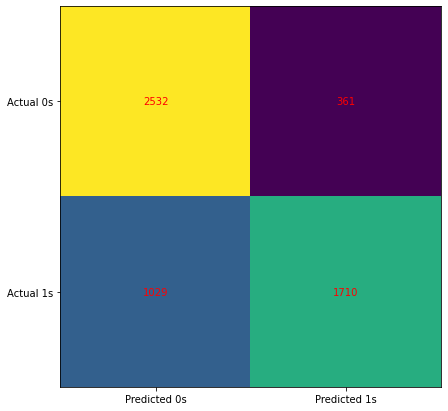

AUC: 0.8302196625486328


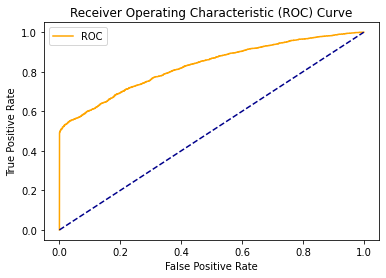

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

import xgboost as xgb
from sklearn import metrics
# Parameter Tuning
xg = xgb.XGBClassifier()

xg.fit(X_train, y_train)
#xg.best_estimator_

#model_xg = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
#                          n_jobs=-1 , verbose=1,learning_rate=0.16)
#model_xg.fit(X_train,y_train)

# Train Prediction classification report
print(classification_report(y_train, xg.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, xg.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, xg.predict(X_test))
print(cm)

In [60]:
pickle.dump(xg, open("model_XGB_loan_default_featengg_scaled_smote_data.pkl", 'wb'))

### With Hyper parameter tuning

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
# Parameter Tuning
xg1 = xgb.XGBClassifier()
param_dist = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}
xg = GridSearchCV(xg1, param_grid=param_dist, cv = 3, 
                                   verbose=10, n_jobs=-1)
xg.fit(X_train, y_train)
#xg.best_estimator_

#model = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
#                          n_jobs=-1 , verbose=1,learning_rate=0.16)
#model.fit(X_train,y_train)

ytrain_pred = xg.predict_proba(X_train)
print('Extreme GBM with Grid search train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = xg.predict_proba(X_test)
print('Extreme GBM with Grid search test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, xg.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, xg.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, xg.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,xg.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,xg)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   

ValueError: Invalid parameter learning_rate for estimator SVC(probability=True, random_state=0). Check the list of available parameters with `estimator.get_params().keys()`.

In [116]:
pickle.dump(model, open("model_XGB_hyper_tuned_loan_default_featengg_data.pkl", 'wb'))

## Now we will focus on finding the optimal threshold value

In [61]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier, gnb,cb_classifier,lg,xg,dt_classifier,svc_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.8483720256382978


In [62]:
ensemble_pred = pd.concat(pred,axis=1)

In [63]:
ensemble_pred = ensemble_pred.rename(columns = {0:'RF',1:'LogReg', 2:'AdaBoost',3:'KNN',4:'NaiveBayes', 5:'CatBoost',6:'LGBM', 7:'XGBM', 8:'DecisionTree',9:'SupportVector'})

In [64]:
ensemble_pred

,RF,LogReg,AdaBoost,KNN,NaiveBayes,CatBoost,LGBM,XGBM,DecisionTree,SupportVector
0,0.98,0.620288,0.508325,1.0,0.999754,0.938661,0.838389,0.974661,1.0,0.907888
1,0.08,0.426178,0.492418,0.2,0.297715,0.194387,0.248008,0.146809,0.0,0.193532
2,0.45,0.297667,0.497703,0.2,0.577317,0.348384,0.343231,0.725848,1.0,0.477192
3,0.98,0.615435,0.503089,0.8,0.998414,0.918047,0.963103,0.914687,1.0,0.786288
4,0.55,0.506767,0.498220,0.6,0.032077,0.619687,0.599325,0.506309,0.0,0.366404
...,...,...,...,...,...,...,...,...,...,...
5627,0.09,0.134336,0.489527,0.0,0.050594,0.060357,0.099743,0.061587,0.0,0.216433
5628,0.20,0.387208,0.501274,0.4,0.856173,0.237851,0.401278,0.362226,0.0,0.252816
5629,1.00,0.750854,0.521980,0.2,0.999911,0.976763,0.981843,0.995614,1.0,0.828300
5630,0.24,0.242623,0.494468,0.4,0.004318,0.217840,0.116480,0.203897,1.0,0.315973


### Make the model metrics dataframe

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
model_metrics=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier, gnb,cb_classifier,lg,xg,dt_classifier,svc_classifier]:
    results = classificatop(model, X_train, y_train, scoring=scoring)
    model_metrics.append(pd.DataFrame(model.roc_curve(y_test,xg.predict_proba(X_test)[:,1] ,))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

## MOdels with Cross Validation

In [87]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
dfs= []
models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('GNB', GaussianNB()),
          ('XGB', xgb.XGBClassifier())
        ]
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['default', 'no default']
for name, model in models:
        kfold = KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)
return final

D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

LogReg
              precision    recall  f1-score   support

     default       0.62      0.60      0.61      2893
  no default       0.59      0.61      0.60      2739

    accuracy                           0.60      5632
   macro avg       0.60      0.60      0.60      5632
weighted avg       0.60      0.60      0.60      5632

RF
              precision    recall  f1-score   support

     default       0.71      0.91      0.80      2893
  no default       0.86      0.61      0.72      2739

    accuracy                           0.76      5632
   macro avg       0.79      0.76      0.76      5632
weighted avg       0.78      0.76      0.76      5632

KNN
              precision    recall  f1-score   support

     default       0.69      0.72      0.70      2893
  no default       0.69      0.67      0.68      2739

    accuracy                           0.69      5632
   macro avg       0.69      0.69      0.69      5632
weighted avg       0.69      0.69      0.69      5632

SVM
 

SyntaxError: 'return' outside function (<ipython-input-87-bae012a09afe>, line 30)

In [88]:
final.head()

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.216628,0.008210,0.624945,0.624936,0.624945,0.624922,0.683738,LogReg
1,0.187031,0.008025,0.610963,0.610931,0.610963,0.610942,0.677842,LogReg
2,0.191704,0.008500,0.620950,0.621100,0.620950,0.620929,0.679074,LogReg
3,0.190072,0.008908,0.616870,0.616870,0.616870,0.616870,0.678821,LogReg
4,0.188423,0.008995,0.613097,0.613261,0.613097,0.613066,0.674650,LogReg


In [89]:
final.shape

(30, 8)

In [90]:
final.to_csv('Msme_Model_Comparison_smote_data.csv',index=False)

In [65]:
final_prediction

0       0.876797
1       0.227905
2       0.491734
3       0.847906
4       0.427879
          ...   
5627    0.120258
5628    0.359883
5629    0.825526
5630    0.323560
5631    0.438739
Length: 5632, dtype: float64

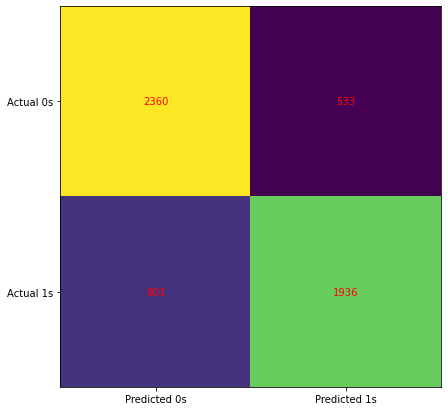

array([1.94139688, 0.94139688, 0.82964514, ..., 0.10368377, 0.08780278,
       0.08196466])

In [66]:
# Making the Confusion Matrix for threshold as .5
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,  np.where(final_prediction > 0.5, 1, 0))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

#### Calculate the ROc Curve
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
auc = metrics.roc_auc_score(y_test, final_prediction)
#plot_roc_curve(fpr,tpr)
thresholds

In [67]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
423,0.526580,0.769176
409,0.530484,0.769176
410,0.530203,0.769176
411,0.530041,0.768999
446,0.521654,0.768821


In [68]:
accuracy_ls

,thresholds,accuracy
423,0.526580,0.769176
409,0.530484,0.769176
410,0.530203,0.769176
411,0.530041,0.768999
446,0.521654,0.768821
...,...,...
1855,0.147710,0.492898
1856,0.105242,0.487393
1857,0.103684,0.487216
1858,0.087803,0.486861


In [156]:
accuracy_ls.iloc[1,0]

0.6293593498414337

In [69]:
from sklearn.metrics import f1_score
f1score_ls=[]
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    f1score_ls.append(f1_score(y_test, y_pred))
    
f1score_ls = pd.concat([pd.Series(thresholds), pd.Series(f1score_ls)],axis=1)
f1score_ls.columns = ['thresholds', 'f1score']
f1score_ls.sort_values(by='f1score', ascending=False, inplace=True)
f1score_ls.head()

,thresholds,f1score
771,0.457836,0.753592
772,0.457671,0.753459
770,0.457977,0.753371
779,0.457198,0.753320
783,0.456835,0.753316


In [70]:

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    #print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    #auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.legend()
    plt.show( )

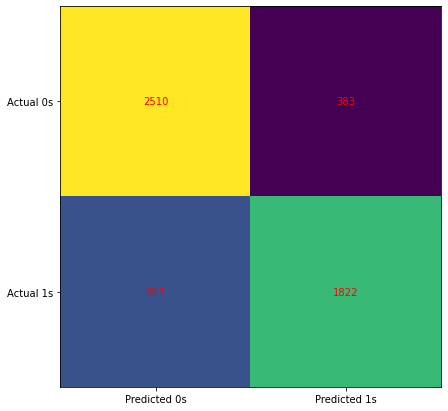

AUC: 0.7662728341641714


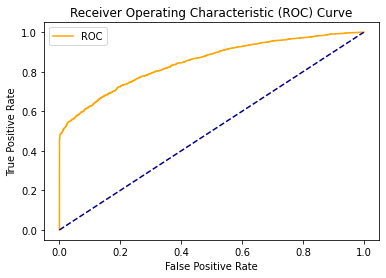

In [72]:
# Making the Confusion Matrix for threshold as accuracy threshold
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,  np.where(final_prediction >accuracy_ls.iloc[0,0], 1, 0))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

#### Calculate the ROc Curve
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
auc = metrics.roc_auc_score(y_test, np.where(final_prediction >accuracy_ls.iloc[1,0], 1, 0))
print('AUC:',auc)
plot_roc_curve(fpr,tpr)

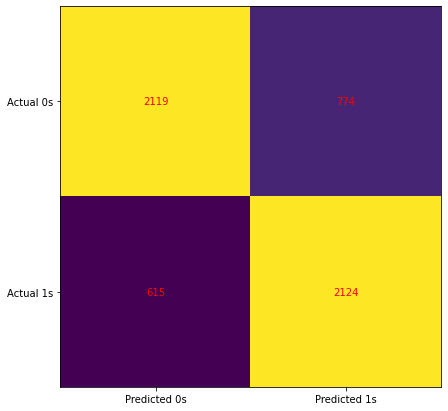

AUC: 0.7537887464132368


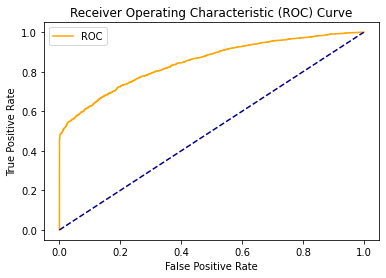

In [73]:
# Making the Confusion Matrix for threshold as f1 score threshold
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,  np.where(final_prediction >f1score_ls.iloc[0,0], 1, 0))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

#### Calculate the ROc Curve
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
auc = metrics.roc_auc_score(y_test, np.where(final_prediction >f1score_ls.iloc[1,0], 1, 0))
print('AUC:',auc)
plot_roc_curve(fpr,tpr)